<img src="logo.jpg" width="300" height="300">

<div style = "font-family: yekan ; font-size : 32px ; direction : rtl">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>
تمرین دوم درس برنامه نویسی پیشرفته
</b></div><br>

<div style = "font-family: yekan ; font-size : 26px ; direction : rtl">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Name: MohammadMahdi Montazeri<br><br>
</div>
<div style = "font-family: yekan ; font-size : 26px ; direction : rtl">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
ID: 401104479<br><br>
</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
    ابتدا کتابخانه‌های مورد نیاز را وارد می‌کنیم
:</div>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import scipy
from scipy.optimize import linprog

<div style = "font-family: yekan ; font-size : 26px ; direction : rtl"><b>
بخش اول (تحلیل سری‌های زمانی چندمتغیره و کاهش ابعاد در بازارهای
مالی و کالای جهانی) 
    </b></div>
<br>
<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
    من برای این بخش سری‌های زمانی ده سال گذشته دو شرکت سامسونگ و اپل را انتخاب و بررسی خواهم
    ‌کرد :
</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
    برای راحتی کار ابتدا نام‌هایی که برای ذخیره سازی داده‌ها به کار رفته است را ذکر می‌کنم:
</div>
<ul style = "font-family: yekan ; font-size : 16px ; direction : rtl">
    <li><b>SAMSUNG_data :</b> دیتای خام سامسونگ که از Yahoo finance گرفته شد.</li>
    <li><b>APPLE_data :</b> دیتای خام اپل که از Yahoo finance گرفته شد.</li>
    <li><b>sam_app_merge :</b> دیتافریمی که برای تهیه اجتماع روز‌های دو دیتا فریم sam و apple تهیه شد</li>
    <li><b>sam :</b> دیتای شرکت سامسونگ پس از مدیریت داده‌های null</li>
    <li><b>apple :</b> دیتای شرکت اپل پس از مدیریت داده‌های null</li>
    <li><b>sam_Normalized :</b> داده‌های شرکت سامسونگ پس از نرمال سازی</li>
    <li><b>apple_Normalized :</b> داده‌های شرکت اپل پس از نرمال سازی</li>
    <li><b>sam_sta :</b> داده‌های شرکت سامسونگ پس از Stationarity Transformation</li>
    <li><b>apple_sta :</b> داده‌های شرکت اپل پس از Stationarity Transformation</li>
</ul>

<div style = "font-family: yekan ; font-size : 22px ; direction : rtl ; color : #FF0000">
1. جمع‌آوری داده‌ها
</div>


In [2]:
start_date = '2013-06-30'
end_date = '2023-07-1'

symbol1 = '005930.KS'
SAMSUNG_data = yf.download(symbol1 ,start=start_date, end=end_date ,interval = '1d')
SAMSUNG_data.to_csv('SAMSUNG.csv')

symbol2 = 'AAPL'
APPLE_data = yf.download(symbol2 ,start=start_date, end=end_date ,interval = '1d')
SAMSUNG_data.to_csv('APPLE.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
دو دیتافریم را بصورت CSV ذخیره می‌کنیم
</div>
<br>
<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
نمایش دو دیتافریم خام دریافتی از Yahoo finance :
</div>

In [3]:
SAMSUNG_data

Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2013-07-01  26680.0  26920.0  26440.0  26520.0  21081.888672  12825950
2013-07-02  26800.0  27040.0  26600.0  26700.0  21224.982422  10214450
2013-07-03  26680.0  26780.0  25900.0  26020.0  20684.417969  12822050
2013-07-04  26040.0  26340.0  25920.0  26340.0  20938.800781   9042650
2013-07-05  25720.0  26300.0  25200.0  25340.0  20143.855469  30382800
...             ...      ...      ...      ...           ...       ...
2023-06-26  71700.0  72500.0  71500.0  72400.0  72400.000000  10541901
2023-06-27  72500.0  72600.0  72000.0  72600.0  72600.000000   9442997
2023-06-28  72600.0  72700.0  72000.0  72700.0  72700.000000   8783093
2023-06-29  73100.0  73400.0  72400.0  72400.0  72400.000000  12229967
2023-06-30  72500.0  72700.0  71700.0  72200.0  72200.000000  11694765

[2458 rows x 6 columns]

In [4]:
APPLE_data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-07-01   14.381786   14.723929   14.329286   14.615000   12.688703   
2013-07-02   14.641429   15.058214   14.623929   14.946071   12.976135   
2013-07-03   15.030714   15.106429   14.908929   15.028571   13.047763   
2013-07-05   15.013929   15.117500   14.833929   14.907857   12.942960   
2013-07-08   15.003929   15.035714   14.666071   14.823214   12.869470   
...                ...         ...         ...         ...         ...   
2023-06-26  186.830002  188.050003  185.229996  185.270004  185.270004   
2023-06-27  185.889999  188.389999  185.669998  188.059998  188.059998   
2023-06-28  187.929993  189.899994  187.600006  189.250000  189.250000   
2023-06-29  189.080002  190.070007  188.940002  189.589996  189.589996   
2023-06-30  191.630005  194.479996  191.259995  193.970001  193.970001   

               Volume  
Date                   
2013-07-01  391053600  
2013-07-02  469865200  
2013-07-03  240928800  
2013-07-05  274024800  
2013-07-08  298138400  
...               ...  
2023-06-26   48088700  
2023-06-27   50730800  
2023-06-28   51216800  
2023-06-29   46347300  
2023-06-30   85069600  

[2518 rows x 6 columns]

<div style = "font-family: yekan ; font-size : 22px ; direction : rtl ; color : #FF0000">
2. پیش‌پردازش داده‌ها
</div>


<div style = "font-family: yekan ; font-size : 18px ; direction : rtl ; color : #9900CC">
<ul>
    <li>
نمونه‌برداری و تطبیق داده‌ها
    </li>

</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
    چون interval را برای هردو درخواست برابر یک روز قرار دادیم پس داده‌ها یک مقیاس زمانی را دارند ولی برای بررسی پوشش زمانی یکسان دو دیتافریم را merge کرده و index اجتماع دو دیتافریم را به عنوان index هرکدام قرار خواهیم داد تا پوشش زمانی یکسانی داشته باشیم 
</div>

In [5]:
sam_app_merge = pd.merge(SAMSUNG_data , APPLE_data , on = 'Date',how = 'outer').sort_index()

In [6]:
sam = pd.DataFrame()
sam.index = sam_app_merge.index
sam = pd.merge(sam , SAMSUNG_data , on = 'Date' , how = 'left')

apple = pd.DataFrame()
apple.index = sam_app_merge.index
apple = pd.merge(apple , APPLE_data , on = 'Date' , how = 'left')

In [7]:
sam

Open     High      Low    Close     Adj Close      Volume
Date                                                                    
2013-07-01  26680.0  26920.0  26440.0  26520.0  21081.888672  12825950.0
2013-07-02  26800.0  27040.0  26600.0  26700.0  21224.982422  10214450.0
2013-07-03  26680.0  26780.0  25900.0  26020.0  20684.417969  12822050.0
2013-07-04  26040.0  26340.0  25920.0  26340.0  20938.800781   9042650.0
2013-07-05  25720.0  26300.0  25200.0  25340.0  20143.855469  30382800.0
...             ...      ...      ...      ...           ...         ...
2023-06-26  71700.0  72500.0  71500.0  72400.0  72400.000000  10541901.0
2023-06-27  72500.0  72600.0  72000.0  72600.0  72600.000000   9442997.0
2023-06-28  72600.0  72700.0  72000.0  72700.0  72700.000000   8783093.0
2023-06-29  73100.0  73400.0  72400.0  72400.0  72400.000000  12229967.0
2023-06-30  72500.0  72700.0  71700.0  72200.0  72200.000000  11694765.0

[2594 rows x 6 columns]

In [8]:
apple

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-07-01   14.381786   14.723929   14.329286   14.615000   12.688703   
2013-07-02   14.641429   15.058214   14.623929   14.946071   12.976135   
2013-07-03   15.030714   15.106429   14.908929   15.028571   13.047763   
2013-07-04         NaN         NaN         NaN         NaN         NaN   
2013-07-05   15.013929   15.117500   14.833929   14.907857   12.942960   
...                ...         ...         ...         ...         ...   
2023-06-26  186.830002  188.050003  185.229996  185.270004  185.270004   
2023-06-27  185.889999  188.389999  185.669998  188.059998  188.059998   
2023-06-28  187.929993  189.899994  187.600006  189.250000  189.250000   
2023-06-29  189.080002  190.070007  188.940002  189.589996  189.589996   
2023-06-30  191.630005  194.479996  191.259995  193.970001  193.970001   

                 Volume  
Date                     
2013-07-01  391053600.0  
2013-07-02  469865200.0  
2013-07-03  240928800.0  
2013-07-04          NaN  
2013-07-05  274024800.0  
...                 ...  
2023-06-26   48088700.0  
2023-06-27   50730800.0  
2023-06-28   51216800.0  
2023-06-29   46347300.0  
2023-06-30   85069600.0  

[2594 rows x 6 columns]

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
تعداد داده‌های null را در هر ستون از هر دیتافریم بدست می‌آوریم
</div>

In [9]:
print('sam:',sam['Open'].isnull().sum())
print('apple:',apple['Open'].isnull().sum())

sam: 136
apple: 76


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
محاسبه می‌کنیم که داده چند روز از این ده سال در دسترس نیست:
</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
این محاسبه به این صورت است که ابتدا تعداد روز‌های ده سال را به دست آورده و ضرب در پنج هفتم می‌کنیم چراکه بازار جهانی پنج روز در هفته باز است و سپس منهای تعداد ردیف‌های دو دیتا فریم می‌کنیم تا تعداد روز های از دست رفته را بدانیم</div>

In [10]:
int(365 * 10 * (5/7)) - 2594

13

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
    <li>
مدیریت داده‌های null    </li>

</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
هر خانه خالی را برابر با میانگین خانه بالا و پایین آن قرار می‌دهیم در این صورت مقدار هر خانه برابر با میانگین قیمتی است که در روز‌های قبل و بعد معامله شده است و عدد معقولی در هر زمان بدست می‌آید</div>

In [11]:
sam = (sam.bfill() + sam.ffill()) / 2
sam

Open     High      Low    Close     Adj Close      Volume
Date                                                                    
2013-07-01  26680.0  26920.0  26440.0  26520.0  21081.888672  12825950.0
2013-07-02  26800.0  27040.0  26600.0  26700.0  21224.982422  10214450.0
2013-07-03  26680.0  26780.0  25900.0  26020.0  20684.417969  12822050.0
2013-07-04  26040.0  26340.0  25920.0  26340.0  20938.800781   9042650.0
2013-07-05  25720.0  26300.0  25200.0  25340.0  20143.855469  30382800.0
...             ...      ...      ...      ...           ...         ...
2023-06-26  71700.0  72500.0  71500.0  72400.0  72400.000000  10541901.0
2023-06-27  72500.0  72600.0  72000.0  72600.0  72600.000000   9442997.0
2023-06-28  72600.0  72700.0  72000.0  72700.0  72700.000000   8783093.0
2023-06-29  73100.0  73400.0  72400.0  72400.0  72400.000000  12229967.0
2023-06-30  72500.0  72700.0  71700.0  72200.0  72200.000000  11694765.0

[2594 rows x 6 columns]

In [12]:
apple = (apple.bfill() + apple.ffill()) / 2
apple

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-07-01   14.381786   14.723929   14.329286   14.615000   12.688703   
2013-07-02   14.641429   15.058214   14.623929   14.946071   12.976135   
2013-07-03   15.030714   15.106429   14.908929   15.028571   13.047763   
2013-07-04   15.022322   15.111965   14.871429   14.968214   12.995361   
2013-07-05   15.013929   15.117500   14.833929   14.907857   12.942960   
...                ...         ...         ...         ...         ...   
2023-06-26  186.830002  188.050003  185.229996  185.270004  185.270004   
2023-06-27  185.889999  188.389999  185.669998  188.059998  188.059998   
2023-06-28  187.929993  189.899994  187.600006  189.250000  189.250000   
2023-06-29  189.080002  190.070007  188.940002  189.589996  189.589996   
2023-06-30  191.630005  194.479996  191.259995  193.970001  193.970001   

                 Volume  
Date                     
2013-07-01  391053600.0  
2013-07-02  469865200.0  
2013-07-03  240928800.0  
2013-07-04  257476800.0  
2013-07-05  274024800.0  
...                 ...  
2023-06-26   48088700.0  
2023-06-27   50730800.0  
2023-06-28   51216800.0  
2023-06-29   46347300.0  
2023-06-30   85069600.0  

[2594 rows x 6 columns]

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl ; color : #9900CC">
<ul>
    <li>
نرمال‌سازی داده‌ها    </li>

</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">برای نرمال سازی روش‌های متعددی وجود دارد که
من برای نرمال‌سازی از روش MinMaxNormalization استفاده کردم:
</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
در این روش هر داده منهای مقدار min آن ستون و سپس تقسیم بر رنج آن ستون می‌شود که عددی بین صفر و یک بدست می‌آید
، برای بیان بهتر فرمول آن را در پایین ذکر می‌کنم:</div>

<img src="MinMaxNormalization_f.jpg" width="200" height="200">

In [13]:
sam_Normalized = (sam - sam.min())  / (sam.max() - sam.min())
sam_Normalized

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2013-07-01  0.077169  0.072225  0.083963  0.074361   0.053178  0.142027
2013-07-02  0.078909  0.073818  0.086287  0.076945   0.055243  0.113109
2013-07-03  0.077169  0.070366  0.076119  0.067183   0.047445  0.141984
2013-07-04  0.067885  0.064525  0.076409  0.071777   0.051114  0.100133
2013-07-05  0.063243  0.063994  0.065950  0.057422   0.039647  0.336442
...              ...       ...       ...       ...        ...       ...
2023-06-26  0.730200  0.677377  0.738524  0.732989   0.793466  0.116735
2023-06-27  0.741804  0.678704  0.745787  0.735860   0.796351  0.104566
2023-06-28  0.743255  0.680032  0.745787  0.737295   0.797794  0.097259
2023-06-29  0.750508  0.689326  0.751598  0.732989   0.793466  0.135428
2023-06-30  0.741804  0.680032  0.741429  0.730118   0.790581  0.129501

[2594 rows x 6 columns]

In [14]:
apple_Normalized = (apple - apple.min())  / (apple.max() - apple.min())
apple_Normalized

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2013-07-01  0.000000  0.000000  0.000000  0.000000   0.000000  0.345383
2013-07-02  0.001465  0.001860  0.001665  0.001846   0.001586  0.421875
2013-07-03  0.003661  0.002128  0.003276  0.002306   0.001981  0.199677
2013-07-04  0.003614  0.002159  0.003064  0.001969   0.001692  0.215738
2013-07-05  0.003566  0.002189  0.002852  0.001633   0.001403  0.231799
...              ...       ...       ...       ...        ...       ...
2023-06-26  0.972919  0.964229  0.965919  0.951493   0.952008  0.012513
2023-06-27  0.967616  0.966121  0.968406  0.967049   0.967399  0.015078
2023-06-28  0.979125  0.974521  0.979314  0.973683   0.973963  0.015549
2023-06-29  0.985613  0.975467  0.986888  0.975579   0.975839  0.010823
2023-06-30  1.000000  1.000000  1.000000  1.000000   1.000000  0.048406

[2594 rows x 6 columns]

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl ; color : #9900CC">
<ul>
    <li>
Stationarity Transformation    </li>

</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">برای پایدار سازی داده‌ها هم مثل نرمال سازی روش های مختلفی وجود دارد از قبیل :<br>
    <ul>
        <li>روش تبدیل لگاریتم</li>
        <li>روش تبدیل دیفرانسیل</li>
        <li>روش تبدیل استانداردیزه کردن(Standardization)</li>
        <li>روش تبدیل معکوس</li>
        <li>روش تبدیل تک گام</li>
    </ul><br>که هرکدام بسته به شرایط و نوع داده کاربرد داد<br><br>
من برای Stationarity Transformation از روش Time Differencing استفاده کردم،
چرا که داده‌های من دارای مقدار صفر بود و روش تبدیل لگاریتم برای آن قابل اجرا نبود</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl"><b>روش Time Differencing :</b>
 در این روش به طور ساده با محاسبه اختلاف بین مقادیر پشت سر هم یک سری زمانی، سری جدیدی از داده‌ها را به دست می‌آوریم.
</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
برای انجام Stationarity Transformation دو ریکرد مختلف درمورد داده‌های مورد استفاده وجود دارد که یکی استفاده از داده‌های نرمال شده و یکی هم استفاده از داده‌های خام است که من از داده‌های نرمال استفاده کرده‌ام.</div>

In [15]:
sam_sta = sam_Normalized.diff()
sam_sta = sam_sta.dropna(axis=0)
sam_sta

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2013-07-02  0.001741  0.001593  0.002324  0.002584   0.002064 -0.028918
2013-07-03 -0.001741 -0.003452 -0.010169 -0.009762  -0.007798  0.028875
2013-07-04 -0.009283 -0.005842  0.000291  0.004594   0.003670 -0.041851
2013-07-05 -0.004642 -0.000531 -0.010459 -0.014355  -0.011467  0.236309
2013-07-08 -0.010444 -0.015135 -0.014817 -0.011771  -0.009403 -0.043216
...              ...       ...       ...       ...        ...       ...
2023-06-26 -0.004352  0.003983 -0.001453  0.011484   0.011540 -0.019795
2023-06-27  0.011604  0.001328  0.007263  0.002871   0.002885 -0.012169
2023-06-28  0.001451  0.001328  0.000000  0.001436   0.001443 -0.007307
2023-06-29  0.007253  0.009294  0.005811 -0.004307  -0.004328  0.038169
2023-06-30 -0.008703 -0.009294 -0.010169 -0.002871  -0.002885 -0.005927

[2593 rows x 6 columns]

In [16]:
apple_sta = apple_Normalized.diff()
apple_sta = apple_sta.dropna(axis=0)
apple_sta

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2013-07-02  0.001465  0.001860  0.001665  0.001846   0.001586  0.076492
2013-07-03  0.002196  0.000268  0.001611  0.000460   0.000395 -0.222198
2013-07-04 -0.000047  0.000031 -0.000212 -0.000337  -0.000289  0.016061
2013-07-05 -0.000047  0.000031 -0.000212 -0.000337  -0.000289  0.016061
2013-07-08 -0.000056 -0.000455 -0.000949 -0.000472  -0.000405  0.023404
...              ...       ...       ...       ...        ...       ...
2023-06-26  0.007222  0.002726  0.001243 -0.007861  -0.007778 -0.004844
2023-06-27 -0.005303  0.001891  0.002487  0.015556   0.015390  0.002564
2023-06-28  0.011509  0.008400  0.010908  0.006635   0.006564  0.000472
2023-06-29  0.006488  0.000946  0.007574  0.001896   0.001876 -0.004726
2023-06-30  0.014387  0.024533  0.013112  0.024421   0.024161  0.037583

[2593 rows x 6 columns]

<div style = "font-family: yekan ; font-size : 22px ; direction : rtl; color : #FF0000">
3. تحلیل اکتشافی داده‌ها(EDA)
</div>


<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
    <li>
بصری سازی    </li>

</ul>

</div>


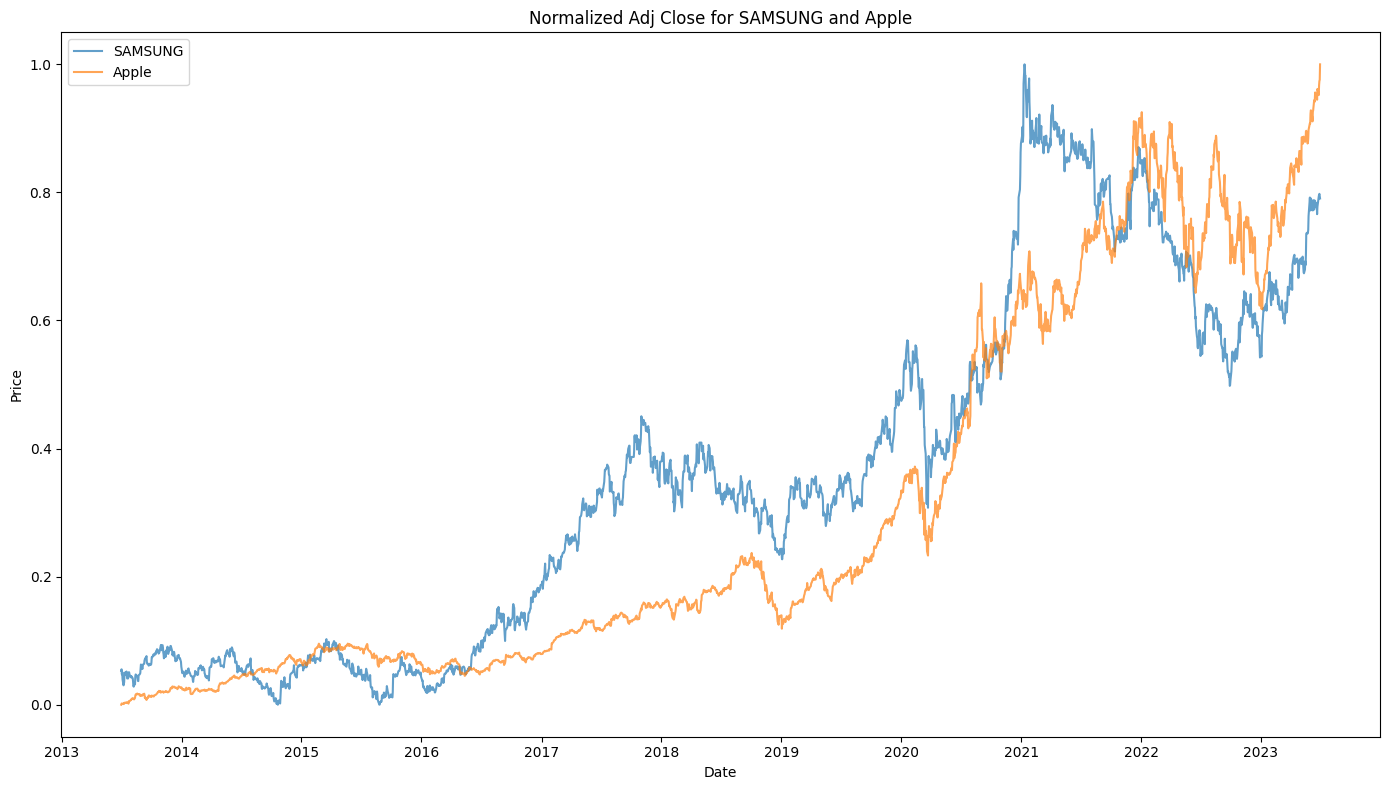

In [17]:
plt.figure(figsize=(14, 8))
plt.plot(sam_Normalized['Adj Close'], label='SAMSUNG', alpha=0.7)
plt.plot(apple_Normalized['Adj Close'], label='Apple', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Normalized Adj Close for SAMSUNG and Apple')
plt.legend()
plt.tight_layout()
plt.show()

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
SAMSUNG:</div>

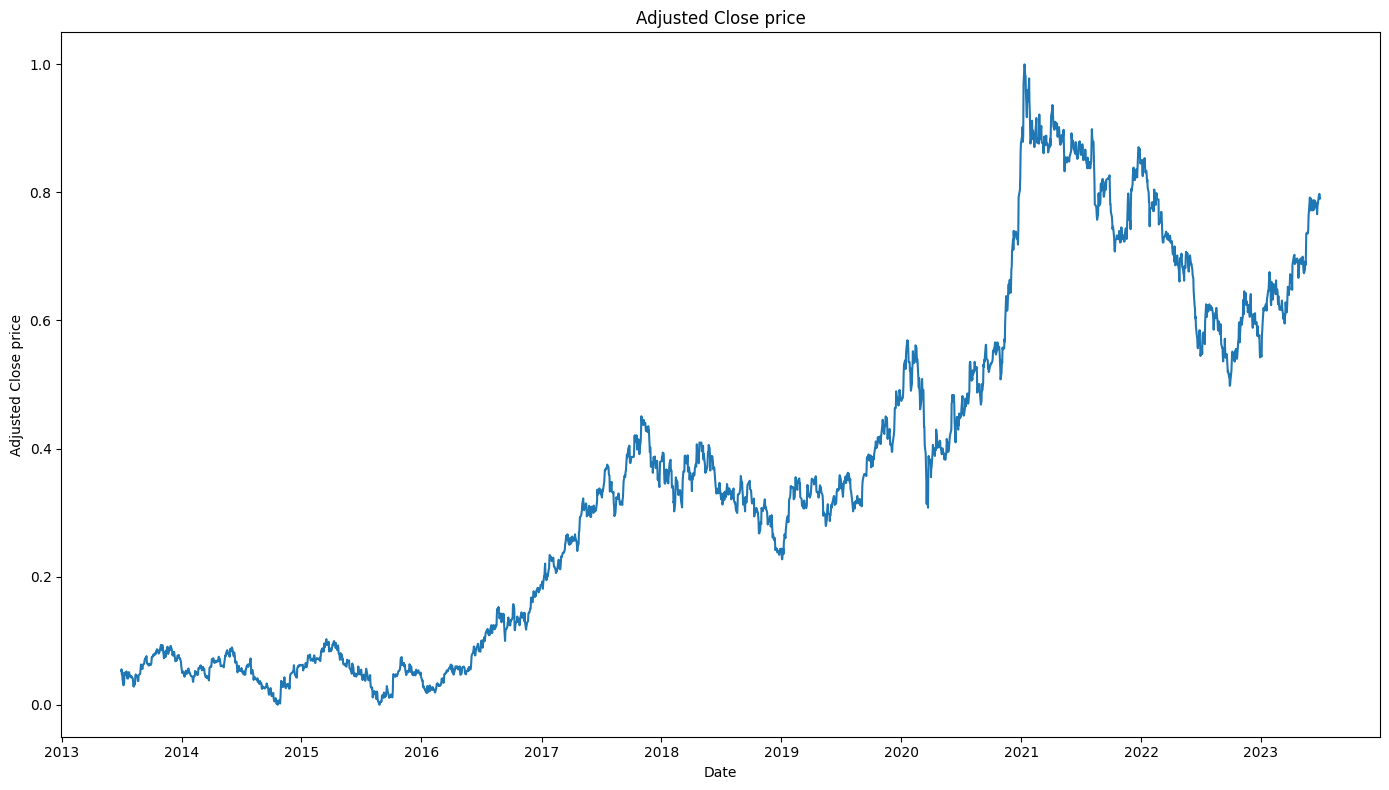

In [18]:
plt.figure(figsize=(14, 8))
plt.plot(sam_Normalized['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close price')
plt.title('Adjusted Close price')
plt.tight_layout()
plt.show()

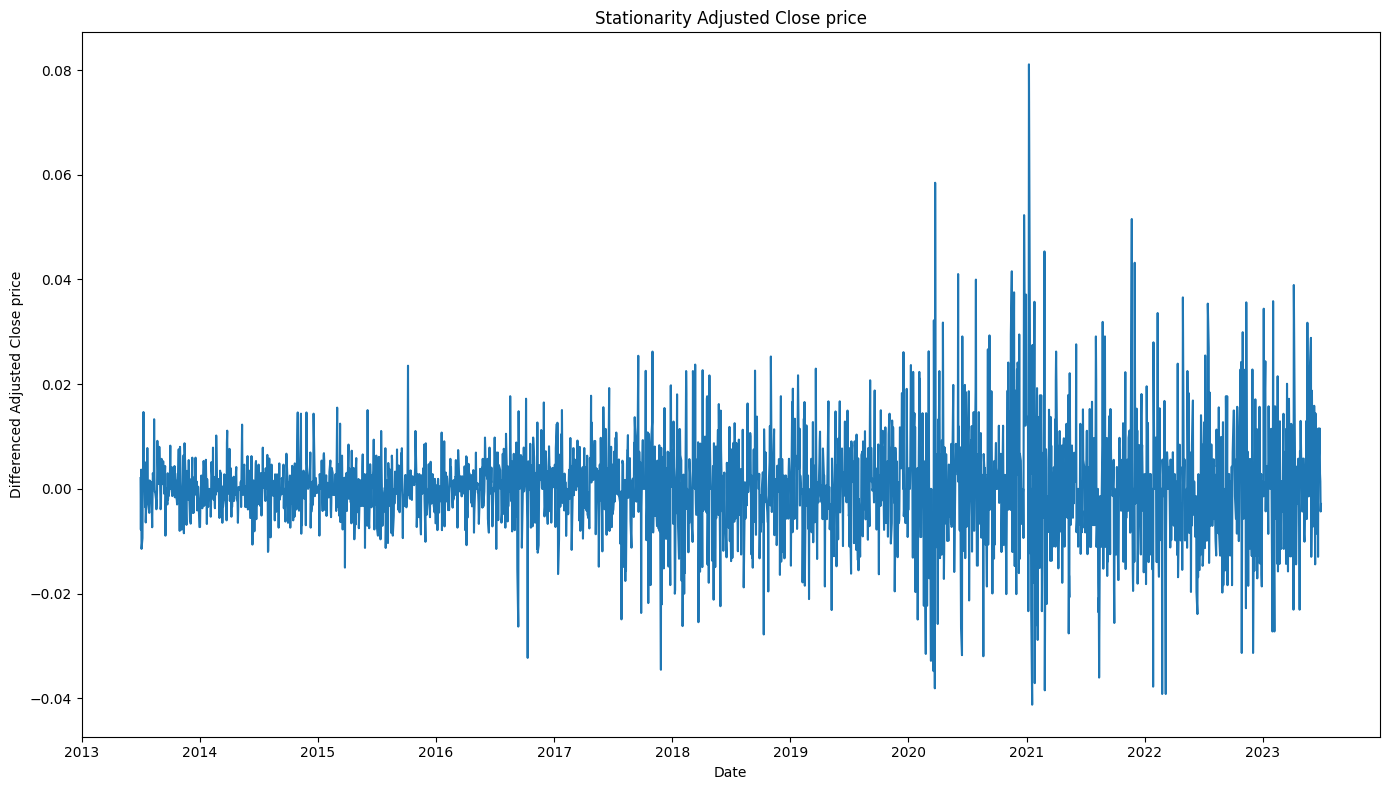

In [19]:
plt.figure(figsize=(14, 8))
plt.plot(sam_sta['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Differenced Adjusted Close price')
plt.title('Stationarity Adjusted Close price')
plt.tight_layout()
plt.show()

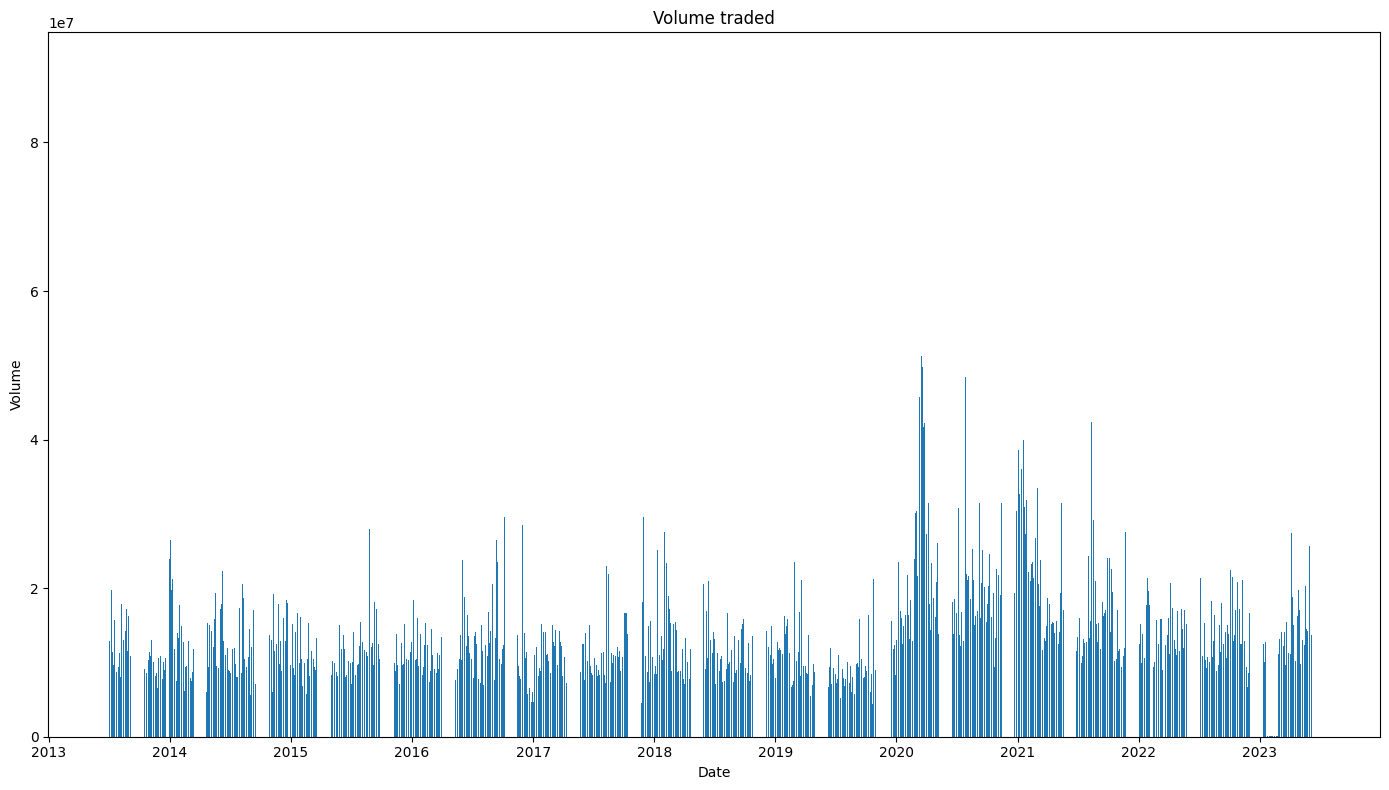

In [20]:
plt.figure(figsize=(14, 8))
plt.bar(sam.index , sam['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume traded')
plt.tight_layout()
plt.show()

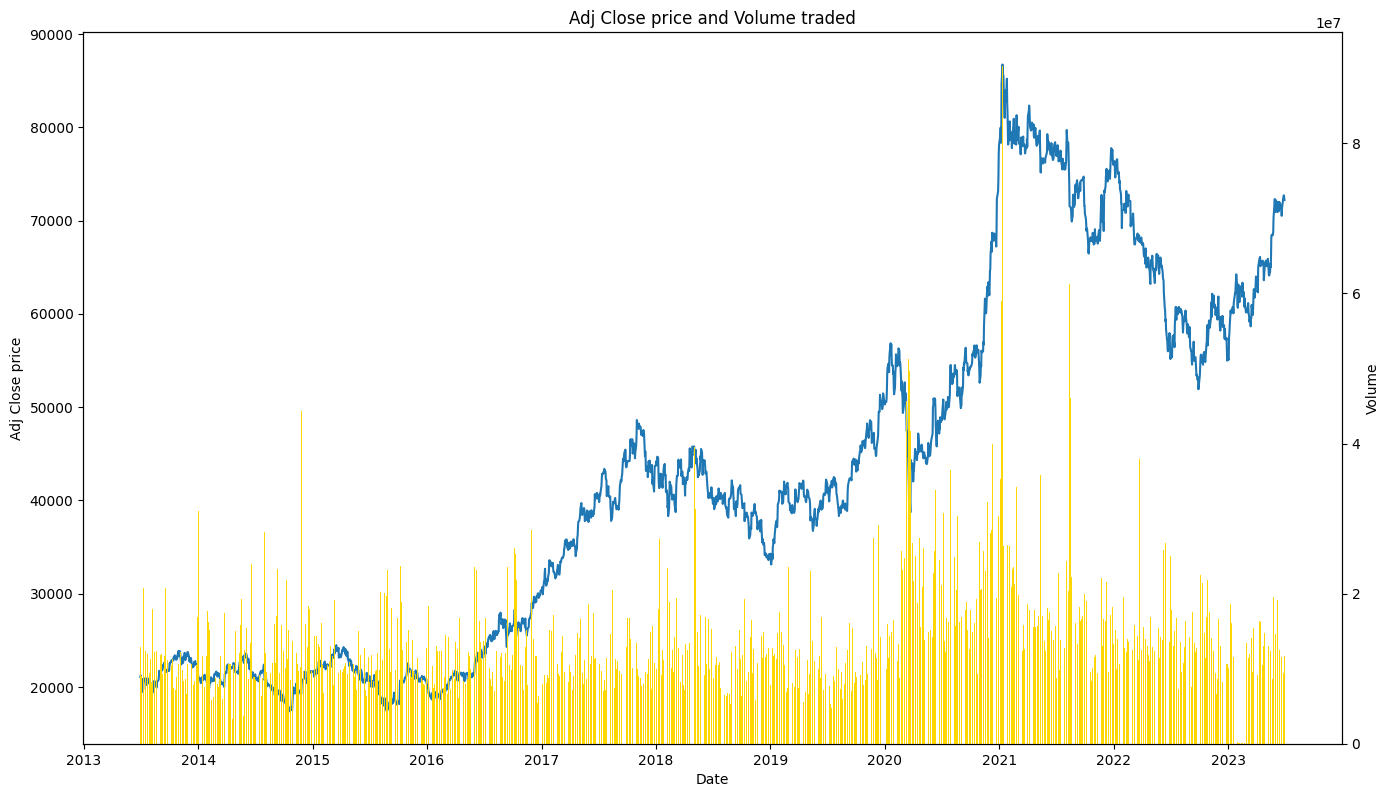

In [21]:
fig, pl1 = plt.subplots(figsize=(14, 8))
pl1.plot(sam['Adj Close'])
pl1.set_xlabel('Date')
pl1.set_ylabel('Adj Close price')
pl1.tick_params(axis='y')
pl2 = pl1.twinx()
pl2.bar(sam.index, sam['Volume'], color = 'gold', alpha=1)
pl2.set_ylabel('Volume')
pl2.tick_params(axis='y')
plt.tight_layout()
plt.title('Adj Close price and Volume traded')
plt.show()

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
Apple:</div>

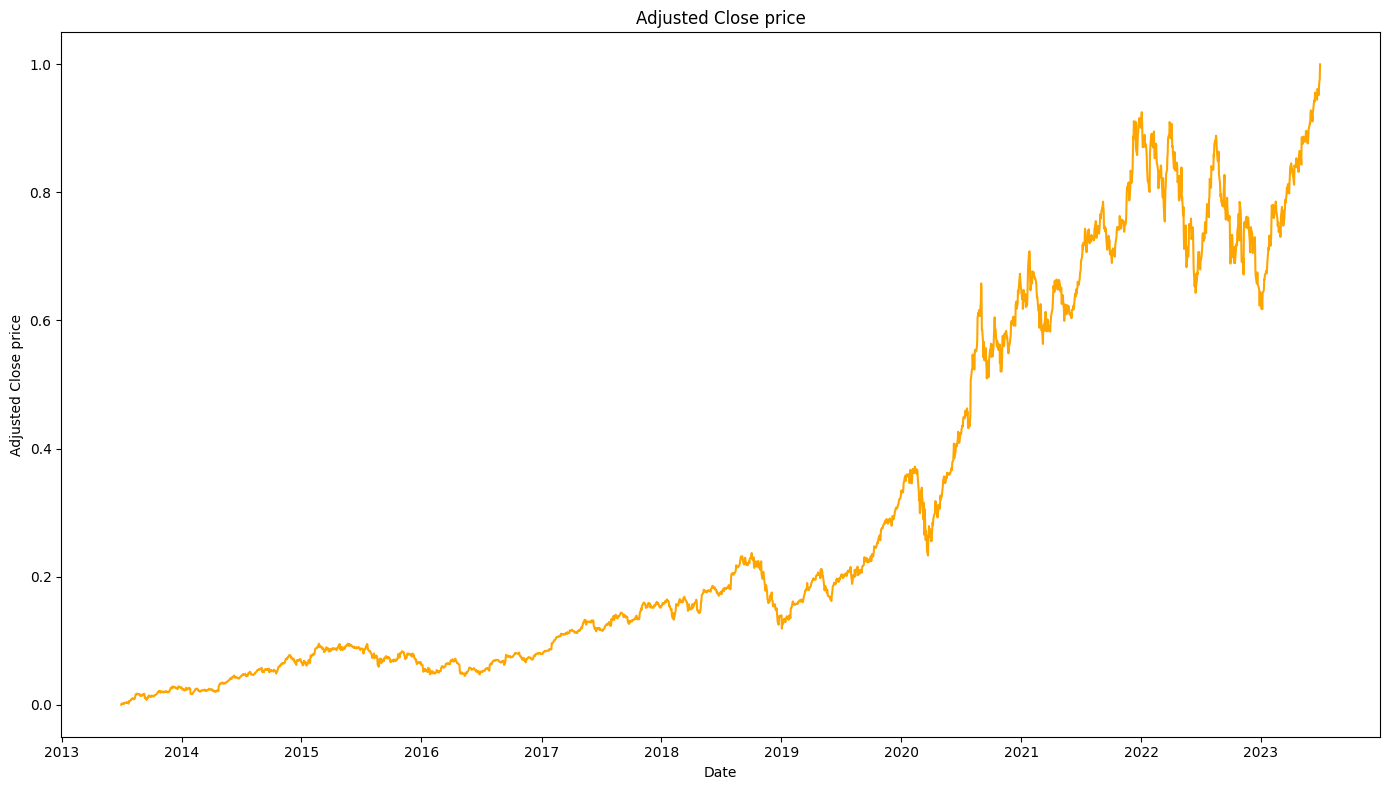

In [22]:
plt.figure(figsize=(14, 8))
plt.plot(apple_Normalized['Adj Close'] , color = 'orange')
plt.xlabel('Date')
plt.ylabel('Adjusted Close price')
plt.title('Adjusted Close price')
plt.tight_layout()
plt.show()

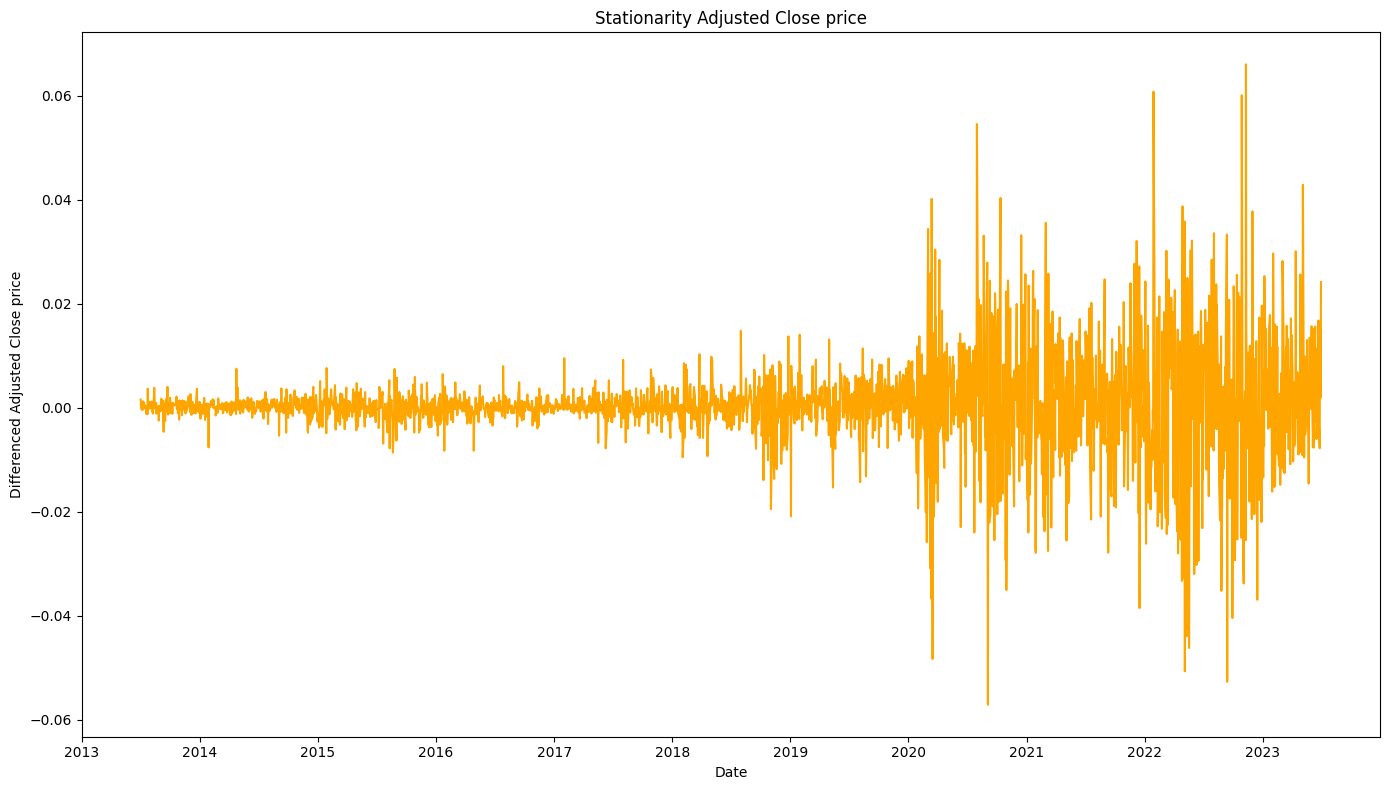

In [23]:
plt.figure(figsize=(14, 8))
plt.plot(apple_sta['Adj Close'] , color = 'orange')
plt.xlabel('Date')
plt.ylabel('Differenced Adjusted Close price')
plt.title('Stationarity Adjusted Close price')
plt.tight_layout()
plt.show()

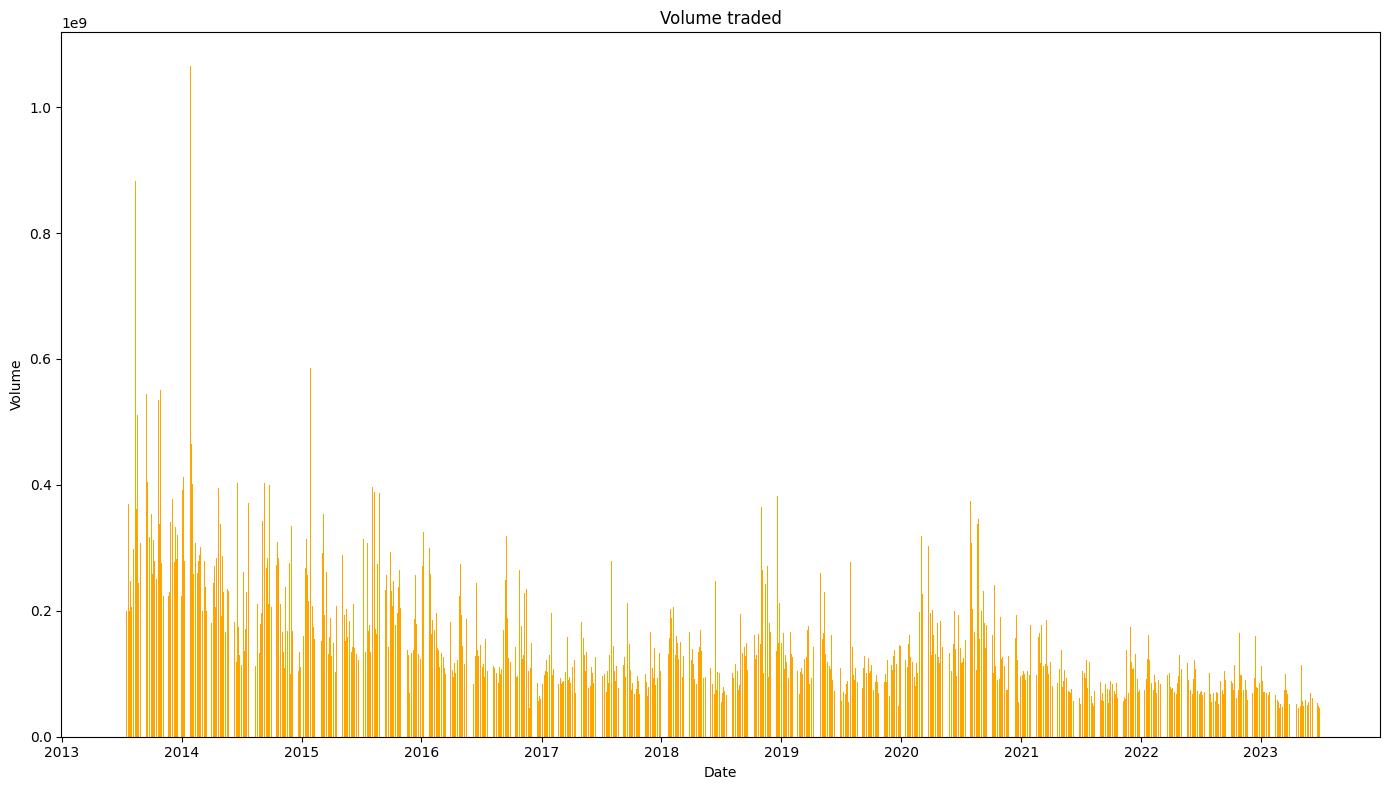

In [24]:
plt.figure(figsize=(14, 8))
plt.bar(apple.index , apple['Volume'] , color = 'orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume traded')
plt.tight_layout()
plt.show()

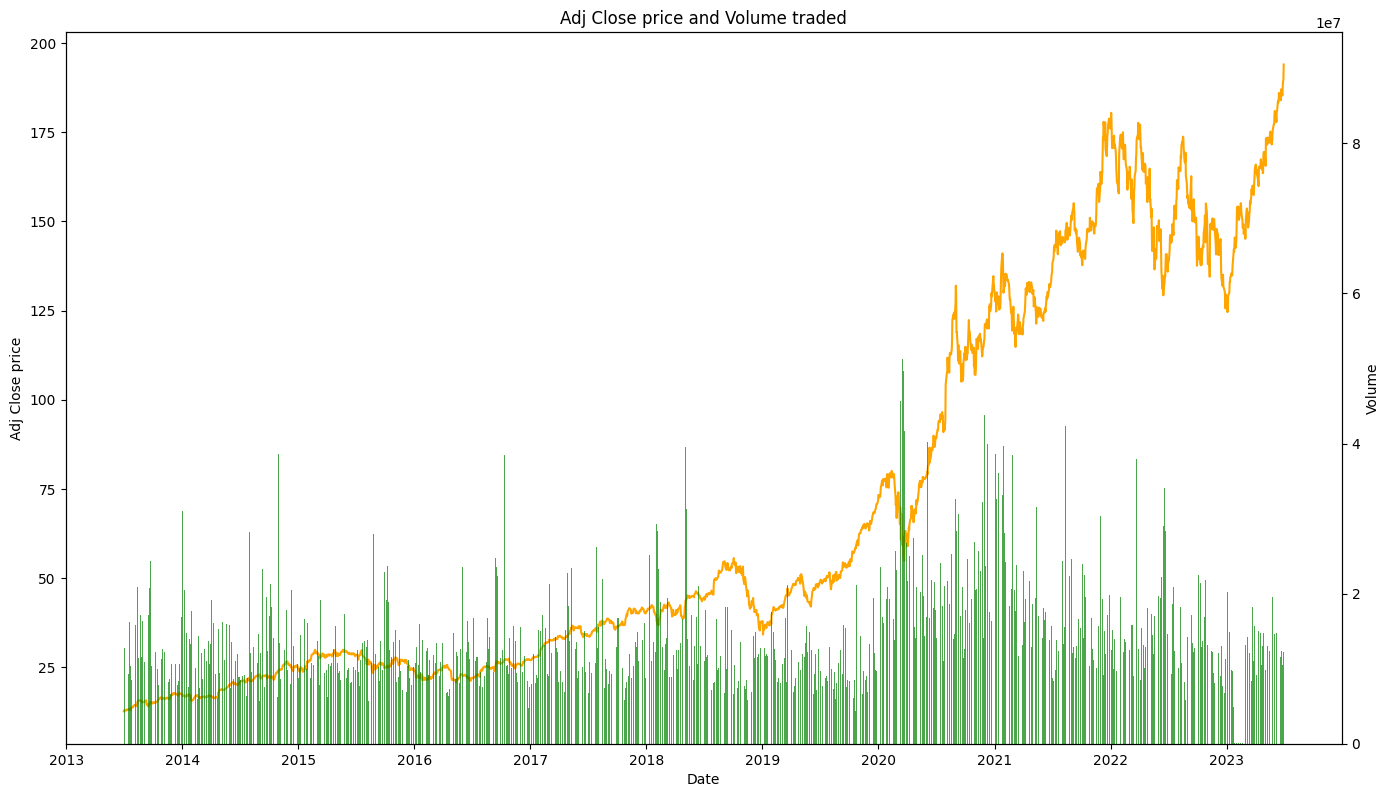

In [25]:
fig, pl1 = plt.subplots(figsize=(14, 8))
pl1.plot(apple['Adj Close'] , color = 'orange')
pl1.set_xlabel('Date')
pl1.set_ylabel('Adj Close price')
pl1.tick_params(axis='y')
pl2 = pl1.twinx()
pl2.bar(sam.index, sam['Volume'], color = 'green', alpha=0.7)
pl2.set_ylabel('Volume')
pl2.tick_params(axis='y')
plt.tight_layout()
plt.title('Adj Close price and Volume traded')
plt.show()

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
    <li>
        آماره‌های توصیفی
    </li>

</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
برای داده‌های دسته Open در 6 دیتافریم مختلف:
</div>

In [26]:
pd.options.display.float_format = '{:.4f}'.format

Open = pd.DataFrame({'sam': [sam['Open'].mean(),sam['Open'].var(),sam['Open'].std(),"{:.0f}".format(sam['Open'].min()),"{:.0f}".format(sam['Open'].max()),"{:.0f}".format(sam['Open'].quantile(0.25)),"{:.0f}".format(sam['Open'].quantile(0.5)),"{:.0f}".format(sam['Open'].quantile(0.75)),"{:.0f}".format(sam['Open'].max()-sam['Open'].min()),"{:.0f}".format(sam['Open'].mode()[0]) if len(sam['Open'].mode()) == 1 else ["{:.2f}".format(x) for x in sam['Open'].mode()]],
                     'sam_Normalized' : [sam_Normalized['Open'].mean(),sam_Normalized['Open'].var(),sam_Normalized['Open'].std(),sam_Normalized['Open'].min(),sam_Normalized['Open'].max(),sam_Normalized['Open'].quantile(0.25),sam_Normalized['Open'].quantile(0.5),sam_Normalized['Open'].quantile(0.75),sam_Normalized['Open'].max()-sam_Normalized['Open'].min(),sam_Normalized['Open'].mode()[0] if len(sam_Normalized['Open'].mode()) == 1 else ["{:.2f}".format(x) for x in sam_Normalized['Open'].mode()]], 
                     'sam_sta' : [sam_sta['Open'].mean(),sam_sta['Open'].var(),sam_sta['Open'].std(),sam_sta['Open'].min(),sam_sta['Open'].max(),sam_sta['Open'].quantile(0.25),sam_sta['Open'].quantile(0.5),sam_sta['Open'].quantile(0.75),sam_sta['Open'].max()-sam_sta['Open'].min(),sam_sta['Open'].mode()[0] if len(sam_sta['Open'].mode()) == 1 else ["{:.2f}".format(x) for x in sam_sta['Open'].mode()]], 
                     'apple': [apple['Open'].mean(),apple['Open'].var(),apple['Open'].std(),apple['Open'].min(),apple['Open'].max(),apple['Open'].quantile(0.25),apple['Open'].quantile(0.5),apple['Open'].quantile(0.75),apple['Open'].max()-apple['Open'].min(),apple['Open'].mode()[0] if len(apple['Open'].mode()) == 1 else ["{:.2f}".format(x) for x in apple['Open'].mode()]],
                     'apple_Normalized' : [apple_Normalized['Open'].mean(),apple_Normalized['Open'].var(),apple_Normalized['Open'].std(),apple_Normalized['Open'].min(),apple_Normalized['Open'].max(),apple_Normalized['Open'].quantile(0.25),apple_Normalized['Open'].quantile(0.5),apple_Normalized['Open'].quantile(0.75),apple_Normalized['Open'].max()-apple_Normalized['Open'].min(),apple_Normalized['Open'].mode()[0] if len(apple_Normalized['Open'].mode()) == 1 else ["{:.2f}".format(x) for x in apple_Normalized['Open'].mode()]], 
                     'apple_sta' : [apple_sta['Open'].mean(),apple_sta['Open'].var(),apple_sta['Open'].std(),apple_sta['Open'].min(),apple_sta['Open'].max(),apple_sta['Open'].quantile(0.25),apple_sta['Open'].quantile(0.5),apple_sta['Open'].quantile(0.75),apple_sta['Open'].max()-apple_sta['Open'].min(),apple_sta['Open'].mode()[0] if len(apple_sta['Open'].mode()) == 1 else ["{:.3f}".format(x) for x in apple_sta['Open'].mode()]]}
                    ,index=['Mean','Variance','Standard Deviation','Minimum','Maximum','Q1','Q2','Q3','Range','Mode'])
Open

sam  sam_Normalized  sam_sta  \
Mean                   46710.8308          0.3677   0.0003   
Variance           320960706.1646          0.0675   0.0001   
Standard Deviation     17915.3762          0.2599   0.0117   
Minimum                     21360          0.0000  -0.0674   
Maximum                     90300          1.0000   0.0972   
Q1                          28185          0.0990  -0.0058   
Q2                          46450          0.3639   0.0000   
Q3                          59300          0.5503   0.0058   
Range                       68940          1.0000   0.1646   
Mode                        26000          0.0673   0.0000   

                                                           apple  \
Mean                                                     69.5731   
Variance                                               2703.0618   
Standard Deviation                                       51.9910   
Minimum                                                  14.3818   
Maximum                                                 191.6300   
Q1                                                       28.2531   
Q2                                                       43.8650   
Q3                                                      123.7575   
Range                                                   177.2482   
Mode                [24.00, 27.50, 29.01, 39.38, 127.82, 142.70]   

                                        apple_Normalized        apple_sta  
Mean                                              0.3114           0.0004  
Variance                                          0.0860           0.0001  
Standard Deviation                                0.2933           0.0094  
Minimum                                           0.0000          -0.0731  
Maximum                                           1.0000           0.0635  
Q1                                                0.0783          -0.0018  
Q2                                                0.1663           0.0003  
Q3                                                0.6171           0.0026  
Range                                             1.0000           0.1366  
Mode                [0.05, 0.07, 0.08, 0.14, 0.64, 0.72]  [-0.002, 0.000]

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
برای داده‌های دسته High در 6 دیتافریم مختلف:
</div>

In [27]:
pd.options.display.float_format = '{:.4f}'.format

High = pd.DataFrame({'sam': [sam['High'].mean(),sam['High'].var(),sam['High'].std(),"{:.0f}".format(sam['High'].min()),"{:.0f}".format(sam['High'].max()),"{:.0f}".format(sam['High'].quantile(0.25)),"{:.0f}".format(sam['High'].quantile(0.5)),"{:.0f}".format(sam['High'].quantile(0.75)),"{:.0f}".format(sam['High'].max()-sam['High'].min()),"{:.0f}".format(sam['High'].mode()[0]) if len(sam['High'].mode()) == 1 else ["{:.2f}".format(x) for x in sam['High'].mode()]],
                     'sam_Normalized' : [sam_Normalized['High'].mean(),sam_Normalized['High'].var(),sam_Normalized['High'].std(),sam_Normalized['High'].min(),sam_Normalized['High'].max(),sam_Normalized['High'].quantile(0.25),sam_Normalized['High'].quantile(0.5),sam_Normalized['High'].quantile(0.75),sam_Normalized['High'].max()-sam_Normalized['High'].min(),sam_Normalized['High'].mode()[0] if len(sam_Normalized['High'].mode()) == 1 else ["{:.2f}".format(x) for x in sam_Normalized['High'].mode()]], 
                     'sam_sta' : [sam_sta['High'].mean(),sam_sta['High'].var(),sam_sta['High'].std(),sam_sta['High'].min(),sam_sta['High'].max(),sam_sta['High'].quantile(0.25),sam_sta['High'].quantile(0.5),sam_sta['High'].quantile(0.75),sam_sta['High'].max()-sam_sta['High'].min(),sam_sta['High'].mode()[0] if len(sam_sta['High'].mode()) == 1 else ["{:.2f}".format(x) for x in sam_sta['High'].mode()]], 
                     'apple': [apple['High'].mean(),apple['High'].var(),apple['High'].std(),apple['High'].min(),apple['High'].max(),apple['High'].quantile(0.25),apple['High'].quantile(0.5),apple['High'].quantile(0.75),apple['High'].max()-apple['High'].min(),apple['High'].mode()[0] if len(apple['High'].mode()) == 1 else ["{:.2f}".format(x) for x in apple['High'].mode()]],
                     'apple_Normalized' : [apple_Normalized['High'].mean(),apple_Normalized['High'].var(),apple_Normalized['High'].std(),apple_Normalized['High'].min(),apple_Normalized['High'].max(),apple_Normalized['High'].quantile(0.25),apple_Normalized['High'].quantile(0.5),apple_Normalized['High'].quantile(0.75),apple_Normalized['High'].max()-apple_Normalized['High'].min(),apple_Normalized['High'].mode()[0] if len(apple_Normalized['High'].mode()) == 1 else ["{:.2f}".format(x) for x in apple_Normalized['High'].mode()]], 
                     'apple_sta' : [apple_sta['High'].mean(),apple_sta['High'].var(),apple_sta['High'].std(),apple_sta['High'].min(),apple_sta['High'].max(),apple_sta['High'].quantile(0.25),apple_sta['High'].quantile(0.5),apple_sta['High'].quantile(0.75),apple_sta['High'].max()-apple_sta['High'].min(),apple_sta['High'].mode()[0] if len(apple_sta['High'].mode()) == 1 else ["{:.3f}".format(x) for x in apple_sta['High'].mode()]]}
                    ,index=['Mean','Variance','Standard Deviation','Minimum','Maximum','Q1','Q2','Q3','Range','Mode'])
High

sam  sam_Normalized  sam_sta  \
Mean                   47136.6095          0.3406   0.0002   
Variance           325774350.7541          0.0574   0.0001   
Standard Deviation     18049.2202          0.2396   0.0093   
Minimum                     21480          0.0000  -0.0717   
Maximum                     96800          1.0000   0.0903   
Q1                          28460          0.0927  -0.0040   
Q2                          46875          0.3372   0.0000   
Q3                          59900          0.5101   0.0040   
Range                       75320          1.0000   0.1620   
Mode                        26000          0.0600   0.0000   

                                                                apple  \
Mean                                                          70.3547   
Variance                                                    2772.0274   
Standard Deviation                                            52.6500   
Minimum                                                       14.7239   
Maximum                                                      194.4800   
Q1                                                            28.5456   
Q2                                                            44.3325   
Q3                                                           125.1775   
Range                                                        179.7561   
Mode                [24.22, 24.47, 29.36, 29.81, 40.00, 43.75, 151...   

                                              apple_Normalized  apple_sta  
Mean                                                    0.3095     0.0004  
Variance                                                0.0858     0.0001  
Standard Deviation                                      0.2929     0.0079  
Minimum                                                 0.0000    -0.0521  
Maximum                                                 1.0000     0.0563  
Q1                                                      0.0769    -0.0015  
Q2                                                      0.1647     0.0002  
Q3                                                      0.6145     0.0022  
Range                                                   1.0000     0.1084  
Mode                [0.05, 0.05, 0.08, 0.08, 0.14, 0.16, 0.76]     0.0000

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
برای داده‌های دسته Low در 6 دیتافریم مختلف:
</div>

In [28]:
pd.options.display.float_format = '{:.4f}'.format

Low = pd.DataFrame({'sam': [sam['Low'].mean(),sam['Low'].var(),sam['Low'].std(),"{:.0f}".format(sam['Low'].min()),"{:.0f}".format(sam['Low'].max()),"{:.0f}".format(sam['Low'].quantile(0.25)),"{:.0f}".format(sam['Low'].quantile(0.5)),"{:.0f}".format(sam['Low'].quantile(0.75)),"{:.0f}".format(sam['Low'].max()-sam['Low'].min()),"{:.0f}".format(sam['Low'].mode()[0]) if len(sam['Low'].mode()) == 1 else ["{:.2f}".format(x) for x in sam['Low'].mode()]],
                     'sam_Normalized' : [sam_Normalized['Low'].mean(),sam_Normalized['Low'].var(),sam_Normalized['Low'].std(),sam_Normalized['Low'].min(),sam_Normalized['Low'].max(),sam_Normalized['Low'].quantile(0.25),sam_Normalized['Low'].quantile(0.5),sam_Normalized['Low'].quantile(0.75),sam_Normalized['Low'].max()-sam_Normalized['Low'].min(),sam_Normalized['Low'].mode()[0] if len(sam_Normalized['Low'].mode()) == 1 else ["{:.2f}".format(x) for x in sam_Normalized['Low'].mode()]], 
                     'sam_sta' : [sam_sta['Low'].mean(),sam_sta['Low'].var(),sam_sta['Low'].std(),sam_sta['Low'].min(),sam_sta['Low'].max(),sam_sta['Low'].quantile(0.25),sam_sta['Low'].quantile(0.5),sam_sta['Low'].quantile(0.75),sam_sta['Low'].max()-sam_sta['Low'].min(),sam_sta['Low'].mode()[0] if len(sam_sta['Low'].mode()) == 1 else ["{:.2f}".format(x) for x in sam_sta['Low'].mode()]], 
                     'apple': [apple['Low'].mean(),apple['Low'].var(),apple['Low'].std(),apple['Low'].min(),apple['Low'].max(),apple['Low'].quantile(0.25),apple['Low'].quantile(0.5),apple['Low'].quantile(0.75),apple['Low'].max()-apple['Low'].min(),apple['Low'].mode()[0] if len(apple['Low'].mode()) == 1 else ["{:.2f}".format(x) for x in apple['Low'].mode()]],
                     'apple_Normalized' : [apple_Normalized['Low'].mean(),apple_Normalized['Low'].var(),apple_Normalized['Low'].std(),apple_Normalized['Low'].min(),apple_Normalized['Low'].max(),apple_Normalized['Low'].quantile(0.25),apple_Normalized['Low'].quantile(0.5),apple_Normalized['Low'].quantile(0.75),apple_Normalized['Low'].max()-apple_Normalized['Low'].min(),apple_Normalized['Low'].mode()[0] if len(apple_Normalized['Low'].mode()) == 1 else ["{:.2f}".format(x) for x in apple_Normalized['Low'].mode()]], 
                     'apple_sta' : [apple_sta['Low'].mean(),apple_sta['Low'].var(),apple_sta['Low'].std(),apple_sta['Low'].min(),apple_sta['Low'].max(),apple_sta['Low'].quantile(0.25),apple_sta['Low'].quantile(0.5),apple_sta['Low'].quantile(0.75),apple_sta['Low'].max()-apple_sta['Low'].min(),apple_sta['Low'].mode()[0] if len(apple_sta['Low'].mode()) == 1 else ["{:.3f}".format(x) for x in apple_sta['Low'].mode()]]}
                    ,index=['Mean','Variance','Standard Deviation','Minimum','Maximum','Q1','Q2','Q3','Range','Mode'])
Low

sam  sam_Normalized  sam_sta  \
Mean                   46268.8859          0.3720   0.0003   
Variance           315578539.5026          0.0666   0.0001   
Standard Deviation     17764.5304          0.2581   0.0099   
Minimum                     20660          0.0000  -0.0763   
Maximum                     89500          1.0000   0.0944   
Q1                          27925          0.1055  -0.0044   
Q2                          46000          0.3681   0.0000   
Q3                          58800          0.5540   0.0046   
Range                       68840          1.0000   0.1707   
Mode                        60500          0.5787   0.0000   

                                                     apple  \
Mean                                               68.8418   
Variance                                         2640.7398   
Standard Deviation                                 51.3881   
Minimum                                            14.3293   
Maximum                                           191.2600   
Q1                                                 27.9544   
Q2                                                 43.6163   
Q3                                                122.2250   
Range                                             176.9307   
Mode                [23.52, 24.58, 133.77, 142.65, 147.68]   

                                  apple_Normalized               apple_sta  
Mean                                        0.3081                  0.0004  
Variance                                    0.0844                  0.0001  
Standard Deviation                          0.2904                  0.0081  
Minimum                                     0.0000                 -0.0543  
Maximum                                     1.0000                  0.0501  
Q1                                          0.0770                 -0.0017  
Q2                                          0.1655                  0.0004  
Q3                                          0.6098                  0.0025  
Range                                       1.0000                  0.1044  
Mode                [0.05, 0.06, 0.68, 0.73, 0.75]  [-0.000, 0.000, 0.002]

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
برای داده‌های دسته Close در 6 دیتافریم مختلف:
</div>

In [29]:
pd.options.display.float_format = '{:.4f}'.format

Close = pd.DataFrame({'sam': [sam['Close'].mean(),sam['Close'].var(),sam['Close'].std(),"{:.0f}".format(sam['Close'].min()),"{:.0f}".format(sam['Close'].max()),"{:.0f}".format(sam['Close'].quantile(0.25)),"{:.0f}".format(sam['Close'].quantile(0.5)),"{:.0f}".format(sam['Close'].quantile(0.75)),"{:.0f}".format(sam['Close'].max()-sam['Close'].min()),sam['Close'].mode()[0] if len(sam['Close'].mode()) == 1 else ["{:.0f}".format(x) for x in sam['Close'].mode()]],
                     'sam_Normalized' : [sam_Normalized['Close'].mean(),sam_Normalized['Close'].var(),sam_Normalized['Close'].std(),sam_Normalized['Close'].min(),sam_Normalized['Close'].max(),sam_Normalized['Close'].quantile(0.25),sam_Normalized['Close'].quantile(0.5),sam_Normalized['Close'].quantile(0.75),sam_Normalized['Close'].max()-sam_Normalized['Close'].min(),sam_Normalized['Close'].mode()[0] if len(sam_Normalized['Close'].mode()) == 1 else ["{:.2f}".format(x) for x in sam_Normalized['Close'].mode()]], 
                     'sam_sta' : [sam_sta['Close'].mean(),sam_sta['Close'].var(),sam_sta['Close'].std(),sam_sta['Close'].min(),sam_sta['Close'].max(),sam_sta['Close'].quantile(0.25),sam_sta['Close'].quantile(0.5),sam_sta['Close'].quantile(0.75),sam_sta['Close'].max()-sam_sta['Close'].min(),sam_sta['Close'].mode()[0] if len(sam_sta['Close'].mode()) == 1 else ["{:.2f}".format(x) for x in sam_sta['Close'].mode()]], 
                     'apple': [apple['Close'].mean(),apple['Close'].var(),apple['Close'].std(),apple['Close'].min(),apple['Close'].max(),apple['Close'].quantile(0.25),apple['Close'].quantile(0.5),apple['Close'].quantile(0.75),apple['Close'].max()-apple['Close'].min(),apple['Close'].mode()[0] if len(apple['Close'].mode()) == 1 else ["{:.2f}".format(x) for x in apple['Close'].mode()]],
                     'apple_Normalized' : [apple_Normalized['Close'].mean(),apple_Normalized['Close'].var(),apple_Normalized['Close'].std(),apple_Normalized['Close'].min(),apple_Normalized['Close'].max(),apple_Normalized['Close'].quantile(0.25),apple_Normalized['Close'].quantile(0.5),apple_Normalized['Close'].quantile(0.75),apple_Normalized['Close'].max()-apple_Normalized['Close'].min(),apple_Normalized['Close'].mode()[0] if len(apple_Normalized['Close'].mode()) == 1 else ["{:.2f}".format(x) for x in apple_Normalized['Close'].mode()]], 
                     'apple_sta' : [apple_sta['Close'].mean(),apple_sta['Close'].var(),apple_sta['Close'].std(),apple_sta['Close'].min(),apple_sta['Close'].max(),apple_sta['Close'].quantile(0.25),apple_sta['Close'].quantile(0.5),apple_sta['Close'].quantile(0.75),apple_sta['Close'].max()-apple_sta['Close'].min(),apple_sta['Close'].mode()[0] if len(apple_sta['Close'].mode()) == 1 else ["{:.4f}".format(x) for x in apple_sta['Close'].mode()]]}
                    ,index=['Mean','Variance','Standard Deviation','Minimum','Maximum','Q1','Q2','Q3','Range','Mode'])
Close

sam sam_Normalized  sam_sta  \
Mean                    46691.5748         0.3639   0.0003   
Variance            320097991.6861         0.0660   0.0001   
Standard Deviation      17891.2826         0.2568   0.0107   
Minimum                      21340         0.0000  -0.0431   
Maximum                      91000         1.0000   0.0847   
Q1                           28180         0.0982  -0.0052   
Q2                           46345         0.3590   0.0000   
Q3                           59300         0.5449   0.0052   
Range                        69660         1.0000   0.1278   
Mode                [25900, 60000]   [0.07, 0.55]   0.0000   

                                                                apple  \
Mean                                                          69.6345   
Variance                                                    2709.6999   
Standard Deviation                                            52.0548   
Minimum                                                       14.6150   
Maximum                                                      193.9700   
Q1                                                            28.2531   
Q2                                                            43.9406   
Q3                                                           123.9300   
Range                                                        179.3550   
Mode                [24.33, 24.91, 25.19, 26.70, 31.65, 43.12, 145...   

                                                    apple_Normalized  \
Mean                                                          0.3068   
Variance                                                      0.0842   
Standard Deviation                                            0.2902   
Minimum                                                       0.0000   
Maximum                                                       1.0000   
Q1                                                            0.0760   
Q2                                                            0.1635   
Q3                                                            0.6095   
Range                                                         1.0000   
Mode                [0.05, 0.06, 0.06, 0.07, 0.09, 0.16, 0.73, 0.83]   

                            apple_sta  
Mean                           0.0004  
Variance                       0.0001  
Standard Deviation             0.0091  
Minimum                       -0.0587  
Maximum                        0.0669  
Q1                            -0.0018  
Q2                             0.0002  
Q3                             0.0024  
Range                          0.1256  
Mode                [-0.0003, 0.0000]

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
برای داده‌های دسته Adj Close در 6 دیتافریم مختلف:
</div>

In [30]:
pd.options.display.float_format = '{:.4f}'.format

Adj_Close = pd.DataFrame({'sam': [sam['Adj Close'].mean(),sam['Adj Close'].var(),sam['Adj Close'].std(),sam['Adj Close'].min(),sam['Adj Close'].max(),sam['Adj Close'].quantile(0.25),sam['Adj Close'].quantile(0.5),sam['Adj Close'].quantile(0.75),sam['Adj Close'].max()-sam['Adj Close'].min(),sam['Adj Close'].mode()[0] if len(sam['Adj Close'].mode()) == 1 else ["{:.2f}".format(x) for x in sam['Adj Close'].mode()]],
                     'sam_Normalized' : [sam_Normalized['Adj Close'].mean(),sam_Normalized['Adj Close'].var(),sam_Normalized['Adj Close'].std(),sam_Normalized['Adj Close'].min(),sam_Normalized['Adj Close'].max(),sam_Normalized['Adj Close'].quantile(0.25),sam_Normalized['Adj Close'].quantile(0.5),sam_Normalized['Adj Close'].quantile(0.75),sam_Normalized['Adj Close'].max()-sam_Normalized['Adj Close'].min(),sam_Normalized['Adj Close'].mode()[0] if len(sam_Normalized['Adj Close'].mode()) == 1 else ["{:.2f}".format(x) for x in sam_Normalized['Adj Close'].mode()]], 
                     'sam_sta' : [sam_sta['Adj Close'].mean(),sam_sta['Adj Close'].var(),sam_sta['Adj Close'].std(),sam_sta['Adj Close'].min(),sam_sta['Adj Close'].max(),sam_sta['Adj Close'].quantile(0.25),sam_sta['Adj Close'].quantile(0.5),sam_sta['Adj Close'].quantile(0.75),sam_sta['Adj Close'].max()-sam_sta['Adj Close'].min(),sam_sta['Adj Close'].mode()[0] if len(sam_sta['Adj Close'].mode()) == 1 else ["{:.2f}".format(x) for x in sam_sta['Adj Close'].mode()]], 
                     'apple': [apple['Adj Close'].mean(),apple['Adj Close'].var(),apple['Adj Close'].std(),apple['Adj Close'].min(),apple['Adj Close'].max(),apple['Adj Close'].quantile(0.25),apple['Adj Close'].quantile(0.5),apple['Adj Close'].quantile(0.75),apple['Adj Close'].max()-apple['Adj Close'].min(),apple['Adj Close'].mode()[0] if len(apple['Adj Close'].mode()) == 1 else ["{:.2f}".format(x) for x in apple['Adj Close'].mode()]],
                     'apple_Normalized' : [apple_Normalized['Adj Close'].mean(),apple_Normalized['Adj Close'].var(),apple_Normalized['Adj Close'].std(),apple_Normalized['Adj Close'].min(),apple_Normalized['Adj Close'].max(),apple_Normalized['Adj Close'].quantile(0.25),apple_Normalized['Adj Close'].quantile(0.5),apple_Normalized['Adj Close'].quantile(0.75),apple_Normalized['Adj Close'].max()-apple_Normalized['Adj Close'].min(),apple_Normalized['Adj Close'].mode()[0] if len(apple_Normalized['Adj Close'].mode()) == 1 else ["{:.2f}".format(x) for x in apple_Normalized['Adj Close'].mode()]], 
                     'apple_sta' : [apple_sta['Adj Close'].mean(),apple_sta['Adj Close'].var(),apple_sta['Adj Close'].std(),apple_sta['Adj Close'].min(),apple_sta['Adj Close'].max(),apple_sta['Adj Close'].quantile(0.25),apple_sta['Adj Close'].quantile(0.5),apple_sta['Adj Close'].quantile(0.75),apple_sta['Adj Close'].max()-apple_sta['Adj Close'].min(),apple_sta['Adj Close'].mode()[0] if len(apple_sta['Adj Close'].mode()) == 1 else ["{:.4f}".format(x) for x in apple_sta['Adj Close'].mode()]]}
                    ,index=['Mean','Variance','Standard Deviation','Minimum','Maximum','Q1','Q2','Q3','Range','Mode'])
Adj_Close

sam      sam_Normalized  \
Mean                                    42190.2421              0.3577   
Variance                            354144871.7376              0.0737   
Standard Deviation                      18818.7373              0.2715   
Minimum                                 17395.4629              0.0000   
Maximum                                 86717.3125              1.0000   
Q1                                      22707.5688              0.0766   
Q2                                      40532.1309              0.3338   
Q3                                      56250.7480              0.5605   
Range                                   69321.8496              1.0000   
Mode                [44217.36, 67811.80, 78140.88]  [0.39, 0.73, 0.88]   

                    sam_sta  \
Mean                 0.0003   
Variance             0.0001   
Standard Deviation   0.0099   
Minimum             -0.0412   
Maximum              0.0811   
Q1                  -0.0044   
Q2                   0.0000   
Q3                   0.0045   
Range                0.1223   
Mode                 0.0000   

                                                                apple  \
Mean                                                          67.7795   
Variance                                                    2763.3955   
Standard Deviation                                            52.5680   
Minimum                                                       12.6887   
Maximum                                                      193.9700   
Q1                                                            25.8742   
Q2                                                            42.0181   
Q3                                                           122.2724   
Range                                                        181.2813   
Mode                [18.71, 22.06, 22.26, 22.47, 22.51, 24.31, 25....   

                                                     apple_Normalized  \
Mean                                                           0.3039   
Variance                                                       0.0841   
Standard Deviation                                             0.2900   
Minimum                                                        0.0000   
Maximum                                                        1.0000   
Q1                                                             0.0727   
Q2                                                             0.1618   
Q3                                                             0.6045   
Range                                                          1.0000   
Mode                [0.03, 0.05, 0.05, 0.05, 0.05, 0.06, 0.07, 0.0...   

                    apple_sta  
Mean                   0.0004  
Variance               0.0001  
Standard Deviation     0.0088  
Minimum               -0.0571  
Maximum                0.0660  
Q1                    -0.0016  
Q2                     0.0002  
Q3                     0.0023  
Range                  0.1231  
Mode                   0.0000

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
برای داده‌های دسته Volume در 6 دیتافریم مختلف:
</div>

In [31]:
pd.options.display.float_format = '{:.4f}'.format

Volume = pd.DataFrame({'sam': [sam['Volume'].mean(),sam['Volume'].var(),sam['Volume'].std(),"{:.0f}".format(sam['Volume'].min()),"{:.0f}".format(sam['Volume'].max()),"{:.0f}".format(sam['Volume'].quantile(0.25)),"{:.0f}".format(sam['Volume'].quantile(0.5)),"{:.0f}".format(sam['Volume'].quantile(0.75)),"{:.0f}".format(sam['Volume'].max()-sam['Volume'].min()),"{:.0f}".format(sam['Volume'].mode()[0]) if len(sam['Volume'].mode()) == 1 else ["{:.2f}".format(x) for x in sam['Volume'].mode()]],
                     'sam_Normalized' : [sam_Normalized['Volume'].mean(),sam_Normalized['Volume'].var(),sam_Normalized['Volume'].std(),sam_Normalized['Volume'].min(),sam_Normalized['Volume'].max(),sam_Normalized['Volume'].quantile(0.25),sam_Normalized['Volume'].quantile(0.5),sam_Normalized['Volume'].quantile(0.75),sam_Normalized['Volume'].max()-sam_Normalized['Volume'].min(),sam_Normalized['Volume'].mode()[0] if len(sam_Normalized['Volume'].mode()) == 1 else ["{:.2f}".format(x) for x in sam_Normalized['Volume'].mode()]], 
                     'sam_sta' : [sam_sta['Volume'].mean(),sam_sta['Volume'].var(),sam_sta['Volume'].std(),sam_sta['Volume'].min(),sam_sta['Volume'].max(),sam_sta['Volume'].quantile(0.25),sam_sta['Volume'].quantile(0.5),sam_sta['Volume'].quantile(0.75),sam_sta['Volume'].max()-sam_sta['Volume'].min(),sam_sta['Volume'].mode()[0] if len(sam_sta['Volume'].mode()) == 1 else ["{:.2f}".format(x) for x in sam_sta['Volume'].mode()]], 
                     'apple': [apple['Volume'].mean(),"{:.0f}".format(apple['Volume'].var()),apple['Volume'].std(),"{:.0f}".format(apple['Volume'].min()),"{:.0f}".format(apple['Volume'].max()),"{:.0f}".format(apple['Volume'].quantile(0.25)),"{:.0f}".format(apple['Volume'].quantile(0.5)),"{:.0f}".format(apple['Volume'].quantile(0.75)),"{:.0f}".format(apple['Volume'].max()-apple['Volume'].min()),apple['Volume'].mode()[0] if len(apple['Volume'].mode()) == 1 else ["{:.2f}".format(x) for x in apple['Volume'].mode()]],
                     'apple_Normalized' : [apple_Normalized['Volume'].mean(),apple_Normalized['Volume'].var(),apple_Normalized['Volume'].std(),apple_Normalized['Volume'].min(),apple_Normalized['Volume'].max(),apple_Normalized['Volume'].quantile(0.25),apple_Normalized['Volume'].quantile(0.5),apple_Normalized['Volume'].quantile(0.75),apple_Normalized['Volume'].max()-apple_Normalized['Volume'].min(),apple_Normalized['Volume'].mode()[0] if len(apple_Normalized['Volume'].mode()) == 1 else ["{:.2f}".format(x) for x in apple_Normalized['Volume'].mode()]], 
                     'apple_sta' : [apple_sta['Volume'].mean(),apple_sta['Volume'].var(),apple_sta['Volume'].std(),apple_sta['Volume'].min(),apple_sta['Volume'].max(),apple_sta['Volume'].quantile(0.25),apple_sta['Volume'].quantile(0.5),apple_sta['Volume'].quantile(0.75),apple_sta['Volume'].max()-apple_sta['Volume'].min(),apple_sta['Volume'].mode()[0] if len(apple_sta['Volume'].mode()) == 1 else ["{:.3f}".format(x) for x in apple_sta['Volume'].mode()]]}
                    ,index=['Mean','Variance','Standard Deviation','Minimum','Maximum','Q1','Q2','Q3','Range','Mode'])
Volume

sam  sam_Normalized  sam_sta  \
Mean                     13840301.3028          0.1533  -0.0000   
Variance           51644922462953.3047          0.0063   0.0044   
Standard Deviation        7186440.1802          0.0796   0.0663   
Minimum                              0          0.0000  -0.5587   
Maximum                       90306177          1.0000   0.6585   
Q1                             9456372          0.1047  -0.0287   
Q2                            12330202          0.1365  -0.0008   
Q3                            16444479          0.1821   0.0263   
Range                         90306177          1.0000   1.2171   
Mode                                 0          0.0000   0.0000   

                                                                apple  \
Mean                                                   150256211.9892   
Variance                                             9426183373829136   
Standard Deviation                                      97088533.6887   
Minimum                                                      35195900   
Maximum                                                    1065523200   
Q1                                                           86328500   
Q2                                                          119543800   
Q3                                                          184544000   
Range                                                      1030327300   
Mode                [90956700.00, 97433600.00, 97918500.00, 118655...   

                                                    apple_Normalized  \
Mean                                                          0.1117   
Variance                                                      0.0089   
Standard Deviation                                            0.0942   
Minimum                                                       0.0000   
Maximum                                                       1.0000   
Q1                                                            0.0496   
Q2                                                            0.0819   
Q3                                                            0.1450   
Range                                                         1.0000   
Mode                [0.05, 0.06, 0.06, 0.08, 0.11, 0.11, 0.11, 0.16]   

                                                            apple_sta  
Mean                                                          -0.0001  
Variance                                                       0.0038  
Standard Deviation                                             0.0616  
Minimum                                                       -0.5461  
Maximum                                                        0.5571  
Q1                                                            -0.0218  
Q2                                                            -0.0016  
Q3                                                             0.0195  
Range                                                          1.1032  
Mode                [-0.056, -0.049, -0.031, -0.031, -0.022, -0.01...

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
    <li>
تحلیل همبستگی و علیت (Correlation and Causality):    </li>

</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
برای تحلیل همبستگی و علیت از داده‌های دو دسته High و Volume استفاده می‌کنیم زیرا انتظار داریم مقدار قیمت بیشینه در یک روز و همچنین حجم معاملات روز این دو سهام<br><br> روی هم تاثیر گذار باشند.</div>

<div style = "font-family: yekan ; font-size : 22px ; direction : rtl"><b>
داده‌های دسته High
    </b></div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
تحلیل همبستگی (Correlation Analysis):</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
ضریب همبستگی پیرسون (Pearson correlation coefficient)
</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
ضریب همبستگی‌پیرسون معمولاً بر روی داده‌های نرمال‌شده محاسبه می‌شود.
اگر داده‌ها نرمال‌شده نباشند و مقیاس متغیرها تفاوت زیادی داشته باشد، ممکن است ضریب همبستگی<br> پیرسون  تغییر کند و نتایج نادرستی را نشان دهد.<br><br> پس بهتر است از داده‌های نرمال شده استفاده کنیم:
</div>

In [32]:
correlation_matrix = np.corrcoef(sam_Normalized['High'], apple_Normalized['High'])
correlation_coefficient_Pearson = correlation_matrix[0, 1]

print("Pearson correlation coefficient:", "{:.2f}".format(correlation_coefficient_Pearson))

Pearson correlation coefficient: 0.88


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
ضریب همبستگی سپیرمن (Spearman correlation coefficient)
</div>

In [33]:
from scipy.stats import spearmanr

correlation_coefficient_Spearman, p_value = spearmanr(sam_Normalized['High'], apple_Normalized['High'])

print("Spearman correlation coefficient:", "{:.2f}".format(correlation_coefficient_Spearman))
print("p-value:", p_value)

Spearman correlation coefficient: 0.91
p-value: 0.0


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">چون مقدار هردو ضریب نزدیک به 1+ است و
 مقدار p-value بسیار کوچکتر از آستانه‌ی قابل قبول است ، می‌توان نتیجه گرفت که داده‌ها نشان دهنده‌ی یک همبستگی غیرتصادفی<br> هستند و ارتباط معناداری وجود دارد.<br><br>*(آستانه‌ی قابل قبول معمولا زیر 5 درصد است)
</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
رسم نمودار همبستگی</div>

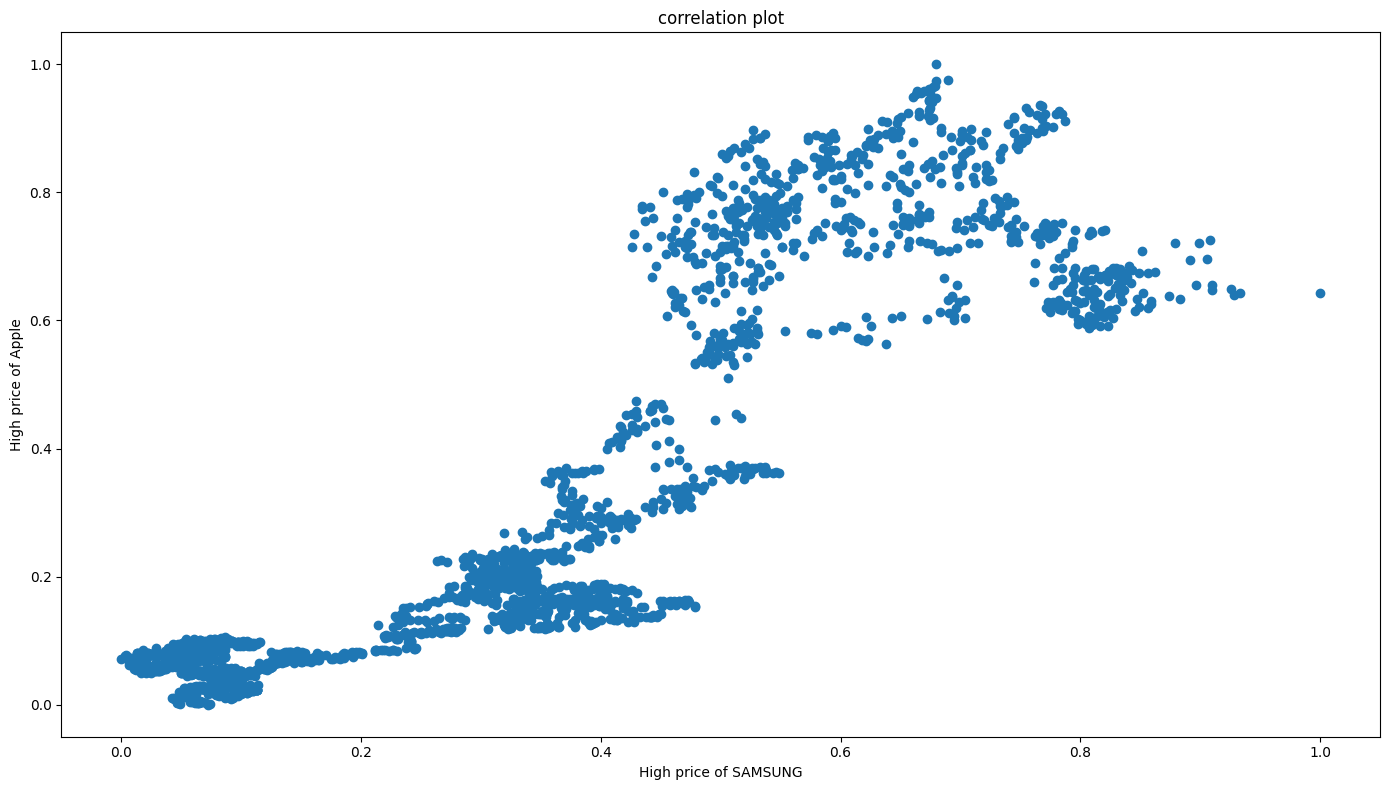

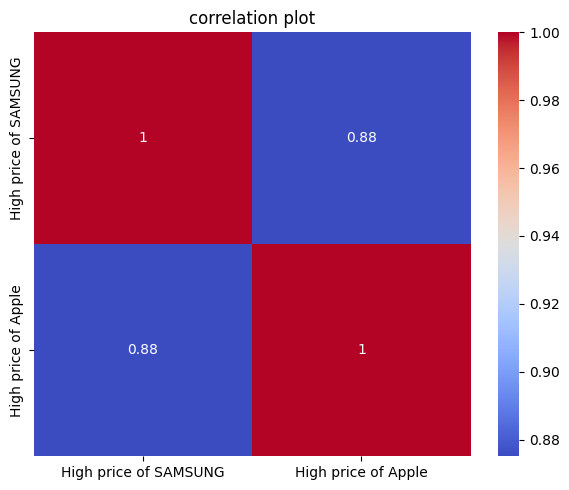

In [34]:
plt.figure(figsize=(14, 8))
plt.scatter(sam_Normalized['High'], apple_Normalized['High'])
plt.xlabel('High price of SAMSUNG')
plt.ylabel('High price of Apple')
plt.title('correlation plot')
plt.tight_layout()
plt.show()

df = pd.DataFrame({'High price of SAMSUNG': sam_Normalized['High'], 'High price of Apple': apple_Normalized['High']})
corr_matrix = df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('correlation plot')
plt.tight_layout()
plt.show()

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl"><b>داده‌های دسته High دارای همبستگی قوی‌ای هستند.</b></div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
تحلیل علّیّت (Causality Analysis):
</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
بررسی رابطه علیت بین داده‌های دسته High دو سهام سامسونگ و اپل:</div>

In [35]:
y = sam['High']
x = apple[['High']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   High   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     8475.
Date:                Sun, 23 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:51:00   Log-Likelihood:                -27221.
No. Observations:                2594   AIC:                         5.445e+04
Df Residuals:                    2592   BIC:                         5.446e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.603e+04    286.334     90.910      0.0

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
    <ul>
        <li>ضریب (coefficient) برابر با 299.9958 است.</li>
        <li>مقدار t-statistic برابر با 92.060 است که نشان می‌دهد ضریب متغیر High معنادار است.</li>
        <li>مقدار p-value متغیر High برابر با 0.000 است که نشان می‌دهد که ضریب متغیر High به طور معناداری از صفر متمایز است.</li>
    </ul>
میزان توجیه‌پذیری مدل با R-squared برابر با 0.766 نیز به نسبت خوب است، که نشان می‌دهد مدل تا حدود زیادی تغییرات متغیر وابسته را توضیح می‌دهد.</div>

<div style = "font-family: yekan ; font-size : 22px ; direction : rtl"><b>
داده‌های دسته Volume
    </b></div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
تحلیل همبستگی (Correlation Analysis):</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
ضریب همبستگی پیرسون (Pearson correlation coefficient)
</div>

In [36]:
correlation_matrix = np.corrcoef(sam_Normalized['Volume'], apple_Normalized['Volume'])
correlation_coefficient_Pearson = correlation_matrix[0, 1]

print("Pearson correlation coefficient:", "{:.2f}".format(correlation_coefficient_Pearson))

Pearson correlation coefficient: 0.05


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
ضریب همبستگی سپیرمن (Spearman correlation coefficient)
</div>

In [37]:
from scipy.stats import spearmanr

correlation_coefficient_Spearman, p_value = spearmanr(sam_Normalized['Volume'], apple_Normalized['Volume'])

print("Spearman correlation coefficient:", "{:.2f}".format(correlation_coefficient_Spearman))
print("p-value:", "{:.2f}".format(p_value))

Spearman correlation coefficient: 0.04
p-value: 0.04


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">چون مقدار هردو ضریب مثبت است نشان دهنده رابطه‌مثبت بین متغیرها است و همچنین
 مقدار p-value کوچکتر از آستانه‌ی قابل قبول است که نشان می‌دهد بعید است این همبستگی<br> به طور تصادفی رخ داده باشد .
</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
رسم نمودار همبستگی</div>

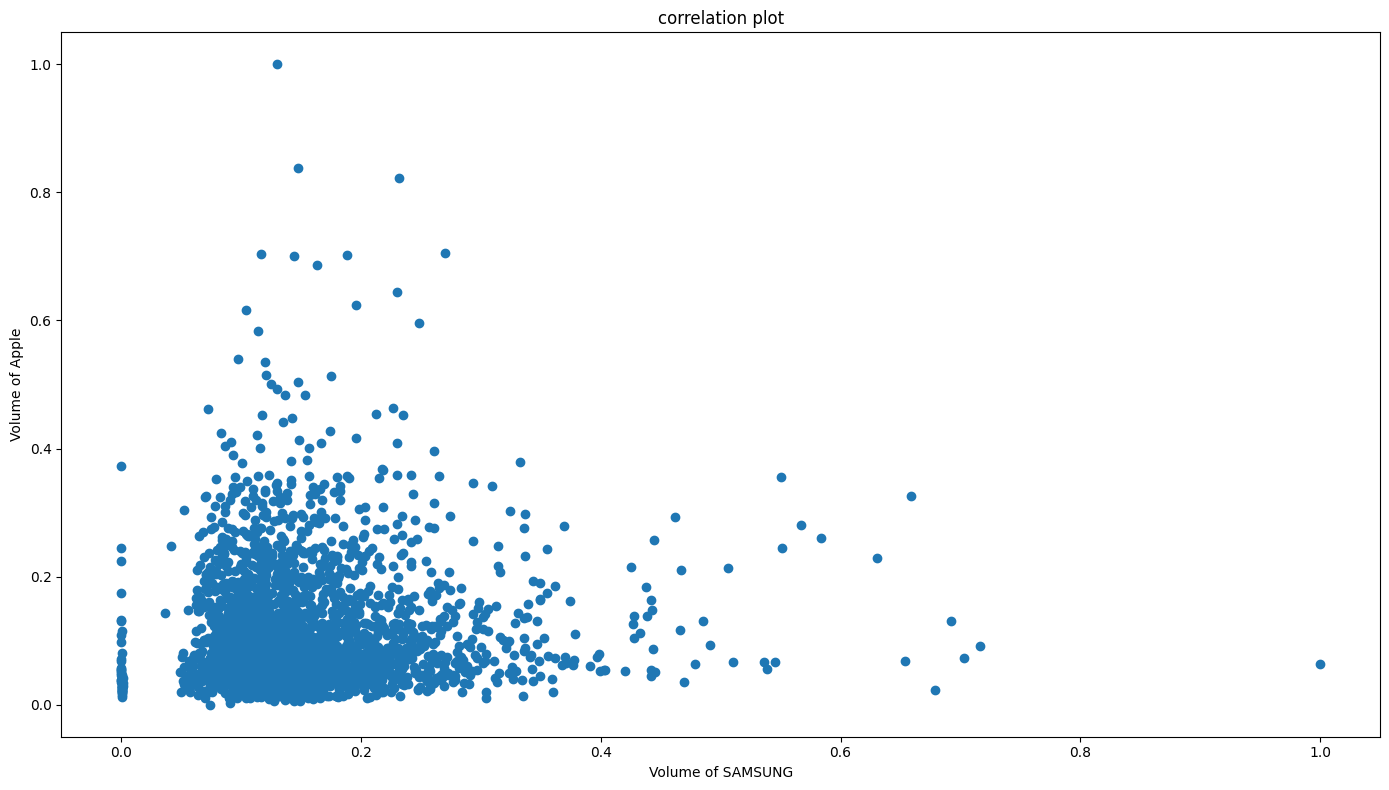

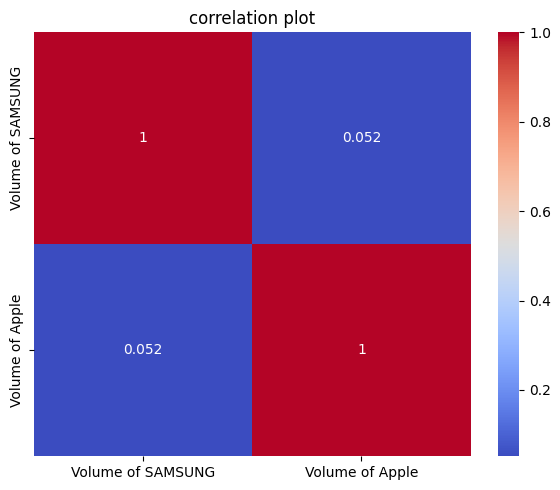

In [38]:
plt.figure(figsize=(14, 8))
plt.scatter(sam_Normalized['Volume'], apple_Normalized['Volume'])
plt.xlabel('Volume of SAMSUNG')
plt.ylabel('Volume of Apple')
plt.title('correlation plot')
plt.tight_layout()
plt.show()

df = pd.DataFrame({'Volume of SAMSUNG': sam_Normalized['Volume'], 'Volume of Apple': apple_Normalized['Volume']})
corr_matrix = df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('correlation plot')
plt.tight_layout()
plt.show()

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl"><b>داده‌های دسته Volume دارای همبستگی ضعیفی هستند.</b></div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
تحلیل علّیّت (Causality Analysis):
</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
بررسی رابطه علیت بین داده‌های دسته Volume دو سهام سامسونگ و اپل:</div>

In [39]:
y = sam['Volume']
x = apple[['Volume']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.951
Date:                Sun, 23 Jul 2023   Prob (F-statistic):            0.00843
Time:                        22:51:01   Log-Likelihood:                -44630.
No. Observations:                2594   AIC:                         8.926e+04
Df Residuals:                    2592   BIC:                         8.928e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.327e+07    2.6e+05     51.073      0.0

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
    <ul>
        <li>ضریب (coefficient) برابر با 0.0038 است.</li>
        <li>مقدار t-statistic برابر با 2.636 است که نشان می‌دهد ضریب متغیر Volume معنادار است.</li>
        <li>مقدار p-value متغیر High برابر با 0.008 است که نشان می‌دهد که ضریب متغیر Volume به طور معناداری از صفر متمایز است.</li>
    </ul>
به طور خلاصه، نتایج نشان می‌دهد که متغیر Volume  تأثیر معناداری دارد و مقدار آن ضریب مثبت است (به اندازه 0.0038). با این حال، R-squared و Adjusted R-squared بسیار کم است (0.003 و 0.002 به ترتیب)، که نشان می‌دهد که مدل به طور محدود تغییرات متغیر وابسته را توضیح می‌دهد. همچنین، با توجه به مقدار F-statistic و مقدار p-value آن، مدل به طور کلی معنادار است.
</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
بررسی رابطه علیت بین داده دسته‌های High و Volume در سهام سامسونگ:</div>

In [40]:
y = sam['Volume']
x = sam[['High']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     205.6
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           6.22e-45
Time:                        22:51:01   Log-Likelihood:                -44535.
No. Observations:                2594   AIC:                         8.907e+04
Df Residuals:                    2592   BIC:                         8.908e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.752e+06    3.8e+05     23.036      0.0

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
بررسی رابطه علیت بین داده دسته‌های High و Volume در سهام اپل:</div>

In [41]:
y = apple['Volume']
x = apple[['High']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     735.9
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          7.16e-143
Time:                        22:51:01   Log-Likelihood:                -51063.
No. Observations:                2594   AIC:                         1.021e+05
Df Residuals:                    2592   BIC:                         1.021e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.113e+08   2.81e+06     75.217      0.0

<div style = "font-family: yekan ; font-size : 22px ; direction : rtl; color : #FF0000">
4. تحلیل روند و فصلی بودن
</div>


<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
    <li>تحلیل روند</li>

</ul>

</div>


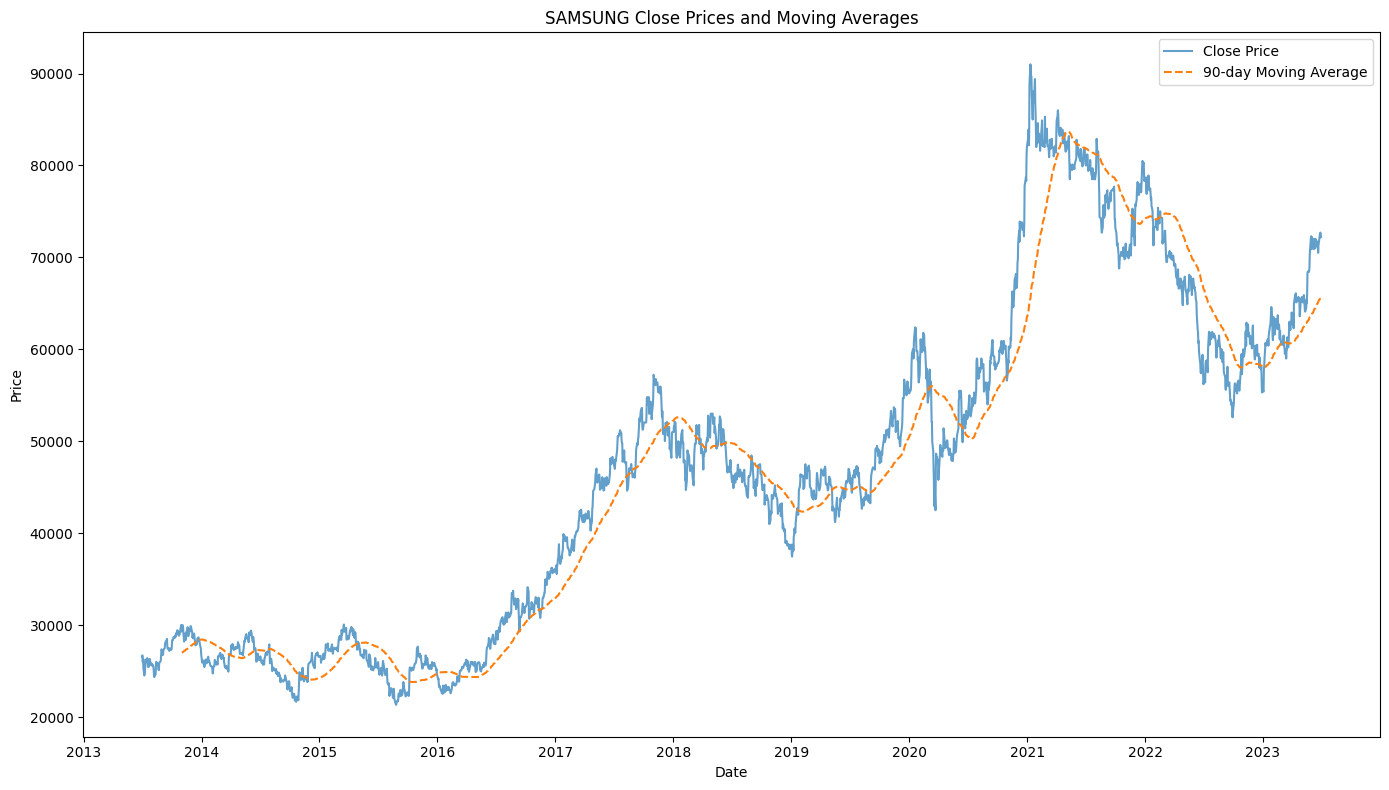

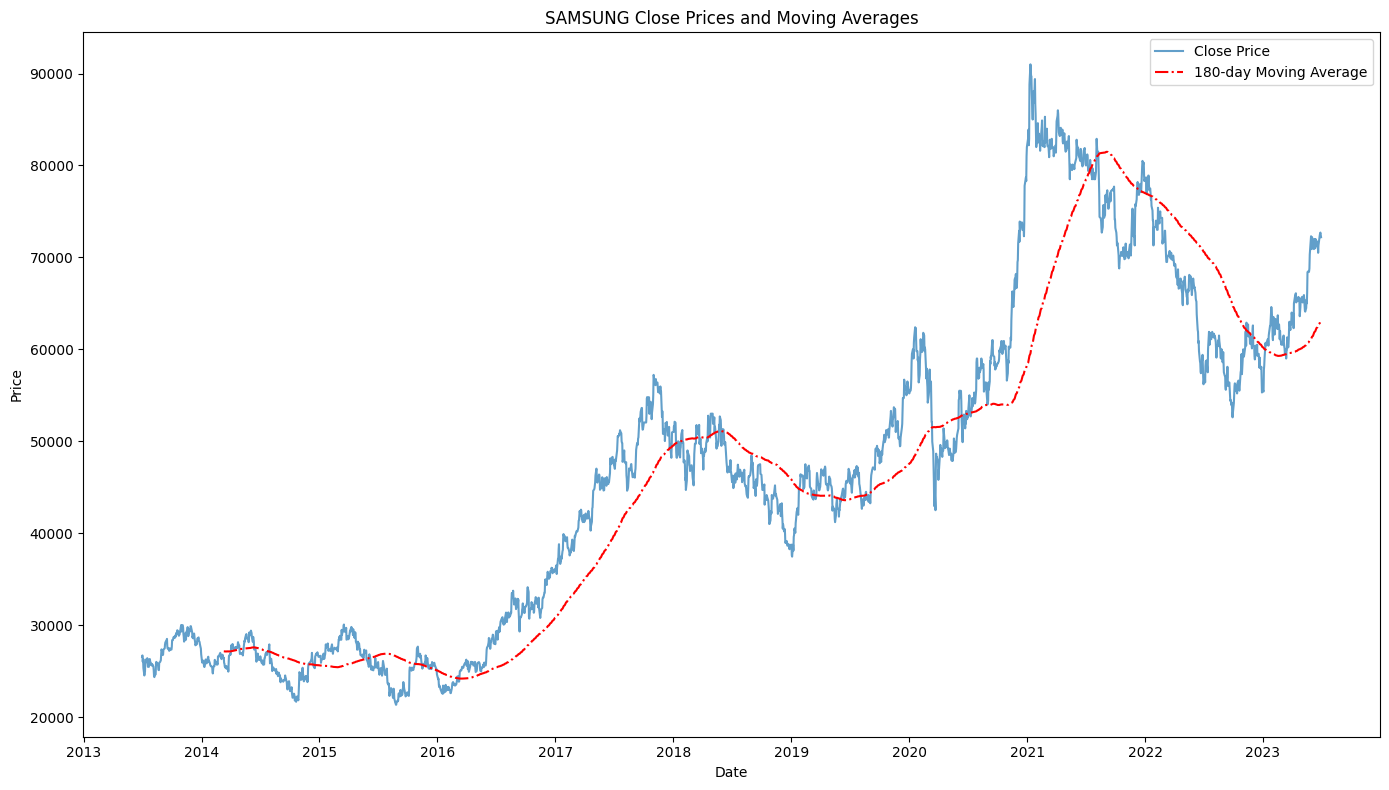

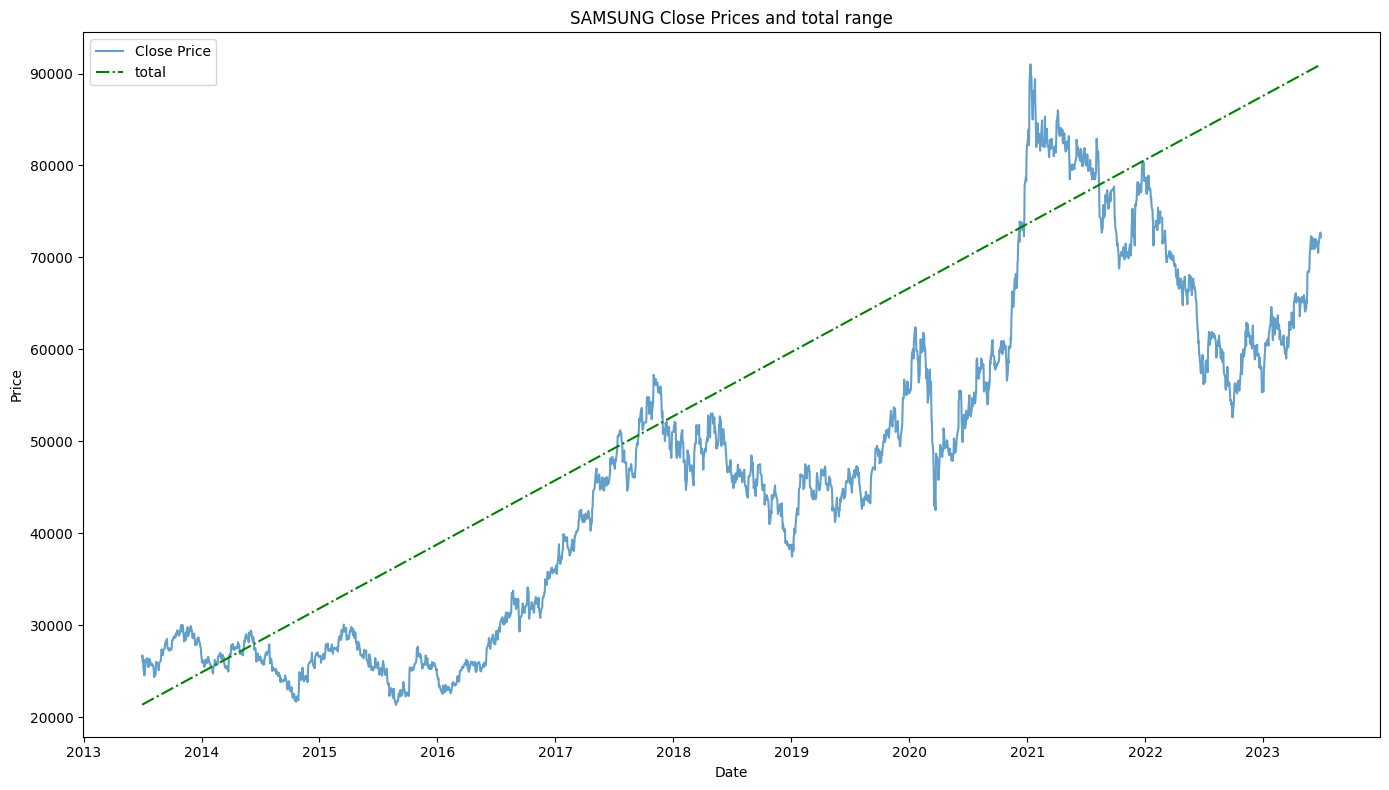

In [42]:
sam_three_month_MA = sam['Close'].rolling(window = 90).mean().dropna(axis = 0)
sam_six_month_MA = sam['Close'].rolling(window = 180).mean().dropna(axis = 0)

plt.figure(figsize=(14, 8))
plt.plot(sam['Close'], label='Close Price', alpha=0.7)
plt.plot(sam_three_month_MA, label='90-day Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SAMSUNG Close Prices and Moving Averages')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(sam['Close'], label='Close Price', alpha=0.7)
plt.plot(sam_six_month_MA, label='180-day Moving Average', linestyle='-.' , c = 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SAMSUNG Close Prices and Moving Averages')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(sam['Close'], label='Close Price', alpha=0.7)
plt.plot([sam['Close'].index[0] , sam['Close'].index[-1]],[sam['Close'].min() , sam['Close'].max()], label='total', linestyle='-.' , c = 'green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SAMSUNG Close Prices and total range')
plt.legend()
plt.tight_layout()
plt.show()

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
    سهام شرکت سامسونگ بطور کلی صعودی بوده است اما با بررسی MA برای مدت یکساله متوجه می‌شویم:
    <br><ul>
        <li>از سال 2013 تا 2018 : صعودی</li>
        <li>از سال 2018 تا 2019 : نزولی</li>
        <li>از سال 2019 تا 2021 : صعودی</li>
        <li>از سال 2021 تا اواسط 2022 : نزولی</li>
        <li>از سال 2022 تا الان : صعودی</li>
    </ul></div>

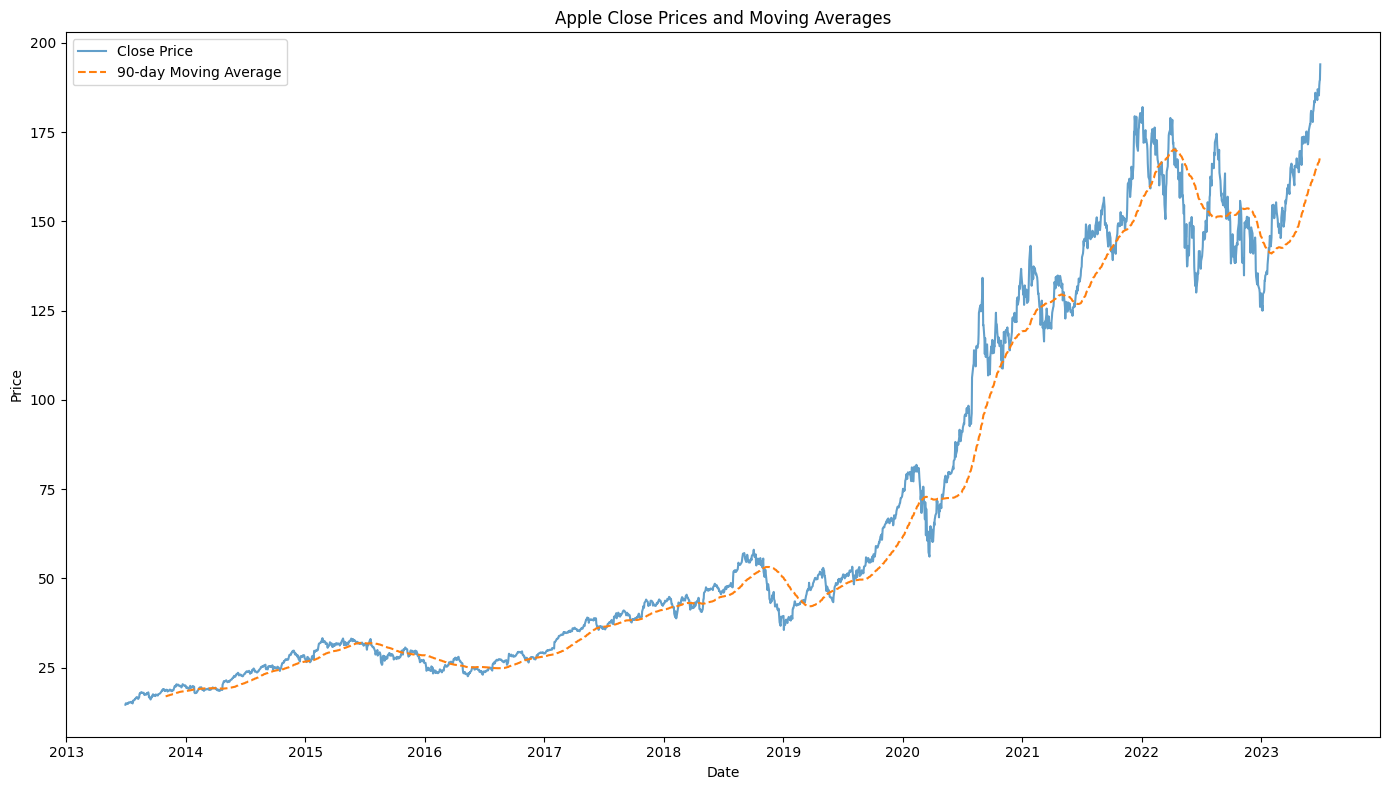

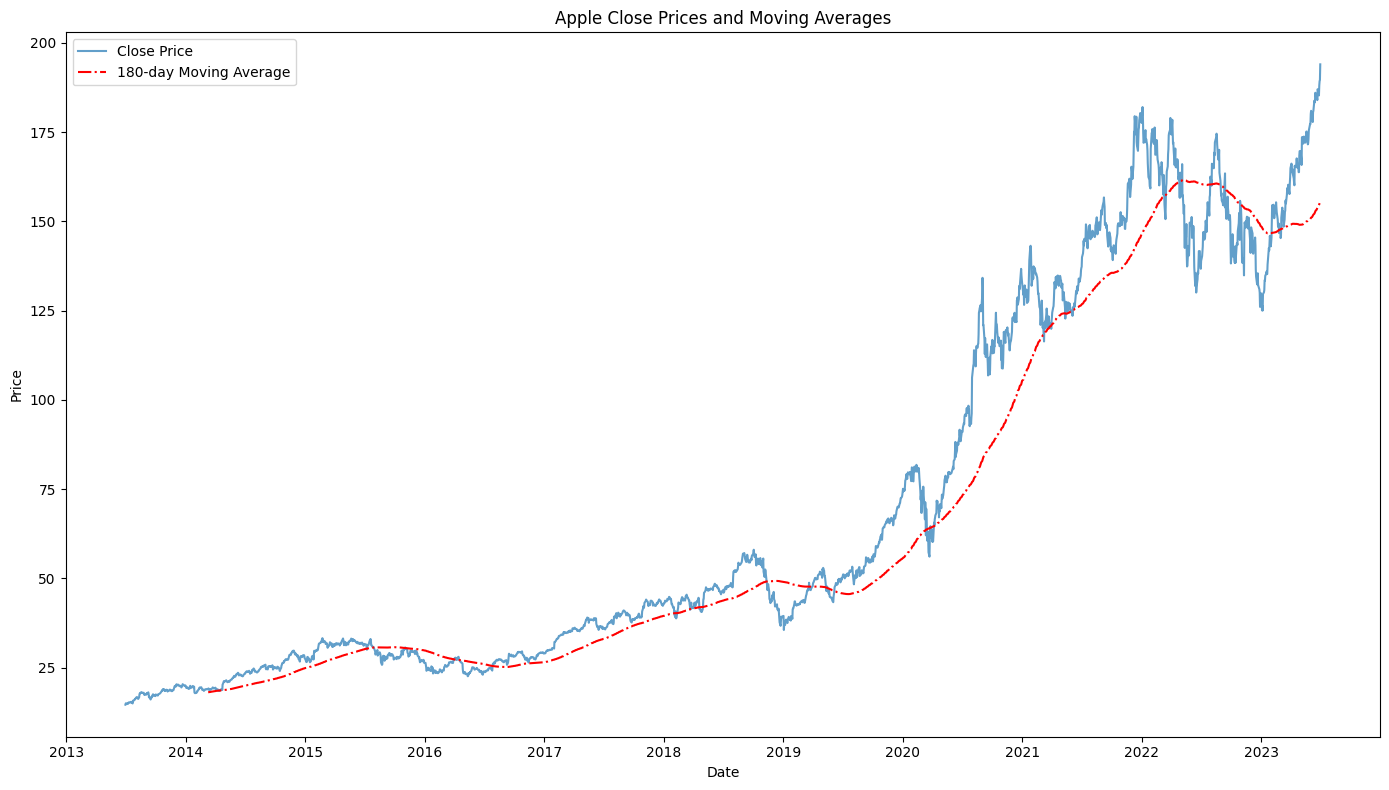

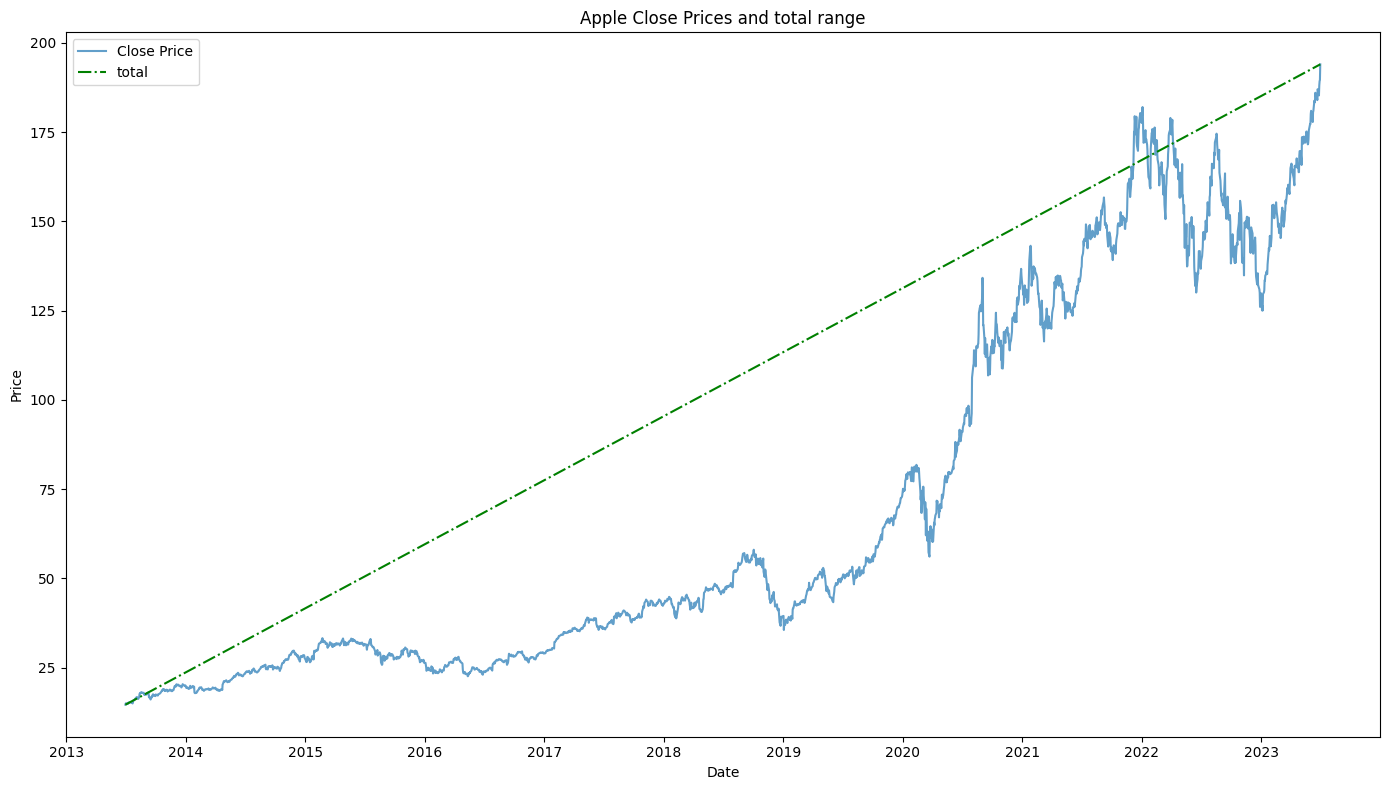

In [43]:
apple_three_month_MA = apple['Close'].rolling(window = 90).mean().dropna(axis = 0)
apple_six_month_MA = apple['Close'].rolling(window = 180).mean().dropna(axis = 0)

plt.figure(figsize=(14, 8))
plt.plot(apple['Close'], label='Close Price', alpha=0.7)
plt.plot(apple_three_month_MA, label='90-day Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Close Prices and Moving Averages')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(apple['Close'], label='Close Price', alpha=0.7)
plt.plot(apple_six_month_MA, label='180-day Moving Average', linestyle='-.' , c = 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Close Prices and Moving Averages')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(apple['Close'], label='Close Price', alpha=0.7)
plt.plot([apple['Close'].index[0] , apple['Close'].index[-1]],[apple['Close'].min() , apple['Close'].max()], label='total', linestyle='-.' , c = 'green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Close Prices and total range')
plt.legend()
plt.tight_layout()
plt.show()

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
سهام شرکت اپل همواره صعودی بوده است</div>

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
    <li>تحلیل فصلی بودن</li>

</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
با استفاده از کتابخانه statsmodels نمودار فصلی را برای سهام سامسونگ و اپل رسم می‌کنیم تا بتوانیم الگوی فصلی را در صورت وجود مشاهده کنیم:</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
SAMSUNG:</div>

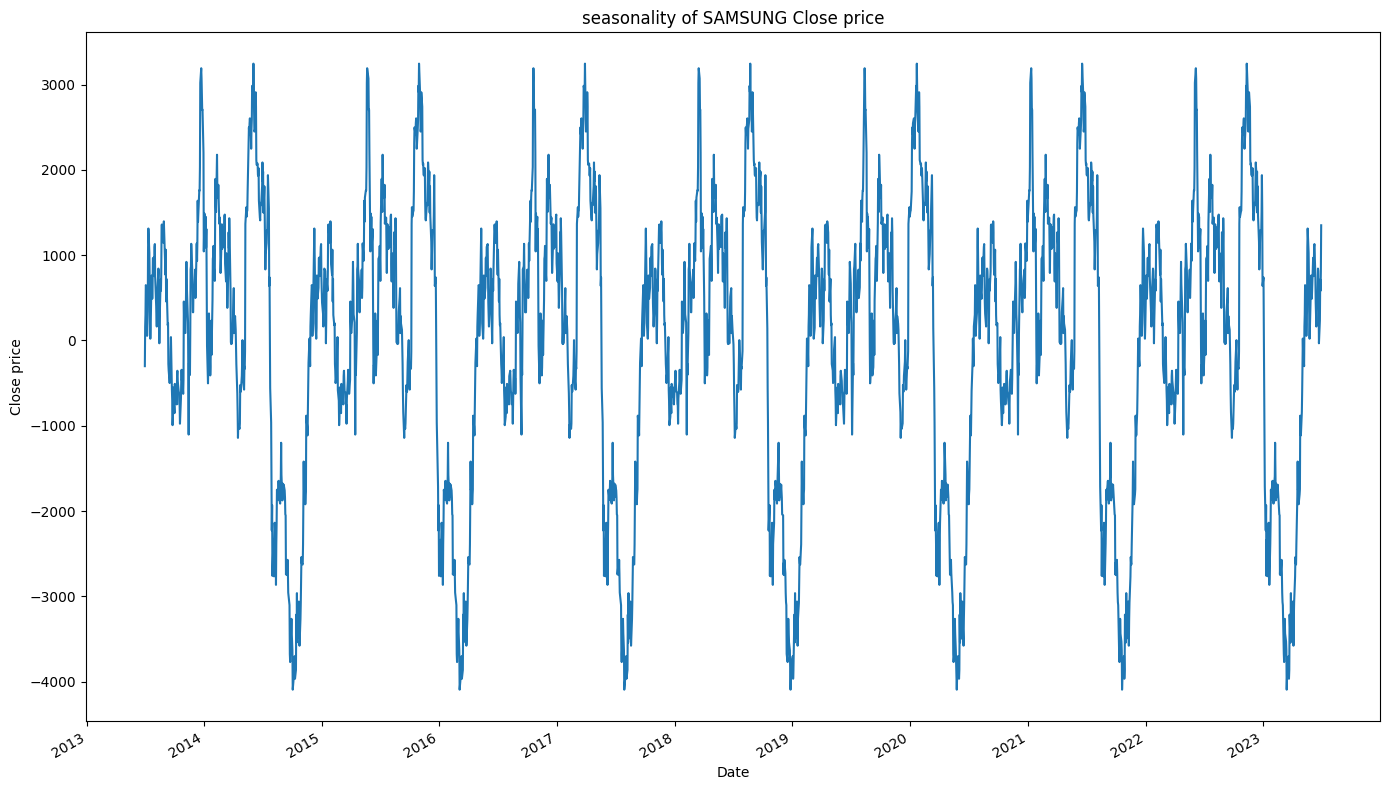

In [44]:
plt.figure(figsize=(14, 8))
result1 = seasonal_decompose(sam['Close'], model='additive', period=365)

result1.seasonal.plot()
plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('seasonality of SAMSUNG Close price')
plt.tight_layout()
plt.show()

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
باتوجه به نمودار رسم شده متوجه می‌شویم که سهام شرکت سامسونگ دارای روند فصلی و الگوی تکرار شونده است</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
Apple:
</div>

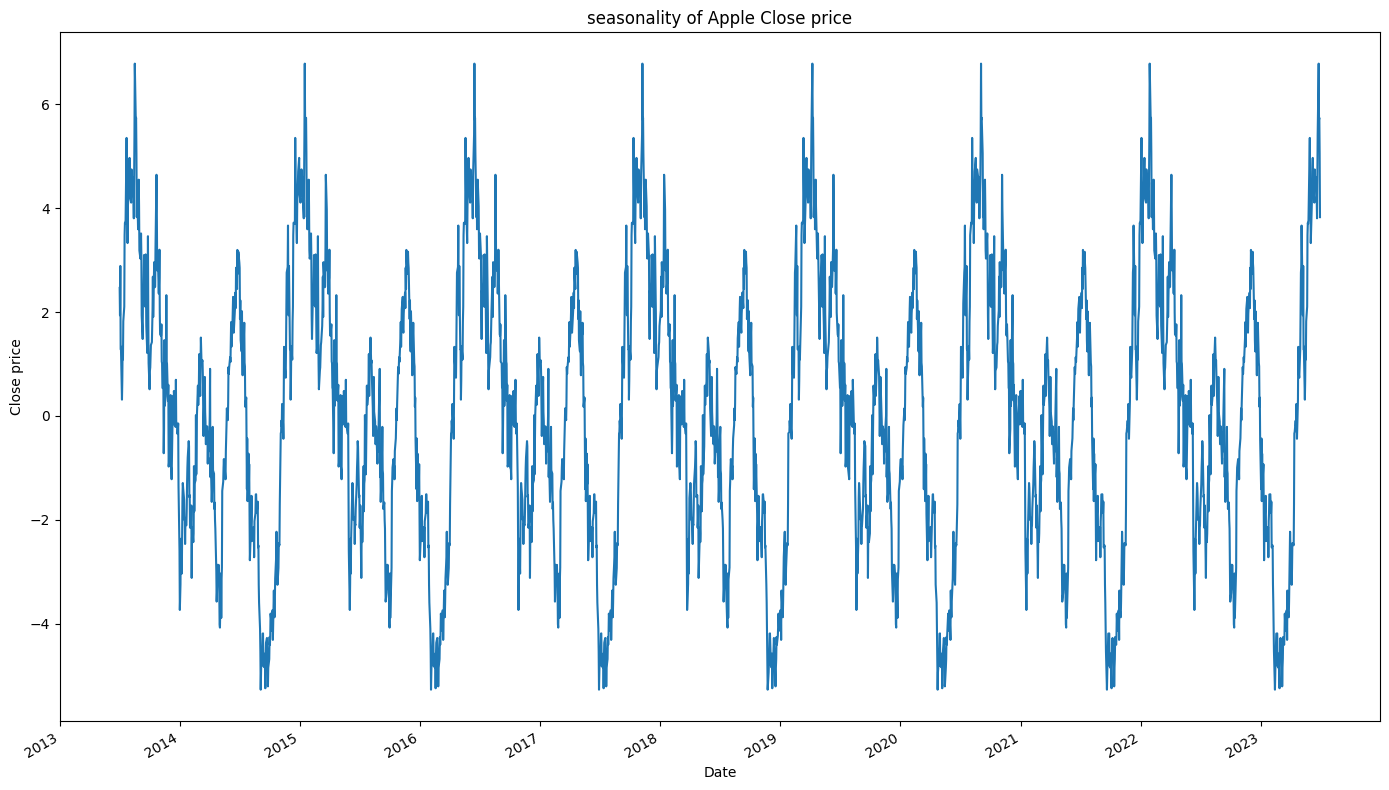

In [45]:
plt.figure(figsize=(14, 8))
result2 = seasonal_decompose(apple['Close'], model='additive', period=365)

result2.seasonal.plot()
plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('seasonality of Apple Close price')
plt.tight_layout()
plt.show()

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
باتوجه به نمودار رسم شده متوجه می‌شویم که سهام شرکت اپل دارای روند فصلی و الگوی تکرار شونده است</div>

<div style = "font-family: yekan ; font-size : 22px ; direction : rtl; color : #FF0000">
5.  تجزیه و تحلیل ترکیب اصلی(PCA) برای تمام داده‌ها 
</div>


In [46]:
start_date = '2018-06-30'
end_date = '2023-07-01'

EUR_USD = yf.download('EURUSD=X', start = start_date, end = end_date)
USD_SAR = yf.download('USDSAR=X', start = start_date, end = end_date)
USD_CNY = yf.download('USDCNY=X', start = start_date, end = end_date)
BTC = yf.download('BTC-USD', start = start_date, end = end_date)
US_INT = yf.download('^TNX', start = start_date, end = end_date)
Gold = yf.download('GC=F', start = start_date, end = end_date)
Copper = yf.download('HG=F', start = start_date, end = end_date)
Wheat = yf.download('ZW=F', start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
    <li>آماده‌سازی داده برای PCA </li>

</ul>

</div>


In [47]:
scaler = MinMaxScaler()
EUR_USD_Normalized = pd.DataFrame(scaler.fit_transform(EUR_USD), columns=EUR_USD.columns, index=EUR_USD.index)
USD_SAR_Normalized = pd.DataFrame(scaler.fit_transform(USD_SAR), columns=USD_SAR.columns, index=USD_SAR.index)
USD_CNY_Normalized = pd.DataFrame(scaler.fit_transform(USD_CNY), columns=USD_CNY.columns, index=USD_CNY.index)
BTC_Normalized = pd.DataFrame(scaler.fit_transform(BTC), columns=BTC.columns, index=BTC.index)
US_INT_Normalized = pd.DataFrame(scaler.fit_transform(US_INT), columns=US_INT.columns, index=US_INT.index)
Gold_Normalized = pd.DataFrame(scaler.fit_transform(Gold), columns=Gold.columns, index=Gold.index)
Copper_Normalized = pd.DataFrame(scaler.fit_transform(Copper), columns=Copper.columns, index=Copper.index)
Wheat_Normalized = pd.DataFrame(scaler.fit_transform(Wheat), columns=Wheat.columns, index=Wheat.index)

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
    <li>استفاده از PCA و بصری سازی</li>

</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
نرخ تبدیل دلار/ یورو
</div>

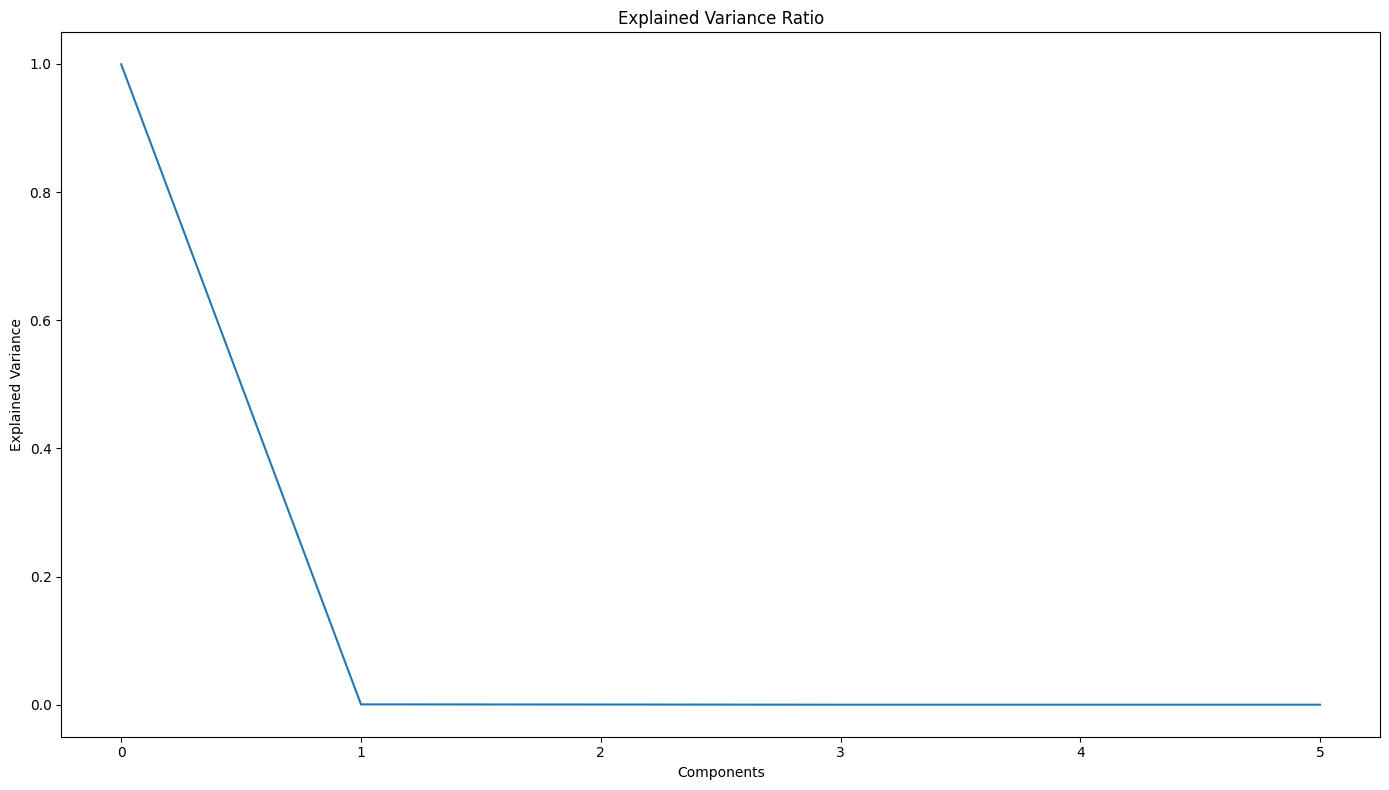

In [48]:
pca = PCA(n_components = EUR_USD_Normalized.shape[1])
pca.fit(EUR_USD_Normalized)
transformed_data = pca.transform(EUR_USD_Normalized)
principal_components_df = pd.DataFrame(data=transformed_data,columns=['PC%s' % i for i in range(1, EUR_USD_Normalized.shape[1] + 1)])
explained_variance_ratio = pca.explained_variance_ratio_
loadings_df = pd.DataFrame(pca.components_.T,columns=['PC%s' % i for i in range(1, EUR_USD_Normalized.shape[1] + 1)],index=EUR_USD_Normalized.columns)
plt.figure(figsize=(14, 8))
plt.plot(explained_variance_ratio)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.title('Explained Variance Ratio')
plt.tight_layout()
plt.show()

In [49]:
print("Principal Components:")
principal_components_df

Principal Components:


PC1     PC2     PC3     PC4     PC5    PC6
0    -0.3526  0.0176  0.0035 -0.0002  0.0000 0.0000
1    -0.3391 -0.0038 -0.0014  0.0003  0.0000 0.0000
2    -0.3502  0.0001 -0.0027 -0.0002  0.0000 0.0000
3    -0.3612 -0.0093  0.0040  0.0001  0.0000 0.0000
4    -0.3902 -0.0108  0.0092  0.0005  0.0000 0.0000
...      ...     ...     ...     ...     ...    ...
1299  0.2665 -0.0013 -0.0105 -0.0000 -0.0000 0.0000
1300  0.2530 -0.0118  0.0020 -0.0000 -0.0000 0.0000
1301  0.2332  0.0097 -0.0045 -0.0001 -0.0000 0.0000
1302  0.2631  0.0057  0.0001 -0.0001 -0.0000 0.0000
1303  0.2918 -0.0059  0.0072 -0.0001 -0.0000 0.0000

[1304 rows x 6 columns]

In [50]:
print("Loadings (Principal Components):")
loadings_df

Loadings (Principal Components):


PC1     PC2     PC3     PC4     PC5    PC6
Open      -0.4450  0.3601 -0.0660 -0.8173  0.0000 0.0000
High      -0.4507 -0.4134  0.7912 -0.0006 -0.0000 0.0000
Low       -0.4510 -0.6594 -0.6015  0.0037  0.0000 0.0000
Close     -0.4446  0.3638 -0.0629  0.4075 -0.7071 0.0000
Adj Close -0.4446  0.3638 -0.0629  0.4075  0.7071 0.0000
Volume    -0.0000  0.0000  0.0000 -0.0000  0.0000 1.0000

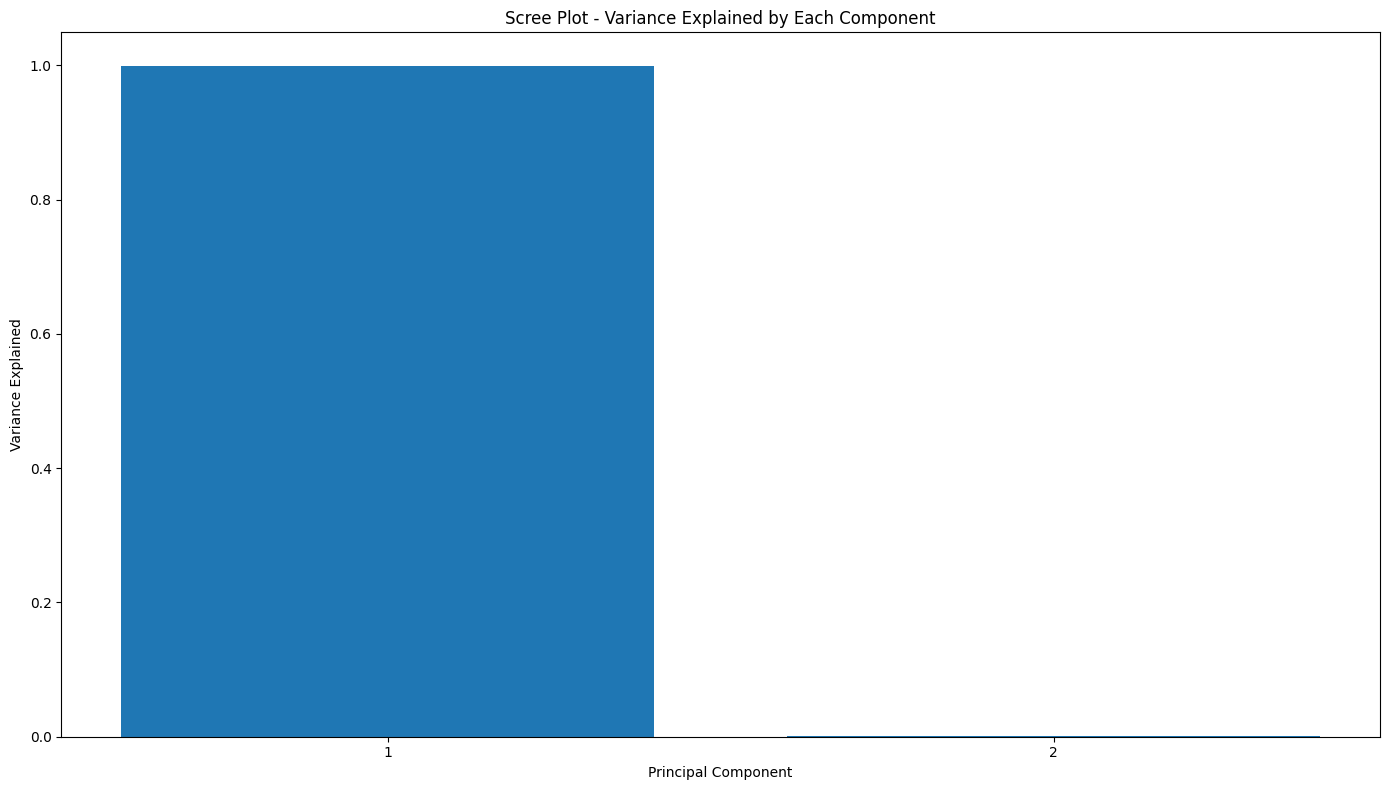

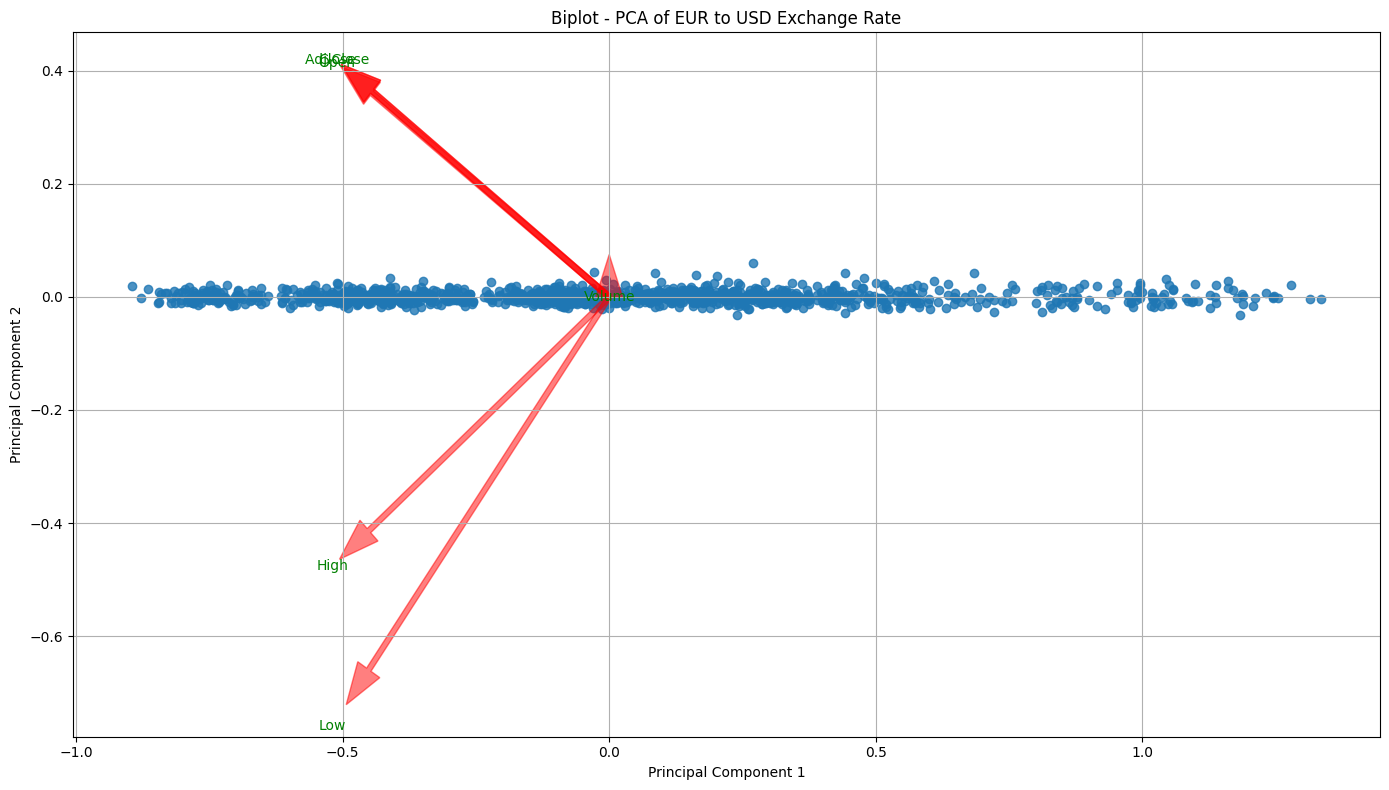

In [51]:
X = EUR_USD_Normalized.values
X_centered = X - np.mean(X, axis=0)
covariance_matrix = np.cov(X_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
num_components = 2
pca = PCA(n_components=num_components)
pca.fit(X_centered)
X_transformed = pca.transform(X_centered)
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(14, 8))
plt.bar(range(1, num_components + 1), explained_variance_ratio, align='center')
plt.xticks(range(1, num_components + 1))
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot - Variance Explained by Each Component')
plt.tight_layout()
plt.show()

loadings_df = pd.DataFrame(pca.components_.T,columns=['PC%s' % i for i in range(1, num_components + 1)],index=EUR_USD_Normalized.columns)

plt.figure(figsize=(14, 8))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot - PCA of EUR to USD Exchange Rate')
for i, feature in enumerate(EUR_USD_Normalized.columns):
    plt.arrow(0, 0, loadings_df.loc[feature, 'PC1'], loadings_df.loc[feature, 'PC2'], color='r', alpha=0.5,width=0.01, head_width=0.05)
    plt.text(loadings_df.loc[feature, 'PC1'] * 1.15, loadings_df.loc[feature, 'PC2'] * 1.15, feature, color='g',ha='center', va='center')
plt.grid()
plt.tight_layout()
plt.show()

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
نرخ تبدیل دلار/ ریال سعودی</div>

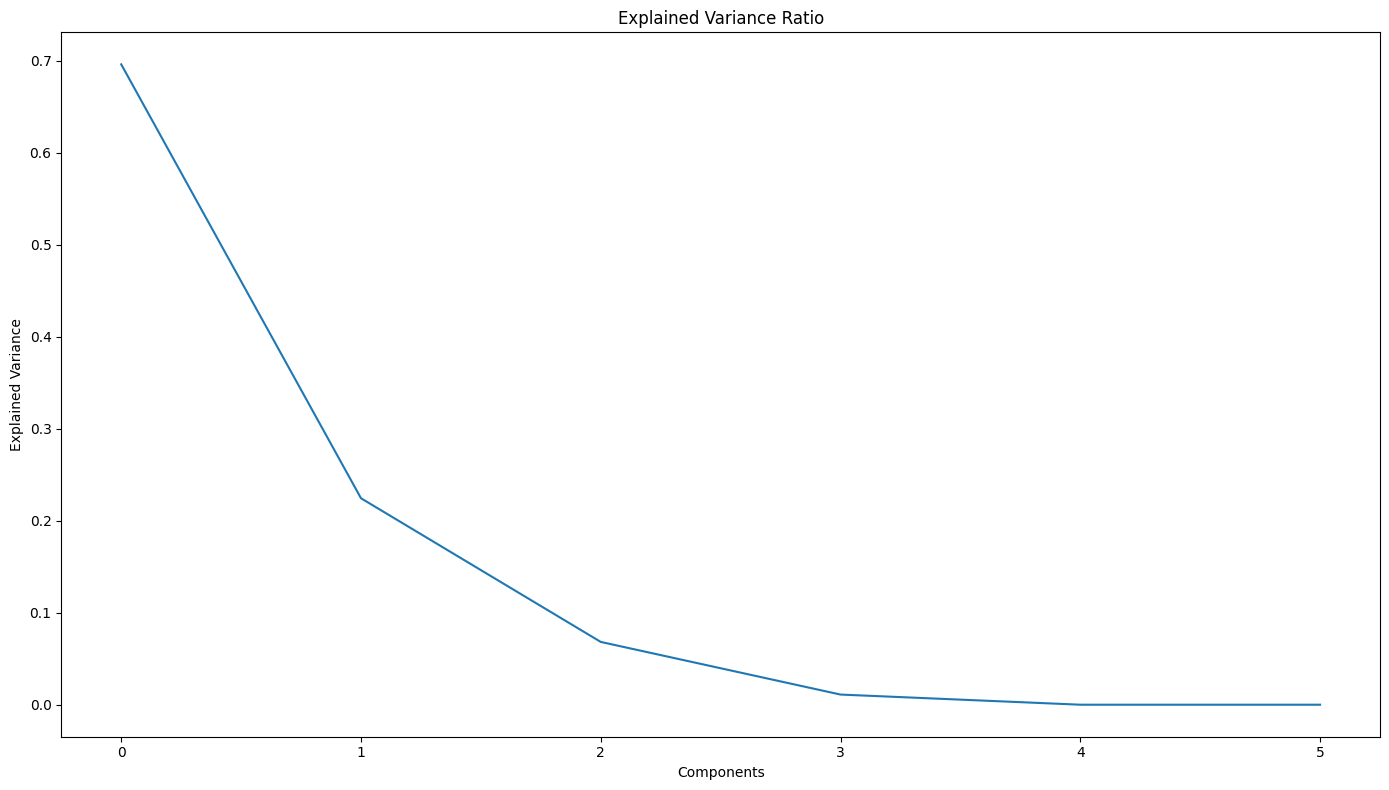

In [52]:
pca = PCA(n_components = USD_SAR_Normalized.shape[1])
pca.fit(USD_SAR_Normalized)
transformed_data = pca.transform(USD_SAR_Normalized)
principal_components_df = pd.DataFrame(data=transformed_data,columns=['PC%s' % i for i in range(1, USD_SAR_Normalized.shape[1] + 1)])
explained_variance_ratio = pca.explained_variance_ratio_
loadings_df = pd.DataFrame(pca.components_.T,columns=['PC%s' % i for i in range(1, USD_SAR_Normalized.shape[1] + 1)],index=USD_SAR_Normalized.columns)
plt.figure(figsize=(14, 8))
plt.plot(explained_variance_ratio)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.title('Explained Variance Ratio')
plt.tight_layout()
plt.show()

In [53]:
print("Principal Components:")
principal_components_df

Principal Components:


PC1     PC2     PC3     PC4     PC5    PC6
0    -0.0102 -0.0547  0.0259  0.0164 -0.0000 0.0000
1     0.0749  0.0167 -0.0127 -0.0152  0.0000 0.0000
2     0.1072  0.0179 -0.0139  0.0034  0.0000 0.0000
3     0.0825  0.0134 -0.0090 -0.0053  0.0000 0.0000
4     0.0710  0.0144 -0.0066 -0.0088  0.0000 0.0000
...      ...     ...     ...     ...     ...    ...
1298 -0.0620 -0.0441  0.0214 -0.0036 -0.0000 0.0000
1299  0.0917  0.0138 -0.0082 -0.0019  0.0000 0.0000
1300  0.1001 -0.0002 -0.0173 -0.0015  0.0000 0.0000
1301  0.0864  0.0154 -0.0192 -0.0014  0.0000 0.0000
1302  0.0823  0.0182 -0.0197 -0.0013  0.0000 0.0000

[1303 rows x 6 columns]

In [54]:
print("Loadings (Principal Components):")
loadings_df

Loadings (Principal Components):


PC1     PC2     PC3     PC4     PC5    PC6
Open      -0.4706 -0.2866  0.1272 -0.8248  0.0000 0.0000
High      -0.5335  0.8451 -0.0349  0.0053 -0.0000 0.0000
Low       -0.2286 -0.1840 -0.9548  0.0472  0.0000 0.0000
Close     -0.4700 -0.2914  0.1884  0.3984 -0.7071 0.0000
Adj Close -0.4700 -0.2914  0.1884  0.3984  0.7071 0.0000
Volume    -0.0000  0.0000 -0.0000 -0.0000  0.0000 1.0000

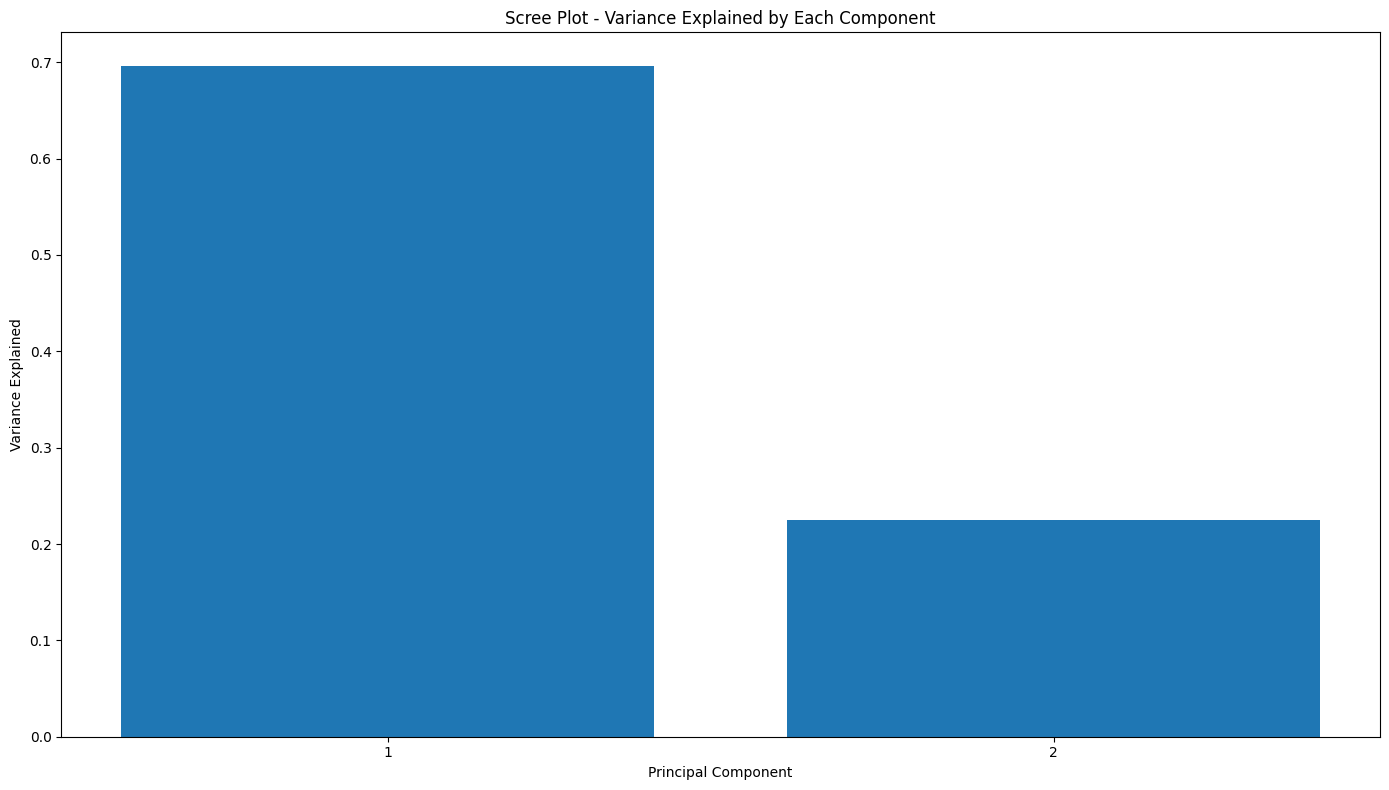

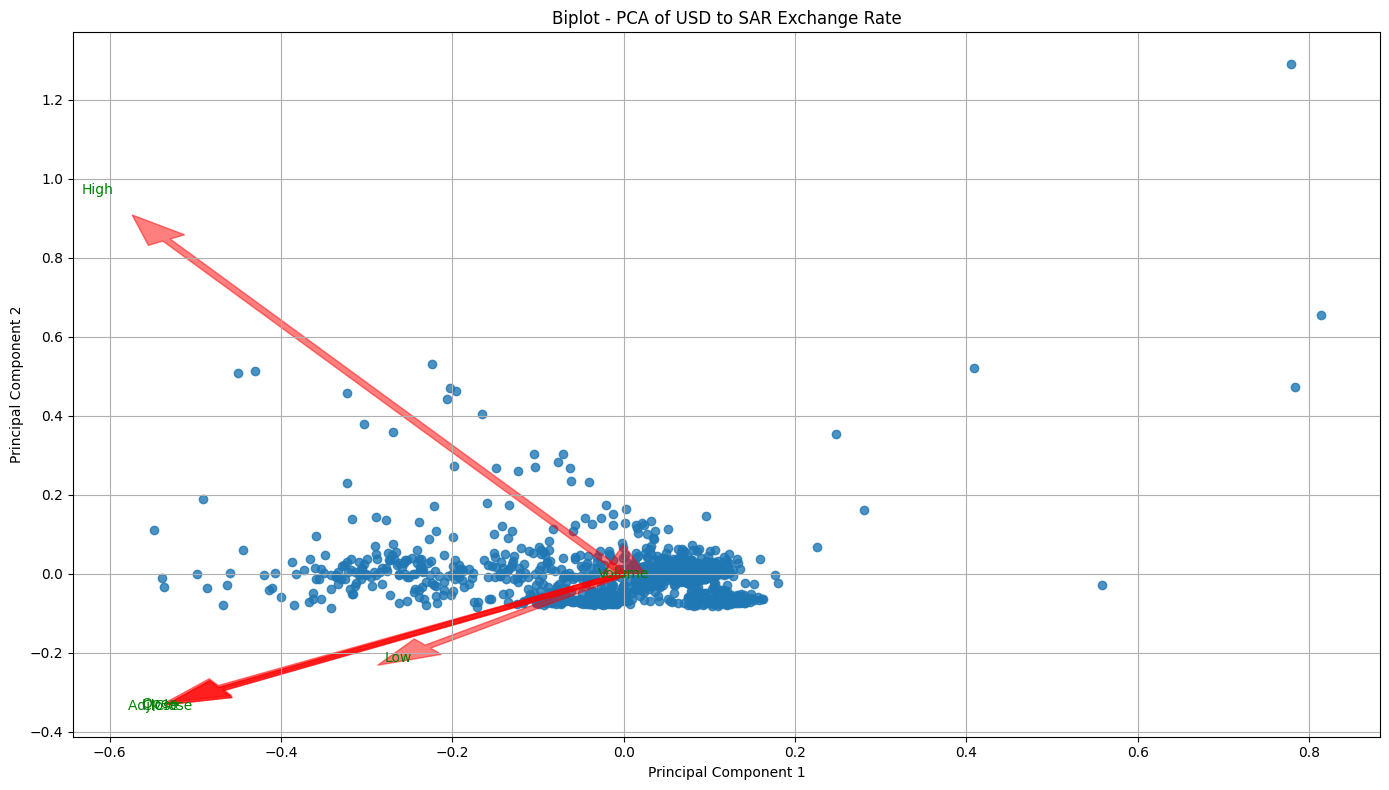

In [55]:
X = USD_SAR_Normalized.values
X_centered = X - np.mean(X, axis=0)
covariance_matrix = np.cov(X_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
num_components = 2
pca = PCA(n_components=num_components)
pca.fit(X_centered)
X_transformed = pca.transform(X_centered)
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(14, 8))
plt.bar(range(1, num_components + 1), explained_variance_ratio, align='center')
plt.xticks(range(1, num_components + 1))
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot - Variance Explained by Each Component')
plt.tight_layout()
plt.show()

loadings_df = pd.DataFrame(pca.components_.T,columns=['PC%s' % i for i in range(1, num_components + 1)],index=USD_SAR_Normalized.columns)

plt.figure(figsize=(14, 8))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot - PCA of USD to SAR Exchange Rate')
for i, feature in enumerate(USD_SAR_Normalized.columns):
    plt.arrow(0, 0, loadings_df.loc[feature, 'PC1'], loadings_df.loc[feature, 'PC2'], color='r', alpha=0.5,width=0.01, head_width=0.05)
    plt.text(loadings_df.loc[feature, 'PC1'] * 1.15, loadings_df.loc[feature, 'PC2'] * 1.15, feature, color='g',ha='center', va='center')
plt.grid()
plt.tight_layout()
plt.show()

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
نرخ تبدیل دلار/ یوان چینی
</div>

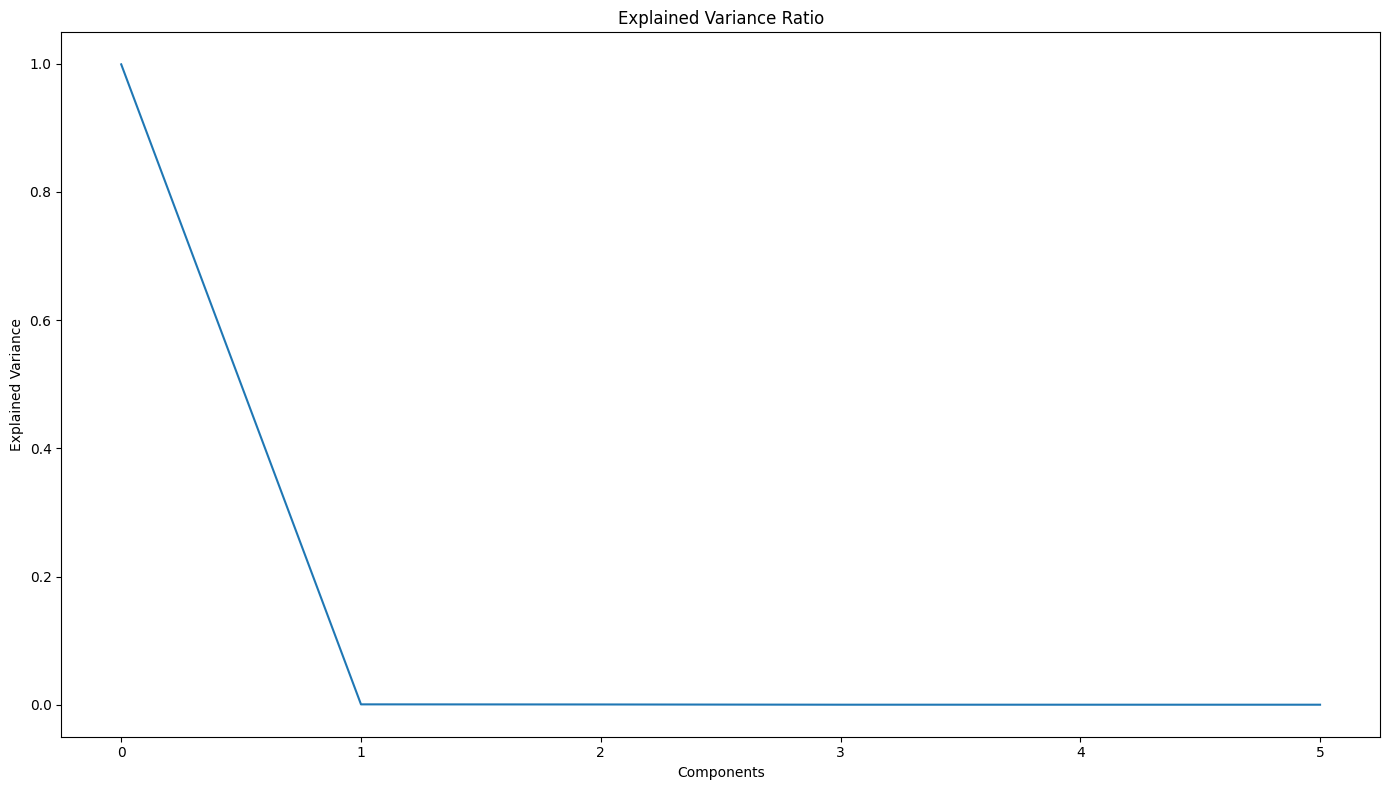

In [56]:
pca = PCA(n_components = USD_CNY_Normalized.shape[1])
pca.fit(USD_CNY_Normalized)
transformed_data = pca.transform(USD_CNY_Normalized)
principal_components_df = pd.DataFrame(data=transformed_data,columns=['PC%s' % i for i in range(1, USD_CNY_Normalized.shape[1] + 1)])
explained_variance_ratio = pca.explained_variance_ratio_
loadings_df = pd.DataFrame(pca.components_.T,columns=['PC%s' % i for i in range(1, USD_CNY_Normalized.shape[1] + 1)],index=USD_CNY_Normalized.columns)
plt.figure(figsize=(14, 8))
plt.plot(explained_variance_ratio)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.title('Explained Variance Ratio')
plt.tight_layout()
plt.show()

In [57]:
print("Principal Components:")
principal_components_df

Principal Components:


PC1     PC2     PC3     PC4     PC5    PC6
0    -0.3214 -0.0213  0.0214  0.0017 -0.0000 0.0000
1    -0.2364 -0.0014  0.0395 -0.0010 -0.0000 0.0000
2    -0.3200  0.0233  0.0105  0.0004 -0.0000 0.0000
3    -0.3205 -0.0053 -0.0009 -0.0003 -0.0000 0.0000
4    -0.3000 -0.0124  0.0090 -0.0012 -0.0000 0.0000
...      ...     ...     ...     ...     ...    ...
1298  0.9294 -0.0276  0.0256 -0.0008  0.0000 0.0000
1299  1.0169  0.0200 -0.0013 -0.0007  0.0000 0.0000
1300  1.0091 -0.0189  0.0054 -0.0008  0.0000 0.0000
1301  1.0449  0.0035 -0.0051 -0.0008  0.0000 0.0000
1302  1.0706 -0.0050 -0.0045 -0.0008  0.0000 0.0000

[1303 rows x 6 columns]

In [58]:
print("Loadings (Principal Components):")
loadings_df

Loadings (Principal Components):


PC1     PC2     PC3     PC4     PC5    PC6
Open      0.4476  0.3580 -0.0798 -0.8156 -0.0000 0.0000
High      0.4445 -0.3773  0.8124 -0.0012 -0.0000 0.0000
Low       0.4480 -0.6917 -0.5664 -0.0023  0.0000 0.0000
Close     0.4480  0.3543 -0.0800  0.4092  0.7071 0.0000
Adj Close 0.4480  0.3543 -0.0800  0.4092 -0.7071 0.0000
Volume    0.0000  0.0000 -0.0000  0.0000 -0.0000 1.0000

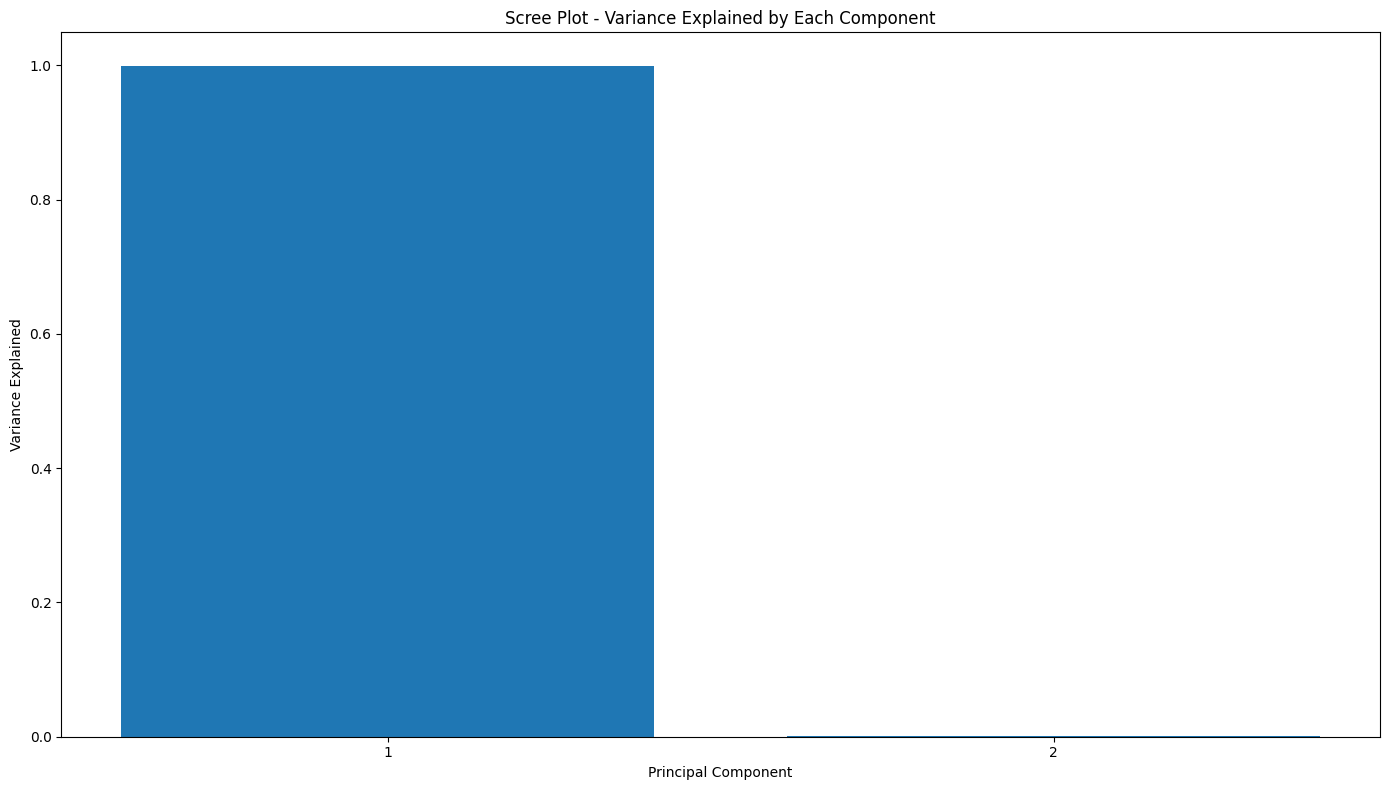

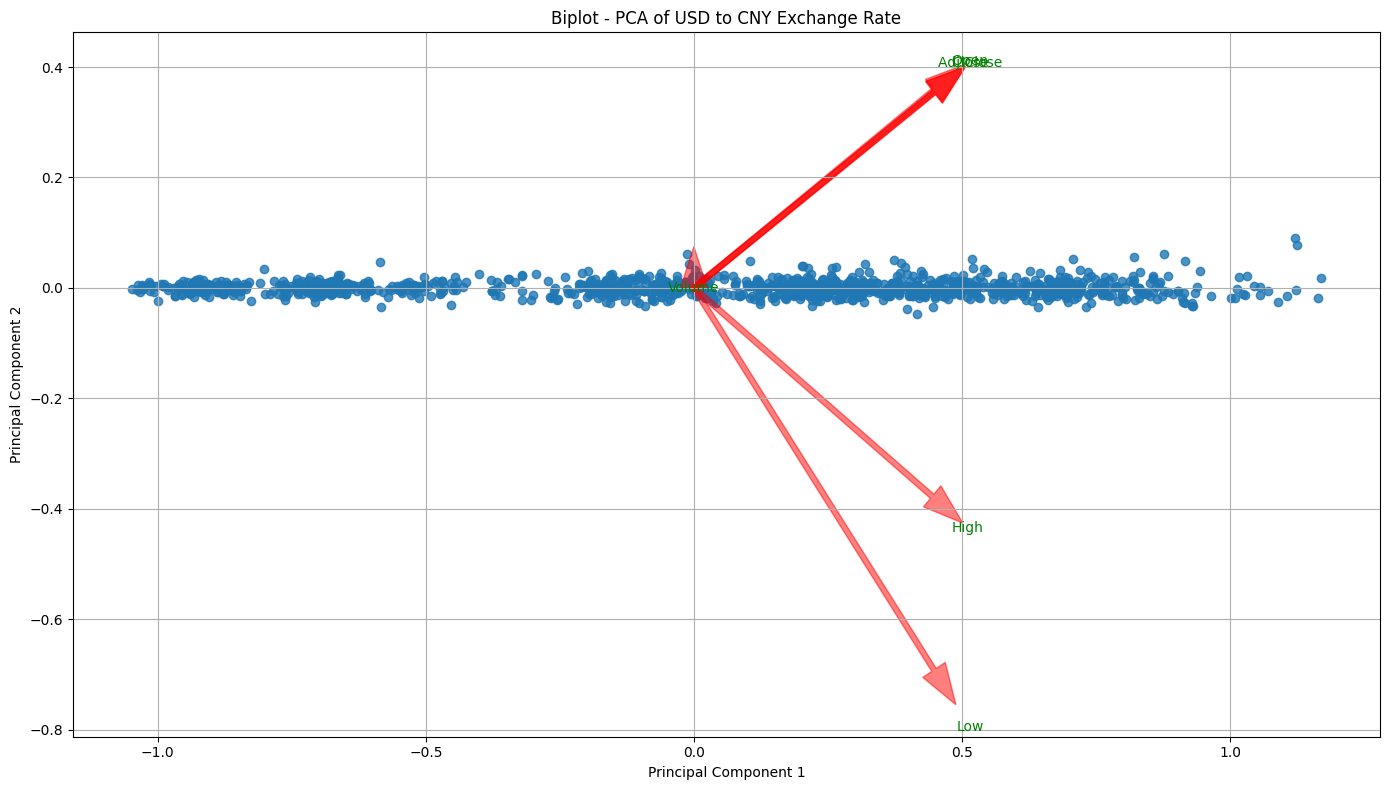

In [59]:
X = USD_CNY_Normalized.values
X_centered = X - np.mean(X, axis=0)
covariance_matrix = np.cov(X_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
num_components = 2
pca = PCA(n_components=num_components)
pca.fit(X_centered)
X_transformed = pca.transform(X_centered)
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(14, 8))
plt.bar(range(1, num_components + 1), explained_variance_ratio, align='center')
plt.xticks(range(1, num_components + 1))
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot - Variance Explained by Each Component')
plt.tight_layout()
plt.show()

loadings_df = pd.DataFrame(pca.components_.T,columns=['PC%s' % i for i in range(1, num_components + 1)],index=USD_CNY_Normalized.columns)

plt.figure(figsize=(14, 8))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot - PCA of USD to CNY Exchange Rate')
for i, feature in enumerate(USD_CNY_Normalized.columns):
    plt.arrow(0, 0, loadings_df.loc[feature, 'PC1'], loadings_df.loc[feature, 'PC2'], color='r', alpha=0.5,width=0.01, head_width=0.05)
    plt.text(loadings_df.loc[feature, 'PC1'] * 1.15, loadings_df.loc[feature, 'PC2'] * 1.15, feature, color='g',ha='center', va='center')
plt.grid()
plt.tight_layout()
plt.show()

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
قیمتهای بیتکوین
</div>

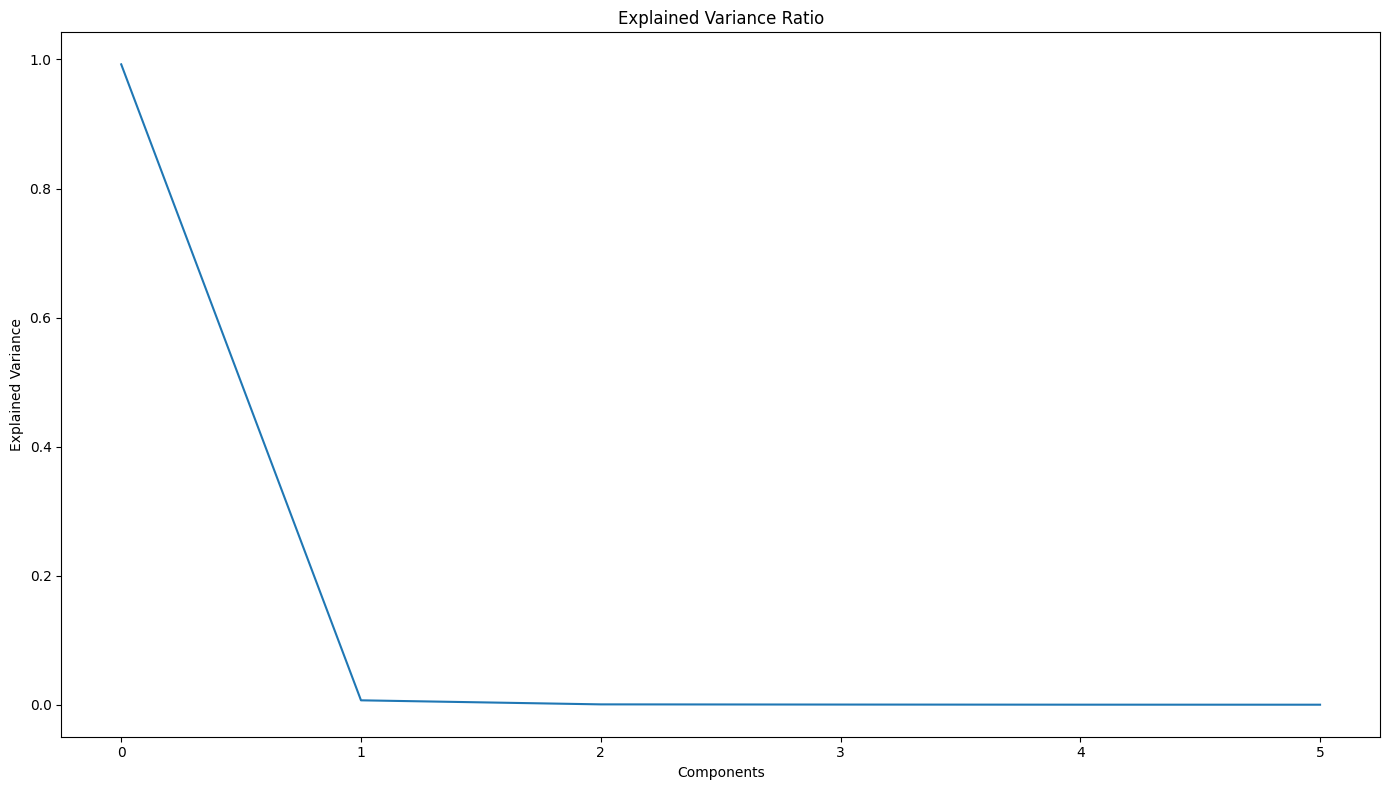

In [60]:
pca = PCA(n_components = BTC_Normalized.shape[1])
pca.fit(BTC_Normalized)
transformed_data = pca.transform(BTC_Normalized)
principal_components_df = pd.DataFrame(data=transformed_data,columns=['PC%s' % i for i in range(1, BTC_Normalized.shape[1] + 1)])
explained_variance_ratio = pca.explained_variance_ratio_
loadings_df = pd.DataFrame(pca.components_.T,columns=['PC%s' % i for i in range(1, BTC_Normalized.shape[1] + 1)],index=BTC_Normalized.columns)
plt.figure(figsize=(14, 8))
plt.plot(explained_variance_ratio)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.title('Explained Variance Ratio')
plt.tight_layout()
plt.show()

In [61]:
print("Principal Components:")
principal_components_df

Principal Components:


PC1     PC2     PC3     PC4     PC5     PC6
0    -0.5444 -0.0408 -0.0011  0.0052  0.0009 -0.0000
1    -0.5430 -0.0403  0.0014  0.0039 -0.0005 -0.0000
2    -0.5382 -0.0414 -0.0015  0.0068  0.0006 -0.0000
3    -0.5370 -0.0408  0.0021  0.0045  0.0003 -0.0000
4    -0.5357 -0.0422  0.0009  0.0057  0.0011 -0.0000
...      ...     ...     ...     ...     ...     ...
1822  0.2898 -0.0474  0.0027 -0.0045 -0.0023  0.0000
1823  0.2987 -0.0480 -0.0045 -0.0035  0.0014  0.0000
1824  0.2887 -0.0526  0.0082 -0.0036 -0.0019  0.0000
1825  0.2908 -0.0570 -0.0035 -0.0029  0.0018  0.0000
1826  0.2956 -0.0182  0.0003  0.0029  0.0006  0.0000

[1827 rows x 6 columns]

In [62]:
print("Loadings (Principal Components):")
loadings_df

Loadings (Principal Components):


PC1     PC2     PC3     PC4     PC5     PC6
Open      0.4472 -0.0036  0.7324  0.0196 -0.5130  0.0000
High      0.4507  0.0479  0.1874  0.5438  0.6810 -0.0000
Low       0.4413 -0.1078  0.0062 -0.8134  0.3632 -0.0000
Close     0.4471 -0.0221 -0.4624  0.1234 -0.2656  0.7071
Adj Close 0.4471 -0.0221 -0.4624  0.1234 -0.2656 -0.7071
Volume    0.0477  0.9925 -0.0263 -0.1090 -0.0071  0.0000

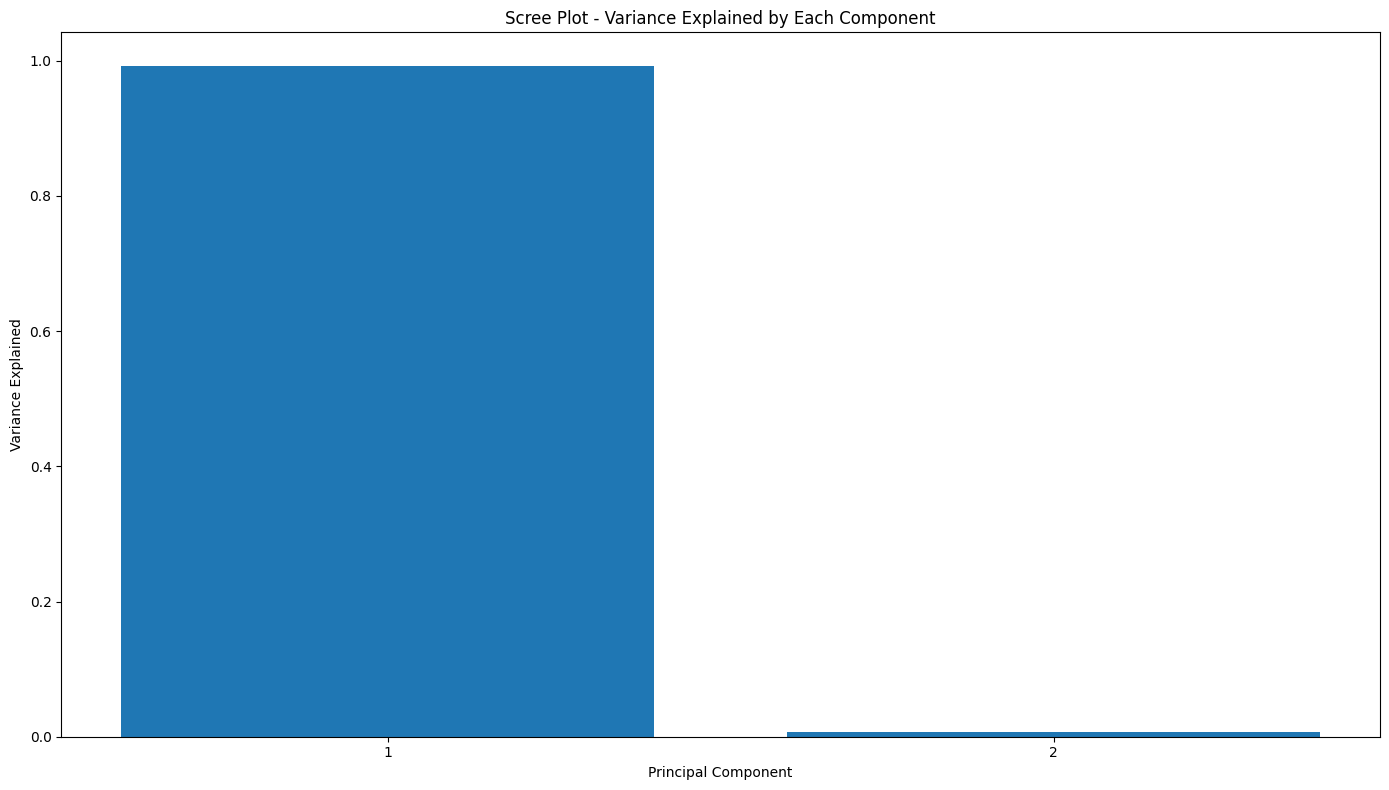

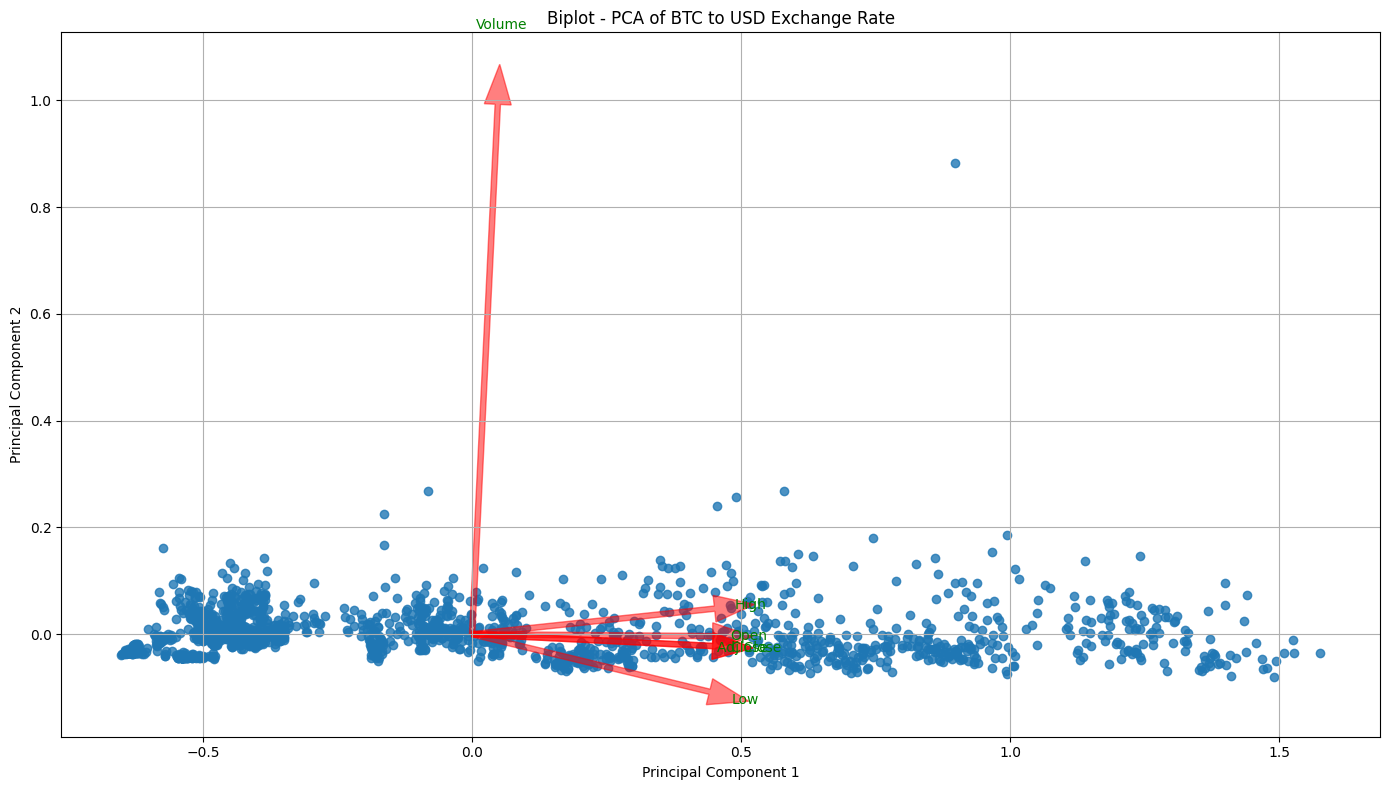

In [63]:
X = BTC_Normalized.values
X_centered = X - np.mean(X, axis=0)
covariance_matrix = np.cov(X_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
num_components = 2
pca = PCA(n_components=num_components)
pca.fit(X_centered)
X_transformed = pca.transform(X_centered)
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(14, 8))
plt.bar(range(1, num_components + 1), explained_variance_ratio, align='center')
plt.xticks(range(1, num_components + 1))
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot - Variance Explained by Each Component')
plt.tight_layout()
plt.show()

loadings_df = pd.DataFrame(pca.components_.T,columns=['PC%s' % i for i in range(1, num_components + 1)],index=BTC_Normalized.columns)

plt.figure(figsize=(14, 8))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot - PCA of BTC to USD Exchange Rate')
for i, feature in enumerate(BTC_Normalized.columns):
    plt.arrow(0, 0, loadings_df.loc[feature, 'PC1'], loadings_df.loc[feature, 'PC2'], color='r', alpha=0.5,width=0.01, head_width=0.05)
    plt.text(loadings_df.loc[feature, 'PC1'] * 1.15, loadings_df.loc[feature, 'PC2'] * 1.15, feature, color='g',ha='center', va='center')
plt.grid()
plt.tight_layout()
plt.show()

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
نرخ بهره‌برداری آمریکا
</div>

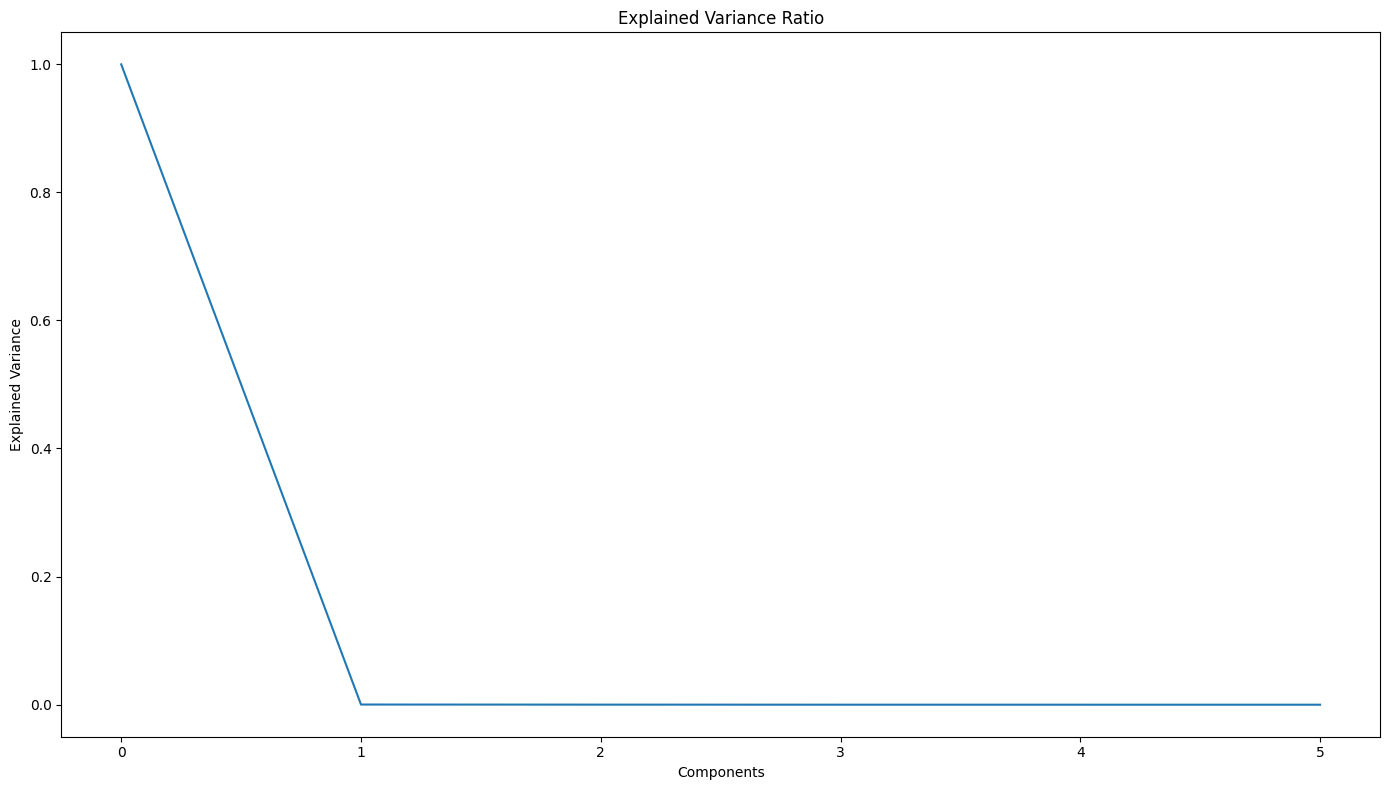

In [64]:
pca = PCA(n_components = US_INT_Normalized.shape[1])
pca.fit(US_INT_Normalized)
transformed_data = pca.transform(US_INT_Normalized)
principal_components_df = pd.DataFrame(data=transformed_data,columns=['PC%s' % i for i in range(1, US_INT_Normalized.shape[1] + 1)])
explained_variance_ratio = pca.explained_variance_ratio_
loadings_df = pd.DataFrame(pca.components_.T,columns=['PC%s' % i for i in range(1, US_INT_Normalized.shape[1] + 1)],index=US_INT_Normalized.columns)
plt.figure(figsize=(14, 8))
plt.plot(explained_variance_ratio)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.title('Explained Variance Ratio')
plt.tight_layout()
plt.show()

In [65]:
print("Principal Components:")
principal_components_df

Principal Components:


PC1     PC2     PC3     PC4     PC5    PC6
0    0.4216  0.0066 -0.0056  0.0009  0.0000 0.0000
1    0.4229 -0.0106 -0.0021 -0.0004  0.0000 0.0000
2    0.4164 -0.0046 -0.0038 -0.0023 -0.0000 0.0000
3    0.4068 -0.0008 -0.0076 -0.0018 -0.0000 0.0000
4    0.4251 -0.0021 -0.0097 -0.0016  0.0000 0.0000
...     ...     ...     ...     ...     ...    ...
1253 0.9293  0.0027 -0.0040 -0.0005 -0.0000 0.0000
1254 0.9487  0.0118 -0.0006 -0.0015  0.0000 0.0000
1255 0.9373 -0.0075 -0.0017  0.0035  0.0000 0.0000
1256 0.9906  0.0233  0.0044  0.0028  0.0000 0.0000
1257 1.0025 -0.0100 -0.0009 -0.0001  0.0000 0.0000

[1258 rows x 6 columns]

In [66]:
print("Loadings (Principal Components):")
loadings_df

Loadings (Principal Components):


PC1     PC2     PC3     PC4     PC5    PC6
Open      0.4395 -0.6952  0.1168 -0.5567 -0.0000 0.0000
High      0.4483 -0.0310  0.7103  0.5417  0.0000 0.0000
Low       0.4421 -0.2519 -0.6863  0.5196  0.0000 0.0000
Close     0.4530  0.4755 -0.0733 -0.2516  0.7071 0.0000
Adj Close 0.4530  0.4755 -0.0733 -0.2516 -0.7071 0.0000
Volume    0.0000 -0.0000 -0.0000 -0.0000 -0.0000 1.0000

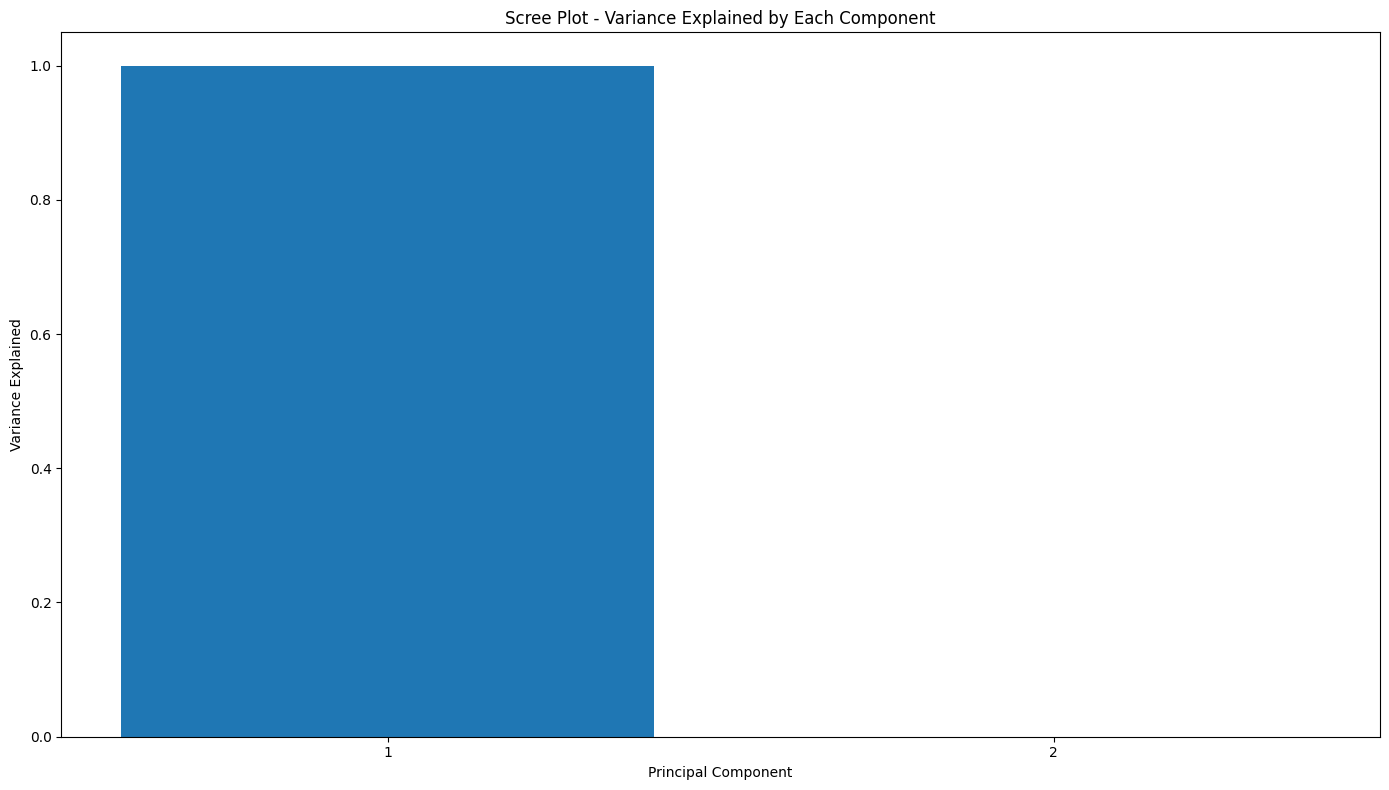

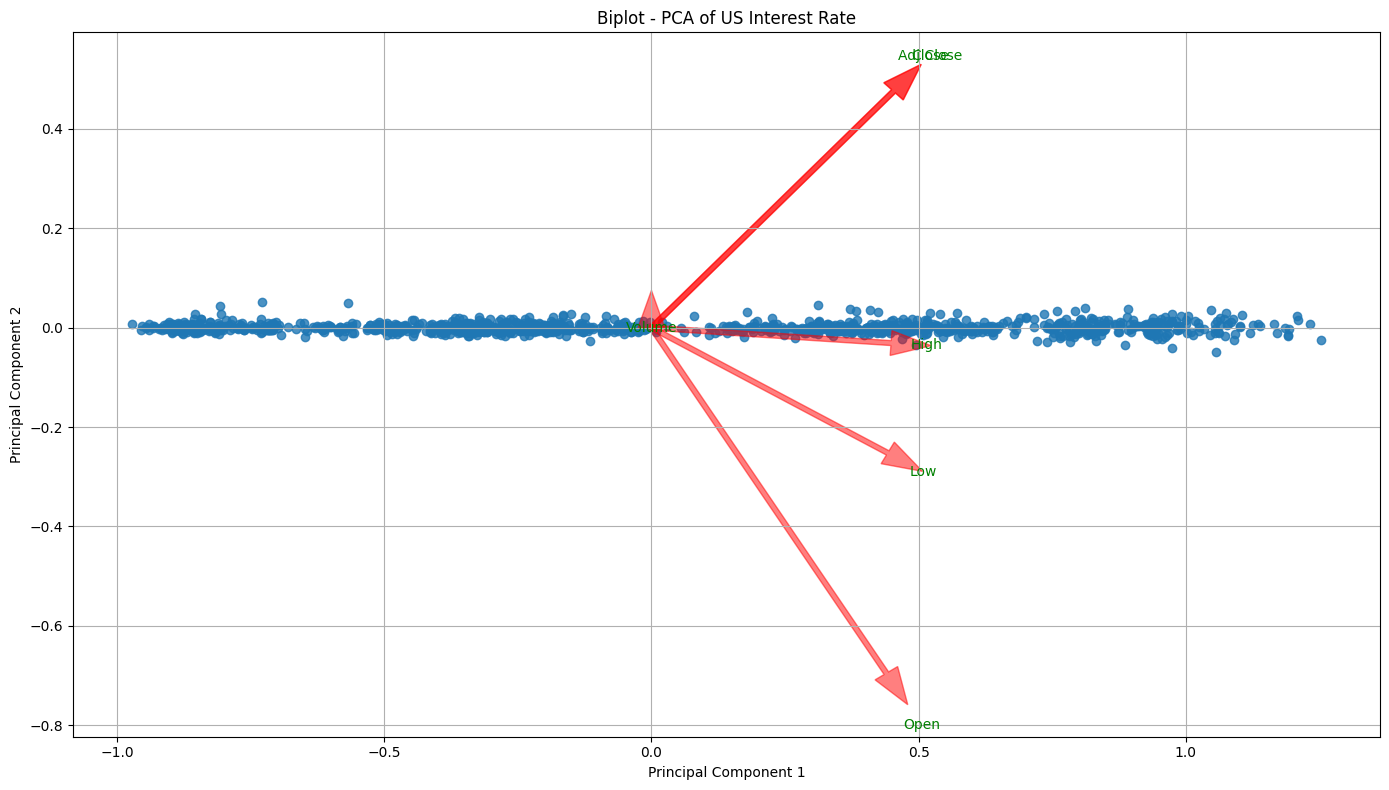

In [67]:
X = US_INT_Normalized.values
X_centered = X - np.mean(X, axis=0)
covariance_matrix = np.cov(X_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
num_components = 2
pca = PCA(n_components=num_components)
pca.fit(X_centered)
X_transformed = pca.transform(X_centered)
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(14, 8))
plt.bar(range(1, num_components + 1), explained_variance_ratio, align='center')
plt.xticks(range(1, num_components + 1))
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot - Variance Explained by Each Component')
plt.tight_layout()
plt.show()

loadings_df = pd.DataFrame(pca.components_.T,columns=['PC%s' % i for i in range(1, num_components + 1)],index=US_INT_Normalized.columns)

plt.figure(figsize=(14, 8))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot - PCA of US Interest Rate')
for i, feature in enumerate(US_INT_Normalized.columns):
    plt.arrow(0, 0, loadings_df.loc[feature, 'PC1'], loadings_df.loc[feature, 'PC2'], color='r', alpha=0.5,width=0.01, head_width=0.05)
    plt.text(loadings_df.loc[feature, 'PC1'] * 1.15, loadings_df.loc[feature, 'PC2'] * 1.15, feature, color='g',ha='center', va='center')
plt.grid()
plt.tight_layout()
plt.show()

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
طلا
</div>

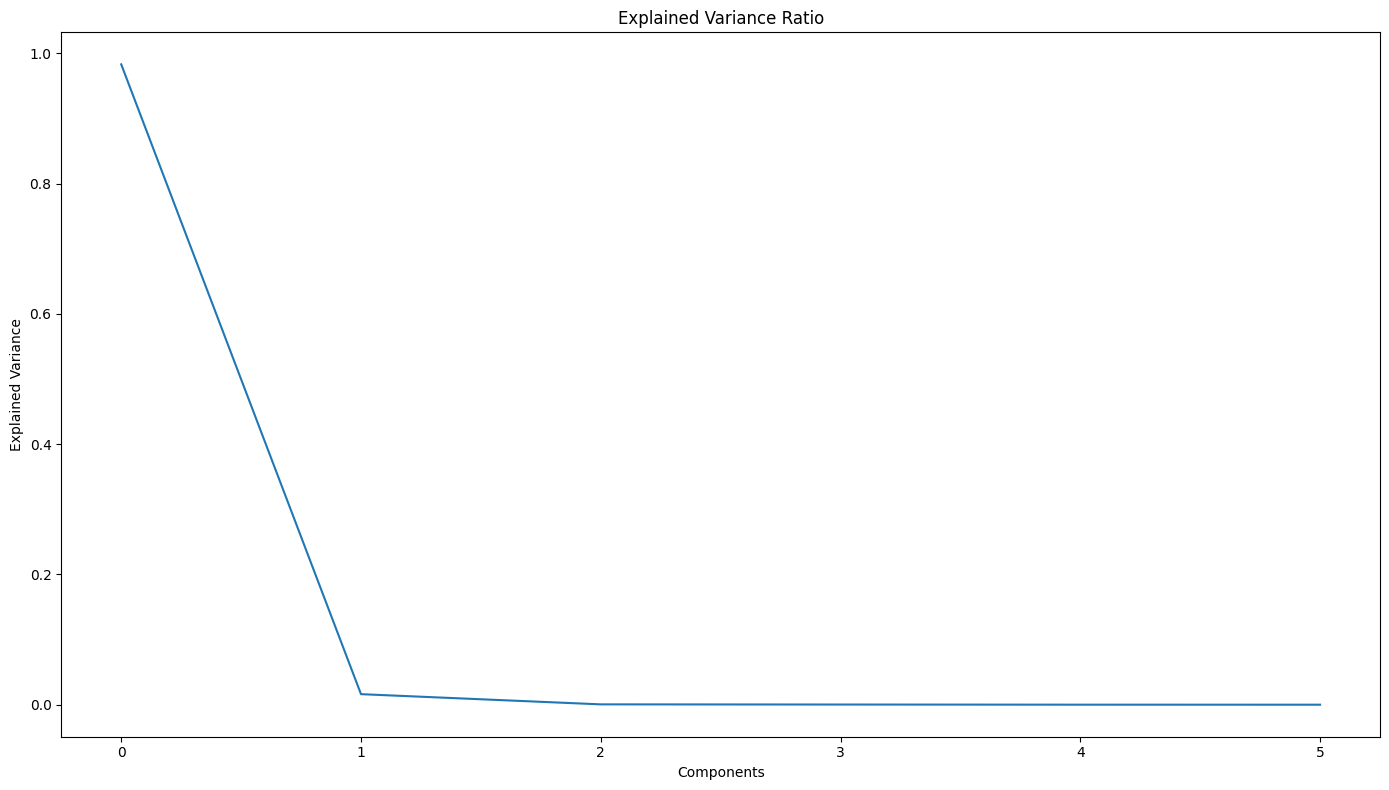

In [68]:
pca = PCA(n_components = Gold_Normalized.shape[1])
pca.fit(Gold_Normalized)
transformed_data = pca.transform(Gold_Normalized)
principal_components_df = pd.DataFrame(data=transformed_data,columns=['PC%s' % i for i in range(1, Gold_Normalized.shape[1] + 1)])
explained_variance_ratio = pca.explained_variance_ratio_
loadings_df = pd.DataFrame(pca.components_.T,columns=['PC%s' % i for i in range(1, Gold_Normalized.shape[1] + 1)],index=Gold_Normalized.columns)
plt.figure(figsize=(14, 8))
plt.plot(explained_variance_ratio)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.title('Explained Variance Ratio')
plt.tight_layout()
plt.show()

In [69]:
print("Principal Components:")
principal_components_df

Principal Components:


PC1     PC2     PC3     PC4     PC5     PC6
0     1.0764 -0.0184  0.0095 -0.0011 -0.0004  0.0000
1     1.0696 -0.0184 -0.0107  0.0100 -0.0006 -0.0000
2     1.0449 -0.0183 -0.0030 -0.0032  0.0011  0.0000
3     1.0486 -0.0182 -0.0005 -0.0060 -0.0001 -0.0000
4     1.0382 -0.0182 -0.0005 -0.0033 -0.0023  0.0000
...      ...     ...     ...     ...     ...     ...
1253 -0.6521 -0.0114 -0.0031 -0.0118 -0.0025 -0.0000
1254 -0.6404 -0.0117  0.0113 -0.0078 -0.0017 -0.0000
1255 -0.6217 -0.0099 -0.0040 -0.0163  0.0002 -0.0000
1256 -0.6061 -0.0111 -0.0017 -0.0022  0.0102 -0.0000
1257 -0.6274 -0.0106 -0.0123  0.0029  0.0053  0.0000

[1258 rows x 6 columns]

In [70]:
print("Loadings (Principal Components):")
loadings_df

Loadings (Principal Components):


PC1     PC2     PC3     PC4     PC5     PC6
Open      -0.4469  0.0003  0.7111 -0.1809  0.5118  0.0000
High      -0.4457 -0.0089  0.2805  0.6485 -0.5496  0.0000
Low       -0.4438  0.0121 -0.0808 -0.7185 -0.5293  0.0000
Close     -0.4498  0.0026 -0.4523  0.1231  0.2791  0.7071
Adj Close -0.4498  0.0026 -0.4523  0.1231  0.2791 -0.7071
Volume     0.0038  0.9999  0.0056  0.0139 -0.0001  0.0000

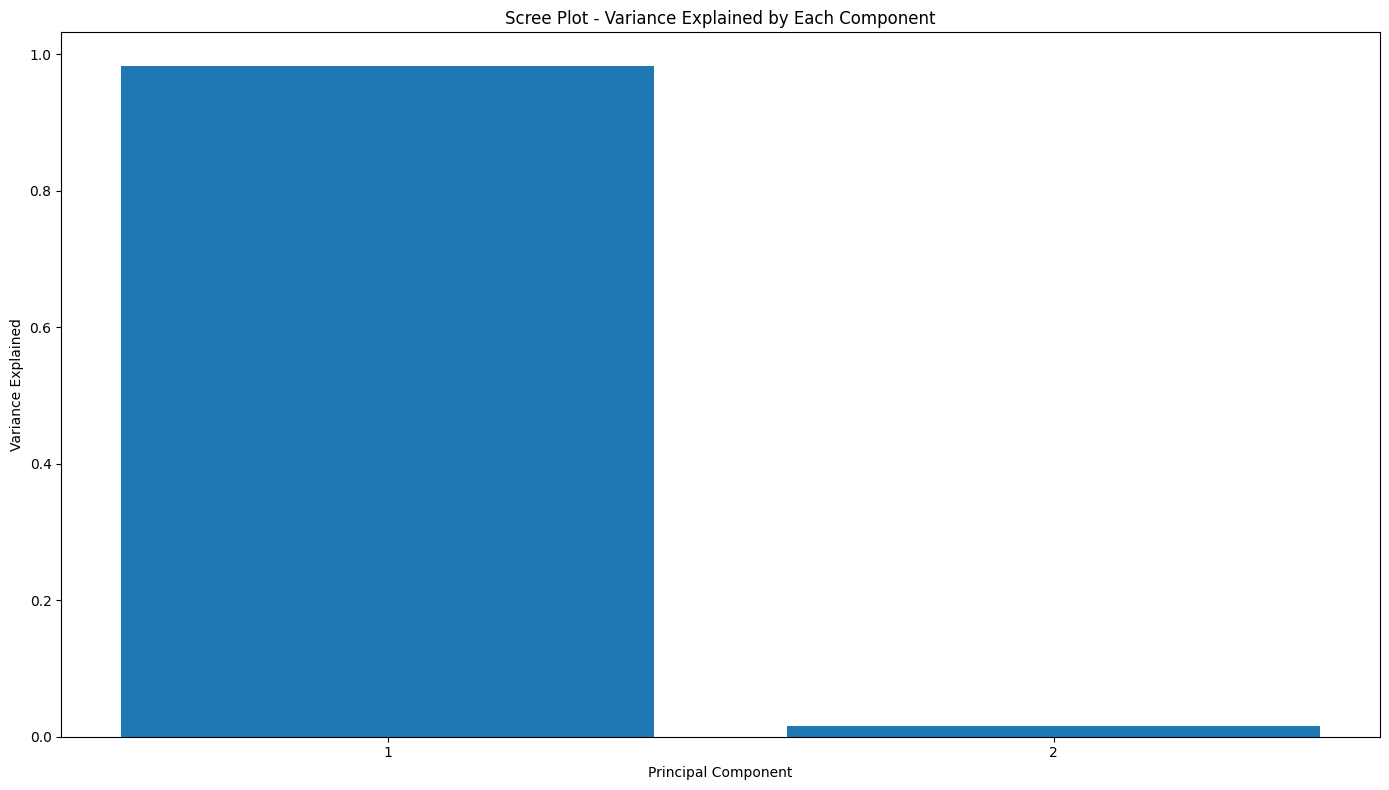

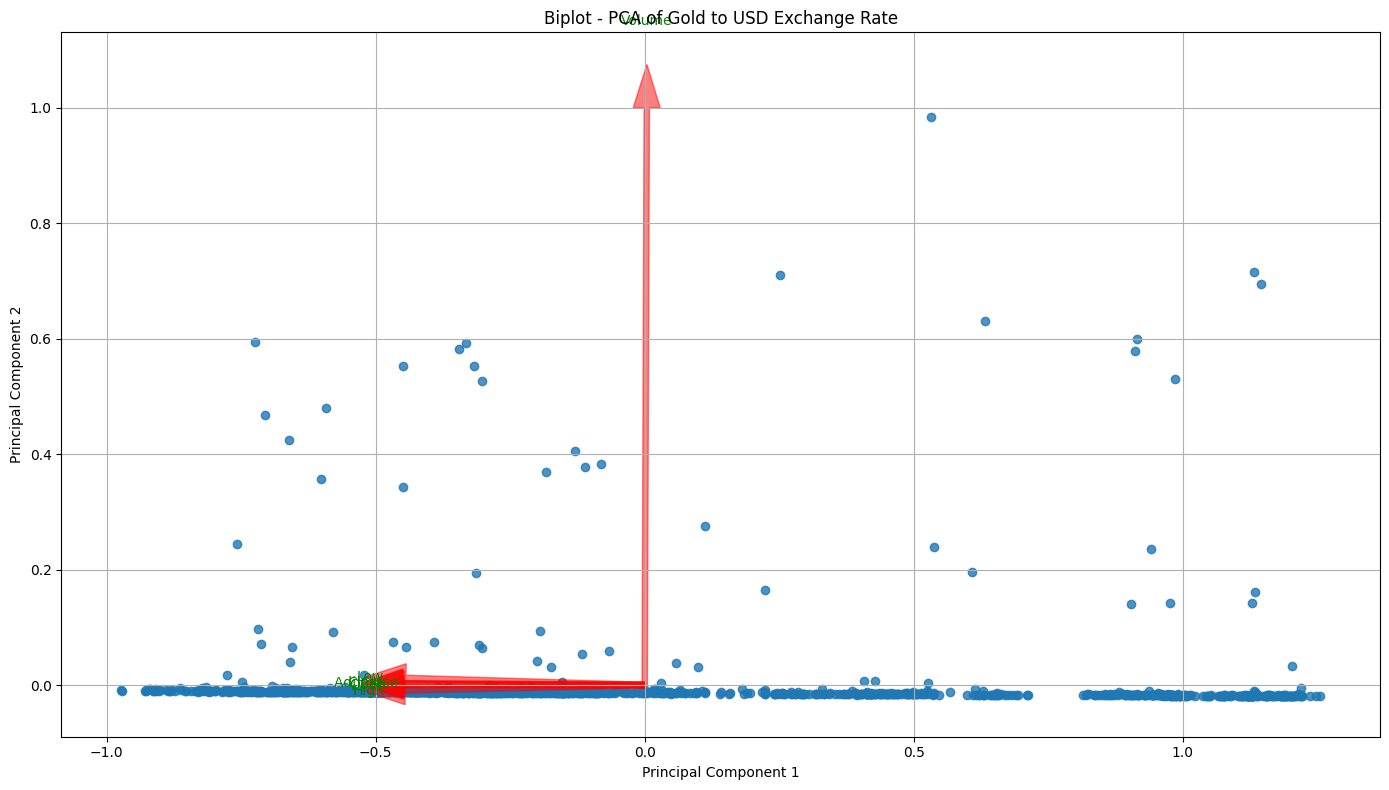

In [71]:
X = Gold_Normalized.values
X_centered = X - np.mean(X, axis=0)
covariance_matrix = np.cov(X_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
num_components = 2
pca = PCA(n_components=num_components)
pca.fit(X_centered)
X_transformed = pca.transform(X_centered)
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(14, 8))
plt.bar(range(1, num_components + 1), explained_variance_ratio, align='center')
plt.xticks(range(1, num_components + 1))
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot - Variance Explained by Each Component')
plt.tight_layout()
plt.show()

loadings_df = pd.DataFrame(pca.components_.T,columns=['PC%s' % i for i in range(1, num_components + 1)],index=Gold_Normalized.columns)

plt.figure(figsize=(14, 8))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot - PCA of Gold to USD Exchange Rate')
for i, feature in enumerate(Gold_Normalized.columns):
    plt.arrow(0, 0, loadings_df.loc[feature, 'PC1'], loadings_df.loc[feature, 'PC2'], color='r', alpha=0.5,width=0.01, head_width=0.05)
    plt.text(loadings_df.loc[feature, 'PC1'] * 1.15, loadings_df.loc[feature, 'PC2'] * 1.15, feature, color='g',ha='center', va='center')
plt.grid()
plt.tight_layout()
plt.show()

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
مس
</div>

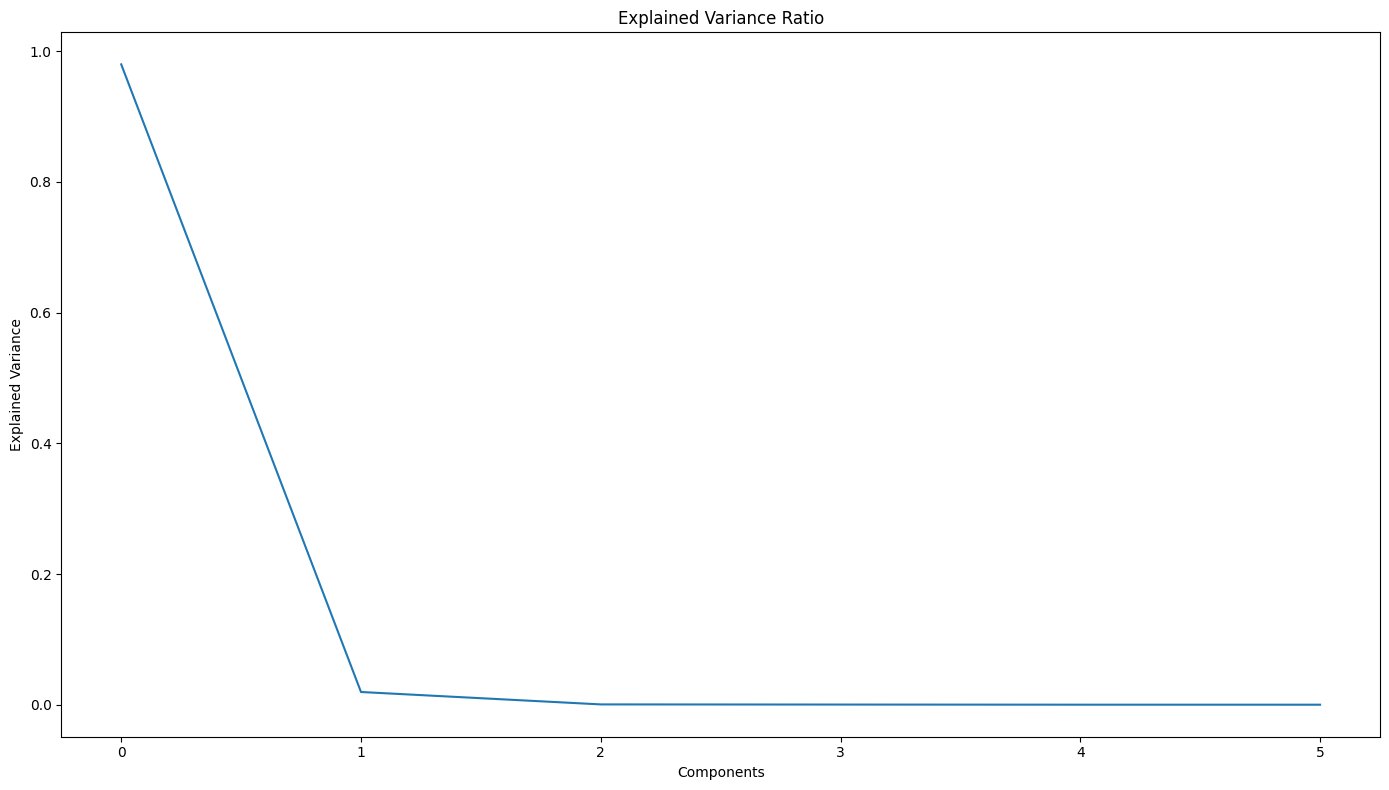

In [72]:
pca = PCA(n_components = Copper_Normalized.shape[1])
pca.fit(Copper_Normalized)
transformed_data = pca.transform(Copper_Normalized)
principal_components_df = pd.DataFrame(data=transformed_data,columns=['PC%s' % i for i in range(1, Copper_Normalized.shape[1] + 1)])
explained_variance_ratio = pca.explained_variance_ratio_
loadings_df = pd.DataFrame(pca.components_.T,columns=['PC%s' % i for i in range(1, Copper_Normalized.shape[1] + 1)],index=Copper_Normalized.columns)
plt.figure(figsize=(14, 8))
plt.plot(explained_variance_ratio)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.title('Explained Variance Ratio')
plt.tight_layout()
plt.show()

In [73]:
print("Principal Components:")
principal_components_df

Principal Components:


PC1     PC2     PC3     PC4     PC5     PC6
0    -0.3875  0.0010  0.0063  0.0019 -0.0033 -0.0000
1    -0.4034 -0.0043  0.0077  0.0009  0.0012 -0.0000
2    -0.4711 -0.0078  0.0136  0.0017  0.0005 -0.0000
3    -0.4883 -0.0144  0.0007 -0.0002 -0.0045 -0.0000
4    -0.4609 -0.0102  0.0032 -0.0033  0.0013 -0.0000
...      ...     ...     ...     ...     ...     ...
1253  0.3005 -0.0154  0.0104 -0.0044 -0.0000  0.0000
1254  0.2862 -0.0149 -0.0020 -0.0076  0.0032  0.0000
1255  0.2432  0.2725  0.0034 -0.0084 -0.0005 -0.0000
1256  0.2147  0.0303  0.0108  0.0023  0.0018  0.0000
1257  0.2351 -0.0080 -0.0174  0.0064  0.0020  0.0000

[1258 rows x 6 columns]

In [74]:
print("Loadings (Principal Components):")
loadings_df

Loadings (Principal Components):


PC1     PC2     PC3     PC4     PC5     PC6
Open       0.4482  0.0056  0.7337 -0.0398 -0.5091  0.0000
High       0.4396  0.0011  0.1662  0.6705  0.5741 -0.0000
Low        0.4543  0.0006  0.0308 -0.7353  0.5019  0.0000
Close      0.4469 -0.0034 -0.4653  0.0640 -0.2822 -0.7071
Adj Close  0.4469 -0.0034 -0.4653  0.0640 -0.2822  0.7071
Volume    -0.0002  1.0000 -0.0075  0.0004 -0.0000 -0.0000

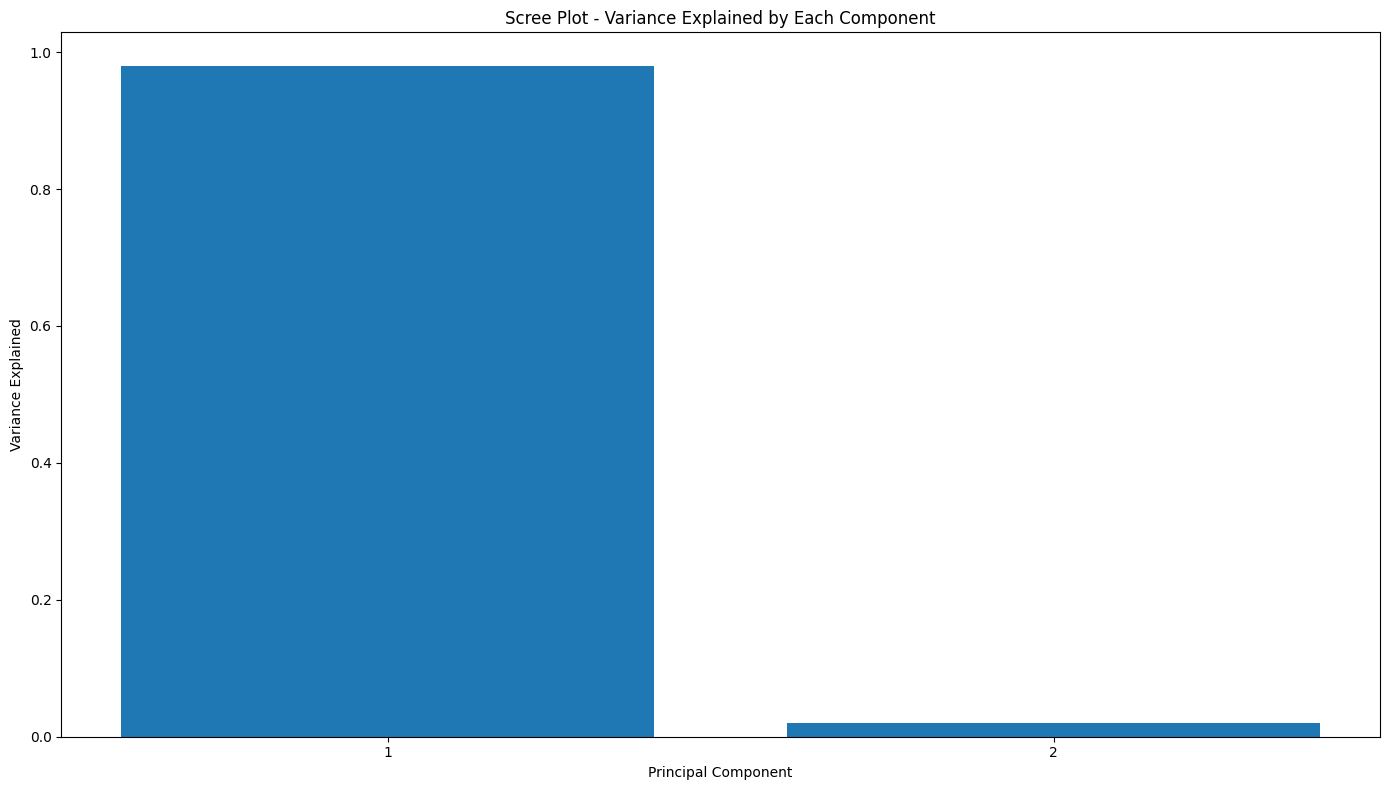

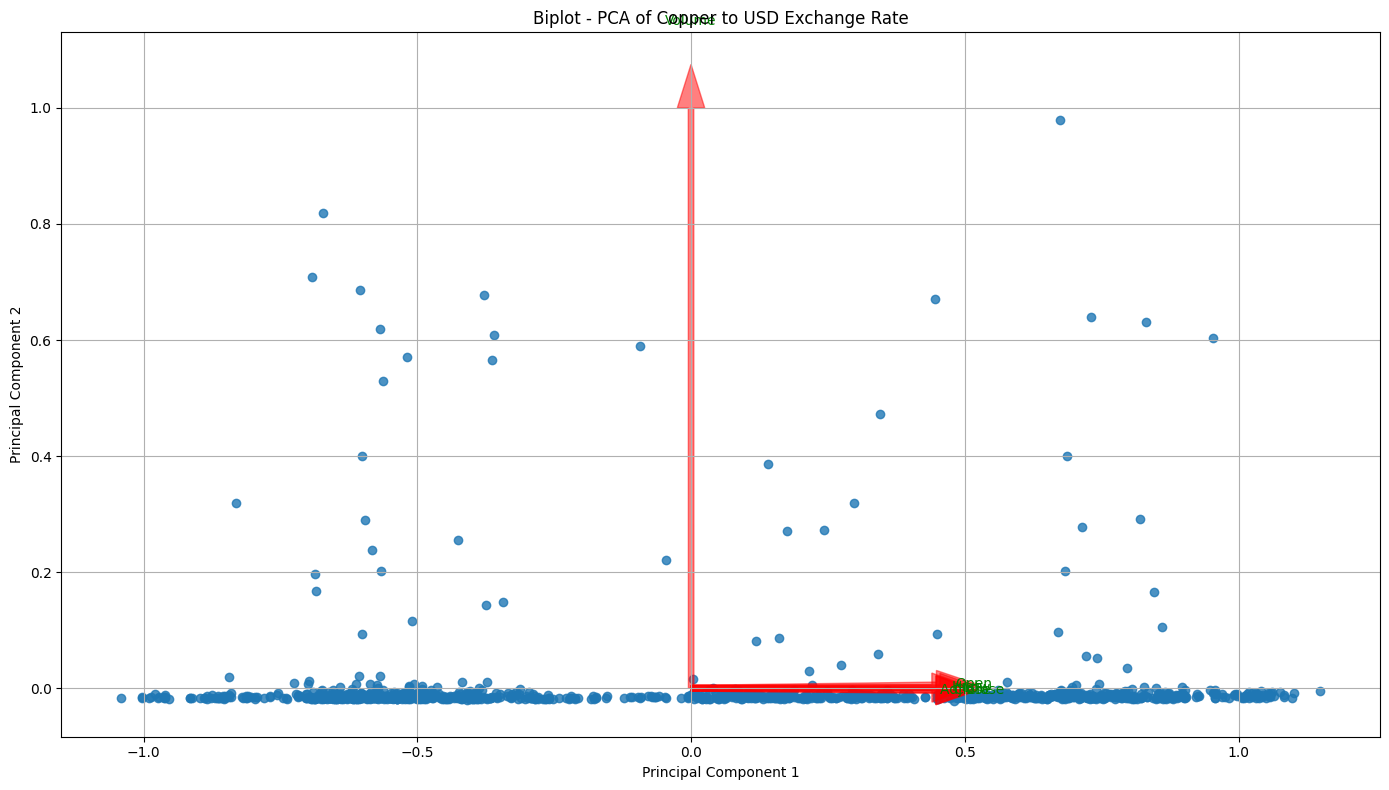

In [75]:
X = Copper_Normalized.values
X_centered = X - np.mean(X, axis=0)
covariance_matrix = np.cov(X_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
num_components = 2
pca = PCA(n_components=num_components)
pca.fit(X_centered)
X_transformed = pca.transform(X_centered)
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(14, 8))
plt.bar(range(1, num_components + 1), explained_variance_ratio, align='center')
plt.xticks(range(1, num_components + 1))
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot - Variance Explained by Each Component')
plt.tight_layout()
plt.show()

loadings_df = pd.DataFrame(pca.components_.T,columns=['PC%s' % i for i in range(1, num_components + 1)],index=Copper_Normalized.columns)

plt.figure(figsize=(14, 8))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot - PCA of Copper to USD Exchange Rate')
for i, feature in enumerate(Copper_Normalized.columns):
    plt.arrow(0, 0, loadings_df.loc[feature, 'PC1'], loadings_df.loc[feature, 'PC2'], color='r', alpha=0.5,width=0.01, head_width=0.05)
    plt.text(loadings_df.loc[feature, 'PC1'] * 1.15, loadings_df.loc[feature, 'PC2'] * 1.15, feature, color='g',ha='center', va='center')
plt.grid()
plt.tight_layout()
plt.show()

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
گندم
</div>

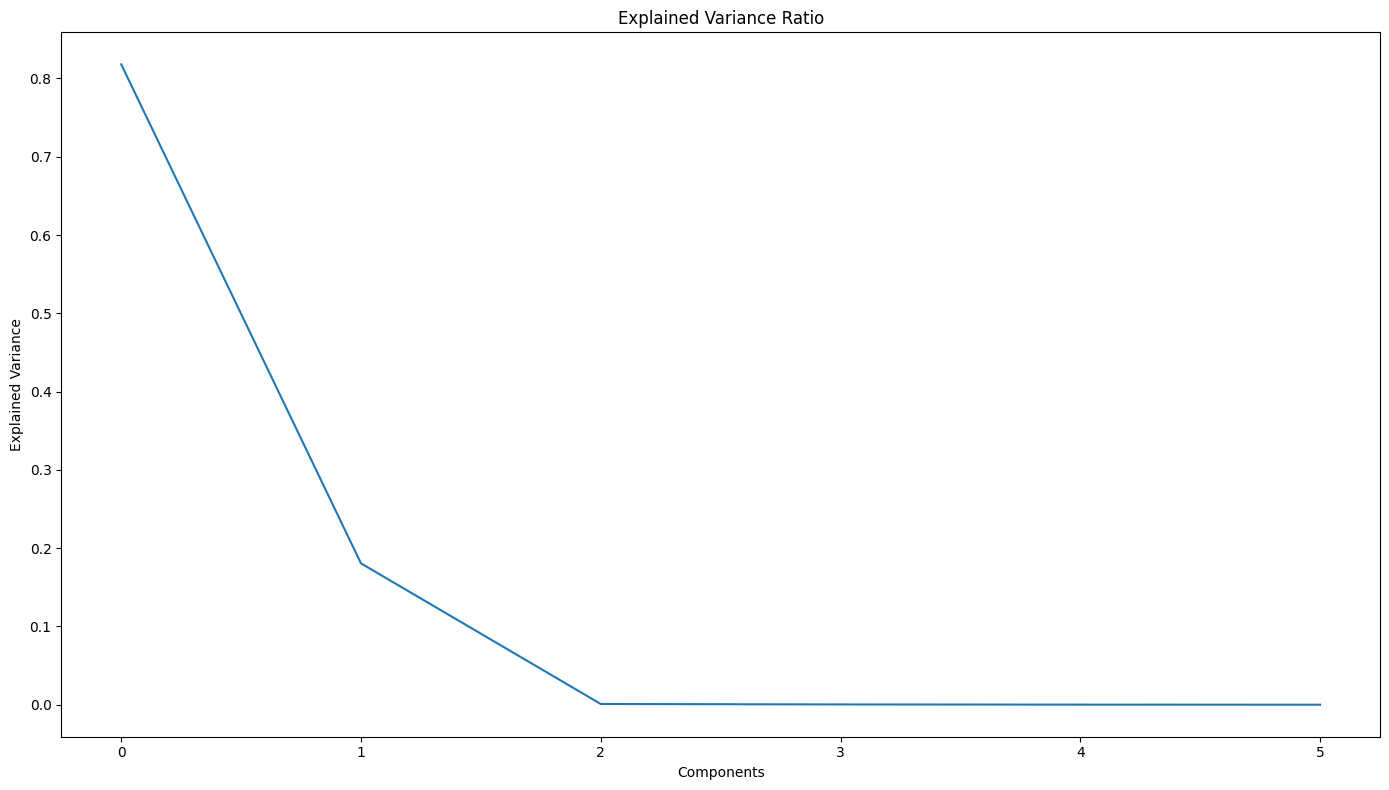

In [76]:
pca = PCA(n_components = Wheat_Normalized.shape[1])
pca.fit(Wheat_Normalized)
transformed_data = pca.transform(Wheat_Normalized)
principal_components_df = pd.DataFrame(data=transformed_data,columns=['PC%s' % i for i in range(1, Wheat_Normalized.shape[1] + 1)])
explained_variance_ratio = pca.explained_variance_ratio_
loadings_df = pd.DataFrame(pca.components_.T,columns=['PC%s' % i for i in range(1, Wheat_Normalized.shape[1] + 1)],index=Wheat_Normalized.columns)
plt.figure(figsize=(14, 8))
plt.plot(explained_variance_ratio)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.title('Explained Variance Ratio')
plt.tight_layout()
plt.show()

In [77]:
print("Principal Components:")
principal_components_df

Principal Components:


PC1     PC2     PC3     PC4     PC5     PC6
0    -0.3502 -0.3024 -0.0113  0.0180 -0.0032 -0.0000
1    -0.3512 -0.3078  0.0113  0.0050 -0.0021 -0.0000
2    -0.3095 -0.3034 -0.0015 -0.0006 -0.0004 -0.0000
3    -0.3051 -0.3030  0.0128  0.0030 -0.0005 -0.0000
4    -0.3041 -0.3036 -0.0000 -0.0006  0.0019  0.0000
...      ...     ...     ...     ...     ...     ...
1253  0.1947 -0.0368 -0.0082  0.0114 -0.0101 -0.0000
1254  0.1311 -0.1357 -0.0300  0.0230  0.0005 -0.0000
1255  0.0580 -0.1545 -0.0222  0.0191 -0.0035 -0.0000
1256  0.0299 -0.1919 -0.0022 -0.0026 -0.0032  0.0000
1257  0.0127 -0.2690 -0.0133  0.0124 -0.0047 -0.0000

[1258 rows x 6 columns]

In [78]:
print("Loadings (Principal Components):")
loadings_df

Loadings (Principal Components):


PC1    PC2     PC3     PC4     PC5     PC6
Open       0.4672 0.0373 -0.6959  0.1587  0.5205  0.0000
High       0.4393 0.0434  0.0056  0.6718 -0.5948 -0.0000
Low        0.4663 0.0327 -0.2011 -0.7213 -0.4698  0.0000
Close      0.4268 0.0374  0.4874 -0.0394  0.2780 -0.7071
Adj Close  0.4268 0.0374  0.4874 -0.0394  0.2780  0.7071
Volume    -0.0839 0.9964 -0.0042 -0.0086  0.0010 -0.0000

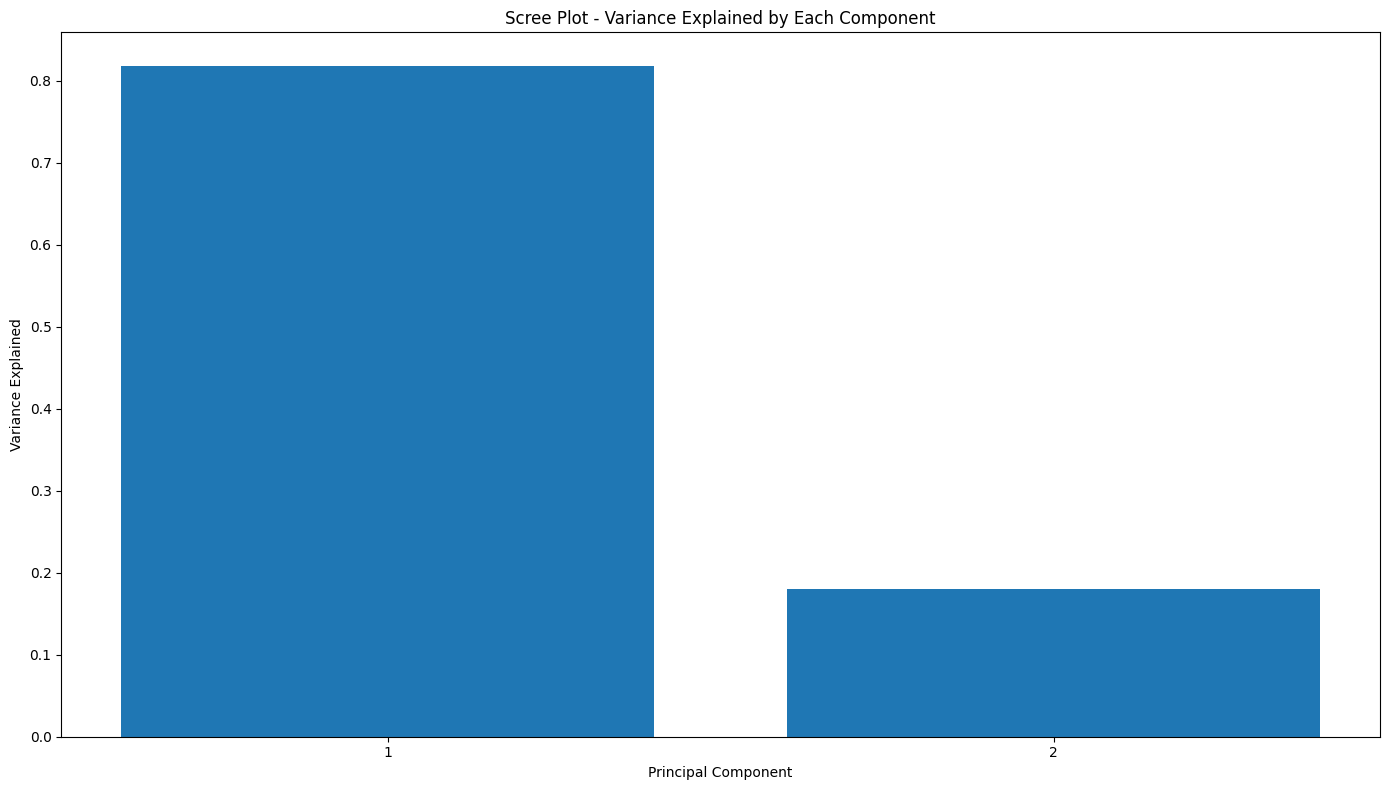

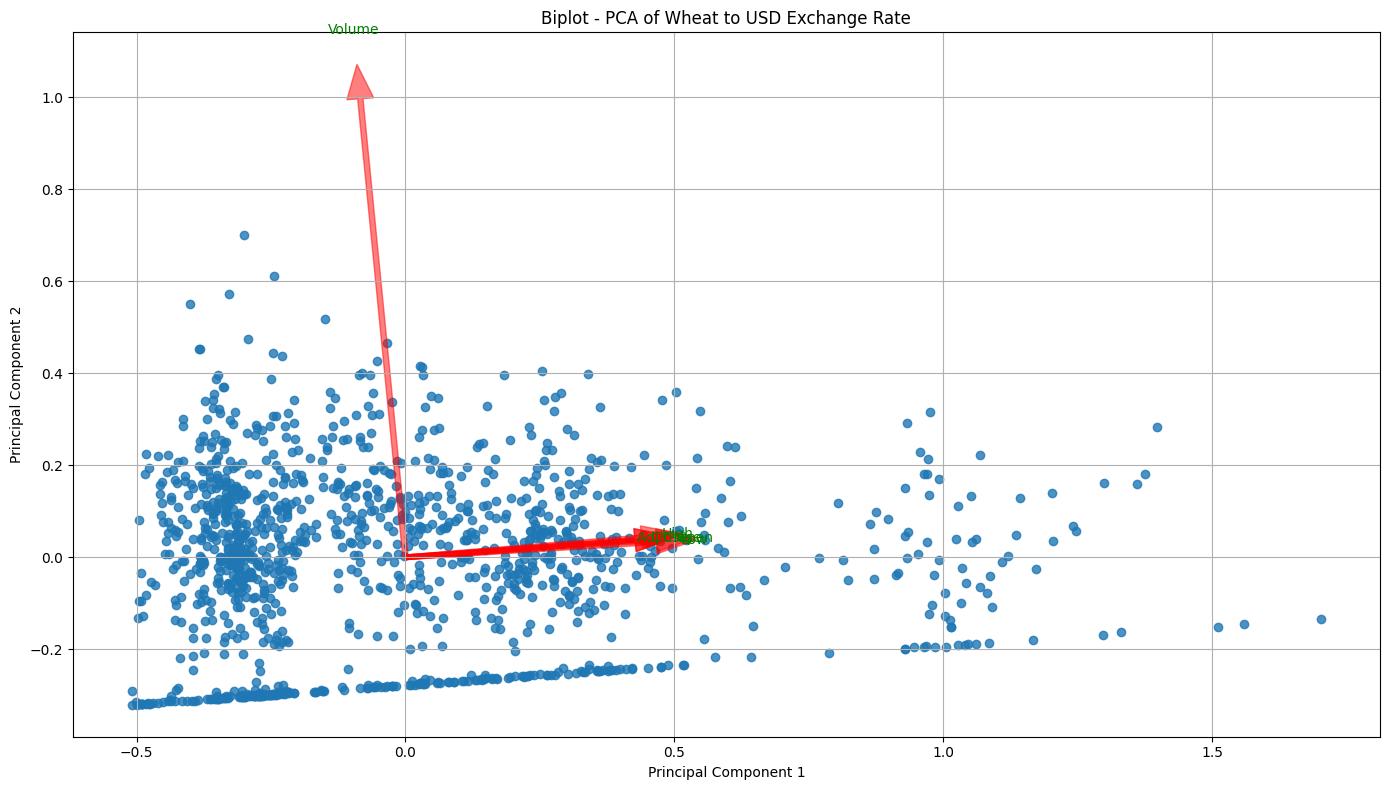

In [79]:
X = Wheat_Normalized.values
X_centered = X - np.mean(X, axis=0)
covariance_matrix = np.cov(X_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
num_components = 2
pca = PCA(n_components=num_components)
pca.fit(X_centered)
X_transformed = pca.transform(X_centered)
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(14, 8))
plt.bar(range(1, num_components + 1), explained_variance_ratio, align='center')
plt.xticks(range(1, num_components + 1))
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot - Variance Explained by Each Component')
plt.tight_layout()
plt.show()

loadings_df = pd.DataFrame(pca.components_.T,columns=['PC%s' % i for i in range(1, num_components + 1)],index=Wheat_Normalized.columns)

plt.figure(figsize=(14, 8))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot - PCA of Wheat to USD Exchange Rate')
for i, feature in enumerate(Wheat_Normalized.columns):
    plt.arrow(0, 0, loadings_df.loc[feature, 'PC1'], loadings_df.loc[feature, 'PC2'], color='r', alpha=0.5,width=0.01, head_width=0.05)
    plt.text(loadings_df.loc[feature, 'PC1'] * 1.15, loadings_df.loc[feature, 'PC2'] * 1.15, feature, color='g',ha='center', va='center')
plt.grid()
plt.tight_layout()
plt.show()

<div style = "font-family: yekan ; font-size : 26px ; direction : rtl"><b>
بخش دوم (بهینه‌سازی برنامه‌ریزی تولید چند دوره‌ای با استفاده از
    Linear Programming)</b></div>

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
    <li>جمع آوری داده‌ها:</li>

</ul>

</div>


<img src="pic1.jpg" width="700" height="500">

<img src="pic2.jpg" width="700" height="500">

<img src="pic3.jpg" width="700" height="500">

<img src="pic4.jpg" width="700" height="500">

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
    <li>تعریف متغیرها:</li>

</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
    <ul>
        <li>t1 :  مدت زمان برای ساخت محصول یک در دوره اول</li>
        <li>t2 :  مدت زمان برای ساخت محصول یک در دوره دوم</li>
        <li>t3 :  مدت زمان برای ساخت محصول دو در دوره اول</li>
        <li>t4 :  مدت زمان برای ساخت محصول دو در دوره دوم</li>
        <li>t5 :  مدت زمان برای ساخت محصول سه در دوره اول</li>
        <li>t6 :  مدت زمان برای ساخت محصول سه در دوره دوم</li>
        <br>
        <li>w1 : نیروی کار برای ساخت محصول یک</li>
        <li>w2 : نیروی کار برای ساخت محصول دو</li>
        <li>w3 : نیروی کار برای ساخت محصول سه</li>
        <br>
        <li>v1 : حجم ذخیره‌سازی محصول یک</li>
        <li>v2 : حجم ذخیره‌سازی محصول دو</li>
        <li>v3 : حجم ذخیره‌سازی محصول سه</li>
        <br>
        <li>p1 : سود حاصل از محصول یک</li>
        <li>p2 : سود حاصل از محصول دو</li>
        <li>p3 : سود حاصل از محصول سه</li>
        <br>
        <li>T1 : محدودیت زمانی دستگاه یک در دوره یک</li>
        <li>T2 : محدودیت زمانی دستگاه یک در دوره دو</li>
        <li>T3 : محدودیت زمانی دستگاه دو در دوره یک</li>
        <li>T4 : محدودیت زمانی دستگاه دو در دوره دو</li>
        <br>
        <li>W1 : محدودیت کارگر در دوره یک</li>
        <li>W2 : محدودیت کارگر در دوره دو</li>
        <br>
        <li>V1 : محدودیت انبار در مجموع دو دوره</li>
        <br>
        <li>D1 : مقدار تقاضای محصول یک در دوره یک</li>
        <li>D2 : مقدار تقاضای محصول یک در دوره دو</li>
        <li>D3 : مقدار تقاضای محصول دو در دوره یک</li>
        <li>D4 : مقدار تقاضای محصول دو در دوره دو</li>
        <li>D5 : مقدار تقاضای محصول سه در دوره یک</li>
        <li>D6 : مقدار تقاضای محصول سه در دوره دو</li>
        <br>
        <li>S1 : مقدار موجودی محصول یک در دوره یک</li>
        <li>S2 : مقدار موجودی محصول یک در دوره دو</li>
        <li>S3 : مقدار موجودی محصول دو در دوره یک</li>
        <li>S4 : مقدار موجودی محصول دو در دوره دو</li>
        <li>S5 : مقدار موجودی محصول سه در دوره یک</li>
        <li>S6 : مقدار موجودی محصول سه در دوره دو</li>
    </ul>
</div>

<img src="pic6.jpg" width="500" height="500">


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
با توجه به داده هایی که در بخش اول جمع آوری شد داریم:
</div>

In [80]:
t1 = 63
t2 = 54
t3 = 68
t4 = 55
t5 = 68
t6 = 50

w1 = 4
w2 = 5
w3 = 4

v1 = 3.6
v2 = 3.8
v3 = 3.5

p1 = 785000
p2 = 809000
p3 = 765000

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
    <li>فرمول بندی مدل:</li>

</ul>

</div>


<img src="pic7.jpg" width="700" height="500">

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
این مدل طوری فرمول بندی شده است که همواره مقدار تولید محصول کمتر مساوی اختلاف مقدار تقاضا و موجودی باشد تا هم کالا‌های موجود به فروش برسند و هم تولید بیش از حد<br> سبب افت قیمت محصول نشود.
</div>

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
    <li>متغیرهای تصمیم (هدف):</li>

</ul>

</div>


<img src="pic5.jpg" width="700" height="500">

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
 در این مسئله متغیرهای X111, X112, X121, X122, X211, X212, X221, X222, X311, X312, X321, X322 متغیرهای هدف ما هستند که هرکدام نماینده مقدار تولید یک محصول با یک ماشین در دوره مختلف است. 
</div>

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
    <li>تابع هدف:</li>

</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : ltr">
P = p1(X111 + X112 + X121 + X122) + p2(X211 + X212 + X221 + X222) + p3(X311 + X312 + X321 + X322)
</div>
<br>
<div style = "font-family: yekan ; font-size : 16px ; direction : rtl"> P تابع هدف مسئله است که برابر با سود حاصل از فروش محصولات است و ما به دنبال بیشینه کردن آن هستیم.
</div>

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
    <li>محدودیت ها:</li>

</ul>

</div>


In [81]:
T1 = 16 * 60 * 25
T2 = 17.5 * 60 * 25 * 4
T3 = 17 * 60 * 25
T4 = 18 * 60 * 25 * 4

W1 = 8
W2 = 10

V1 = 18200

D1 = 400
D2 = 1500
D3 = 380
D4 = 1435
D5 = 420
D6 = 1535

S1 = 50
S2 = 32
S3 = 0
S4 = 28
S5 = 12
S6 = 44

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
    <li>پیاده سازی:</li>

</ul>

</div>


In [82]:
c = [-p1, -p1, -p1, -p1, -p2, -p2, -p2, -p2, -p3, -p3, -p3, -p3]

A_ub = [[w1*t1, 0, 0, 0, w2*t3, 0, 0, 0, w3*t5, 0, 0, 0],
        [0, w1*t1, 0, 0, 0, w2*t3, 0, 0, 0, w3*t5, 0, 0],
        [0, 0, w1*t2, 0, 0, 0, w2*t4, 0, 0, 0, w3*t5, 0],
        [0, 0, 0, w1*t2, 0, 0, 0, w2*t4, 0, 0, 0, w3*t5],
        [v1, v1, v1, v1, v2, v2, v2, v2, v3, v3, v3, v3],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]]

b_ub = [W1*T1 , W2*T1 , W1*T2 , W2*T2 , V1 , D1 - S1, D2 - S2, D3 - S3, D4 - S4, D5 - S5, D6 - S6]

result = linprog(c, A_ub = A_ub, b_ub = b_ub, method='highs')

variables = ['X111', 'X112', 'X121', 'X122', 'X211', 'X212', 'X221', 'X222', 'X311', 'X312', 'X321', 'X322']
if result.success:
    max_P = int(-result.fun)
    X_values = result.x
    print("max P:", max_P)
    print("\nvariables:")
    print("\nFirst period:")
    for i in range(len(variables)):
        if i%2 == 0 :
            print(f"{variables[i]}: {int(X_values[i])}")
    print("\nSecond period:")
    for i in range(len(variables)):
        if i%2 == 1 :
            print(f"{variables[i]}: {int(X_values[i])}")
else:
    print("The constraints are contradictory.")

max P: 3946190868

variables:

First period:
X111: 0
X121: 350
X211: 238
X221: 0
X311: 408
X321: 0

Second period:
X112: 952
X122: 515
X212: 0
X222: 1079
X312: 0
X322: 1491


<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
    <li>تجزیه و تحلیل راه حل:</li>

</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">طبق بهینه سازی انجام شده
برای دوره اول از محصول یک باید 350 عدد تولید شود زیرا 50 عدد موجودی آن است و جمعا 400 تقاضا داریم از محصول دو 238 عدد تولید می‌کنیم و با اینکه موجودی آن صفر است تولید بیش از این اندازه از این محصول بهینه نیست بااینکه این مقدار کمتر از تقاضای این محصول است و از محصول سه 408 عدد تولید می‌کنیم که با 12 تا موجودی آن مقدار مورد تقاضا تامین می‌شود</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
برای دوره دوم از محصول یک 1467 تا تولید می‌کنیم و بعلاوه 32 موجودی آن جمعا 1499 تا از آن داریم که یک واحد کمتر از مقدار تقاضای آن است ، از محصول دو 1079 عدد تولید می‌کنیم که با موجودی 28 تایی آن جمعا 1107 تا از این محصول را داریم که 328 تا از تقاضای آن کمتر است اما تولید بیش از اندازه این محصول با توجه به محدودیت‌های مسئله بهینه نیست و از محصول سه 1491 عدد تولید می‌کنیم که با موجودی 44 تایی آن کل میزان تقاضا را پوشش می‌دهد.
</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">با توجه به مقدار محصولات تولید شده در این دو دوره و سود حاصل از هرکدام مقدار بیشینه سود در مجموع این دو دوره برابر است با :</div>

In [83]:
t1 = 63
t2 = 54
t3 = 68
t4 = 55
t5 = 68
t6 = 50

w1 = 4
w2 = 5
w3 = 4

v1 = 3.6
v2 = 3.8
v3 = 4

p1 = 785000
p2 = 809000
p3 = 765000

T1 = 16 * 60 * 25
T2 = 17.5 * 60 * 25 * 4
T3 = 17 * 60 * 25
T4 = 18 * 60 * 25 * 4

W1 = 8
W2 = 10

V1 = 18200

D1 = 400
D2 = 1500
D3 = 380
D4 = 1435
D5 = 420
D6 = 1535

S1 = 50
S2 = 32
S3 = 0
S4 = 28
S5 = 12
S6 = 44

<div style = "font-family: yekan ; font-size : 16px ; direction : ltr"><b>3 , 946 , 190 , 868 t</b><br></div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl"> سه میلیارد و نهصد و چهل شیش میلیون و صد و نود هزار تومان</div>

<div style = "font-family: yekan ; font-size : 18px ; direction : rtl; color : #9900CC">
<ul>
    <li>تجزیه و تحلیل سناریو:</li>

</ul>

</div>


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">تغییرات پارامتر‌های دردسترس بودن ماشین:</div>

In [84]:
T1 = 15 * 60 * 25
T2 = 14.5 * 60 * 25 * 4
T3 = 12.5 * 60 * 25
T4 = 15 * 60 * 25 * 4

In [85]:
c = [-p1, -p1, -p1, -p1, -p2, -p2, -p2, -p2, -p3, -p3, -p3, -p3]

A_ub = [[w1*t1, 0, 0, 0, w2*t3, 0, 0, 0, w3*t5, 0, 0, 0],
        [0, w1*t1, 0, 0, 0, w2*t3, 0, 0, 0, w3*t5, 0, 0],
        [0, 0, w1*t2, 0, 0, 0, w2*t4, 0, 0, 0, w3*t5, 0],
        [0, 0, 0, w1*t2, 0, 0, 0, w2*t4, 0, 0, 0, w3*t5],
        [v1, v1, v1, v1, v2, v2, v2, v2, v3, v3, v3, v3],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]]

b_ub = [W1*T1 , W2*T1 , W1*T2 , W2*T2 , V1 , D1 - S1, D2 - S2, D3 - S3, D4 - S4, D5 - S5, D6 - S6]

result = linprog(c, A_ub = A_ub, b_ub = b_ub, method='highs')

variables = ['X111', 'X112', 'X121', 'X122', 'X211', 'X212', 'X221', 'X222', 'X311', 'X312', 'X321', 'X322']
if result.success:
    max_P = int(-result.fun)
    X_values = result.x
    print("max P:", max_P)
    print("\nvariables:")
    print("\nFirst period:")
    for i in range(len(variables)):
        if i%2 == 0 :
            print(f"{variables[i]}: {int(X_values[i])}")
    print("\nSecond period:")
    for i in range(len(variables)):
        if i%2 == 1 :
            print(f"{variables[i]}: {int(X_values[i])}")
else:
    print("The constraints are contradictory.")

max P: 3803167750

variables:

First period:
X111: 0
X121: 350
X211: 203
X221: 176
X311: 408
X321: 0

Second period:
X112: 892
X122: 575
X212: 0
X222: 1407
X312: 0
X322: 808


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
ساعت در دسترس بودن ماشین‌ها را به این ترتیب کاهش دادیم:
    <ul>
        <li>ماشین یک دوره یک : یک ساعت کاهش در روز</li>
        <li>ماشین یک دوره دو : سه ساعت کاهش در روز</li>
        <li>ماشین دو دوره یک : چهار ساعت و نیم کاهش در روز</li>
        <li>ماشین دو دوره دو : سه ساعت کاهش در روز</li>
    </ul>
که در نهایت سبب کاهش تولید محصولات شد و سود کل در اثر این تغییر 900 میلیون کاهش یافت
</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
تغییر تعداد محصول تولید شده در دوره یک:
    <ul>
        <li>محصول یک : بدون تغییر</li>
        <li>محصول دو : افزایش 141 واحدی</li>
        <li>محصول سه : بدون تغییر</li>
    </ul>
تغییر تعداد محصول تولید شده در دوره دو:
    <ul>
        <li>محصول یک : کاهش 31 واحدی</li>
        <li>محصول دو : کاهش 334 واحدی</li>
        <li>محصول سه : کاهش 995 واحدی</li>
    </ul>
</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">تغییرات پارامتر‌های دردسترس بودن نیروی کار:</div>

In [86]:
T1 = 16 * 60 * 25
T2 = 17.5 * 60 * 25 * 4
T3 = 17 * 60 * 25
T4 = 18 * 60 * 25 * 4

W1 = 7
W2 = 6

In [87]:
c = [-p1, -p1, -p1, -p1, -p2, -p2, -p2, -p2, -p3, -p3, -p3, -p3]

A_ub = [[w1*t1, 0, 0, 0, w2*t3, 0, 0, 0, w3*t5, 0, 0, 0],
        [0, w1*t1, 0, 0, 0, w2*t3, 0, 0, 0, w3*t5, 0, 0],
        [0, 0, w1*t2, 0, 0, 0, w2*t4, 0, 0, 0, w3*t5, 0],
        [0, 0, 0, w1*t2, 0, 0, 0, w2*t4, 0, 0, 0, w3*t5],
        [v1, v1, v1, v1, v2, v2, v2, v2, v3, v3, v3, v3],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]]

b_ub = [W1*T1 , W2*T1 , W1*T2 , W2*T2 , V1 , D1 - S1, D2 - S2, D3 - S3, D4 - S4, D5 - S5, D6 - S6]

result = linprog(c, A_ub = A_ub, b_ub = b_ub, method='highs')

variables = ['X111', 'X112', 'X121', 'X122', 'X211', 'X212', 'X221', 'X222', 'X311', 'X312', 'X321', 'X322']
if result.success:
    max_P = int(-result.fun)
    X_values = result.x
    print("max P:", max_P)
    print("\nvariables:")
    print("\nFirst period:")
    for i in range(len(variables)):
        if i%2 == 0 :
            print(f"{variables[i]}: {int(X_values[i])}")
    print("\nSecond period:")
    for i in range(len(variables)):
        if i%2 == 1 :
            print(f"{variables[i]}: {int(X_values[i])}")
else:
    print("The constraints are contradictory.")

max P: 3372200210

variables:

First period:
X111: 0
X121: 350
X211: 167
X221: 212
X311: 408
X321: 0

Second period:
X112: 0
X122: 1468
X212: 0
X222: 1137
X312: 529
X322: 0


<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
تعداد کارگر های هردوره را به این ترتیب کاهش دادیم:
    <ul>
        <li>دوره یک : یک نفر</li>
        <li>دوره دو : چهار نفر</li>
    </ul>
که در نهایت سبب کاهش تولید محصولات شد و سود کل در اثر این تغییر 600 میلیون کاهش یافت
</div>

<div style = "font-family: yekan ; font-size : 16px ; direction : rtl">
تغییر تعداد محصول تولید شده در دوره یک:
    <ul>
        <li>محصول یک : بدون تغییر</li>
        <li>محصول دو : افزایش 141 واحدی</li>
        <li>محصول سه : بدون تغییر</li>
    </ul>
تغییر تعداد محصول تولید شده در دوره دو:
    <ul>
        <li>محصول یک : کاهش 31 واحدی</li>
        <li>محصول دو : افزایش 58 واحدی</li>
        <li>محصول سه : کاهش 962 واحدی</li>
    </ul>
</div>